In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# US Accidents
A Countrywide Traffic Accident Dataset (2016 - 2023)

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records.

#### About the dataset

**ID**: This is a unique identifier of the accident record.

**Source**: Source of raw accident data

**Severity**: Shows the severity of the accident, a number between 1 and 4. 1 indicates the least impact on traffic (short delay), and 4 indicates a significant impact (long delay).

**Start_Time**: Shows the start time of the accident in local time zone.

**End_Time**: Shows the end time of the accident impact on traffic flow in local time zone.

**Start_Lat**: Shows latitude in GPS coordinates of the start point.

**Start_Lng**: Shows longitude in GPS coordinates of the start point.

**End_Lat**: Shows latitude in GPS coordinates of the end point, if applicable.

**End_Lng**: Shows longitude in GPS coordinates of the end point, if applicable.

**Distance(mi)**: The length of the road affected by the accident, in miles.

**Description**: Natural language description of the accident.

**Number**: Street number in the address field, if available.

**Street**: Street name in the address field, if available.

**Side**: Relative side of the street (Right/Left) in the address field, if available.

**City**: City in the address field, if available.

**County**: County in the address field, if available.

**State**: State in the address field, if available.

**Zipcode**: Zipcode in the address field, if available.

**Country**: Country in the address field, if available.

**Timezone**: Timezone based on the location of the accident (e.g., Eastern, Central).

**Airport_Code**: Airport-based weather station closest to the accident location.

**Weather_Timestamp**: Timestamp of weather observation record in local time.

**Temperature(F)**: Temperature at the time of the accident, in Fahrenheit.

**Wind_Chill(F)**: Wind chill at the time of the accident, in Fahrenheit.

**Humidity(%)**: Humidity at the time of the accident, as a percentage.

**Pressure(in)**: Air pressure at the time of the accident, in inches.

**Visibility(mi)**: Visibility at the time of the accident, in miles.

**Wind_Direction**: Wind direction at the time of the accident.

**Wind_Speed(mph)**: Wind speed at the time of the accident, in miles per hour.

**Precipitation(in)**: Precipitation amount at the time of the accident, in inches, if any.

**Weather_Condition**: Weather condition at the time of the accident (e.g., rain, snow, fog).

**Amenity**: Presence of amenity in a nearby location, annotated as Point of Interest (POI).

**Bump**: Presence of speed bump or hump in a nearby location, annotated as POI.

**Crossing**: Presence of crossing in a nearby location, annotated as POI.

**Give_Way**: Presence of give_way in a nearby location, annotated as POI.

**Junction**: Presence of junction in a nearby location, annotated as POI.

**No_Exit**: Presence of no_exit in a nearby location, annotated as POI.

**Railway**: Presence of railway in a nearby location, annotated as POI.

**Roundabout**: Presence of roundabout in a nearby location, annotated as POI.

**Station**: Presence of station in a nearby location, annotated as POI.

**Stop**: Presence of stop in a nearby location, annotated as POI.

**Traffic_Calming**: Presence of traffic_calming in a nearby location, annotated as POI.

**Traffic_Signal**: Presence of traffic_signal in a nearby location, annotated as POI.

**Turning_Loop**: Presence of turning_loop in a nearby location, annotated as POI.

**Sunrise_Sunset**: Period of day (day or night) based on sunrise/sunset.

**Civil_Twilight**: Period of day (day or night) based on civil twilight.

**Nautical_Twilight**: Period of day (day or night) based on nautical twilight.

**Astronomical_Twilight**: Period of day (day or night) based on astronomical twilight.



Civil Twilight:

	•	Morning: Starts approximately 30-60 minutes before sunrise.

	•	Evening: Ends approximately 30-60 minutes after sunset.

Nautical Twilight:

	•	Morning: Starts approximately 1-2 hours before sunrise.

	•	Evening: Ends approximately 1-2 hours after sunset.

Astronomical Twilight:

	•	Morning: Starts approximately 2-3 hours before sunrise.

	•	Evening: Ends approximately 2-3 hours after sunset.



#### Import Libraries

In [ ]:
# Import the required libraries
import pandas as pd

# Set display options to show all columns and rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import scipy.stats as stats
from scipy.stats import f_oneway,kruskal,chi2_contingency


import pytz

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import KNNImputer

# import various functions from sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from hyperopt import fmin, tpe, hp, Trials
from sklearn.model_selection import cross_val_score

#### Data Preparation

##### Read the Data

**Due to the large size of the initial dataset (7.7 million records), we used stratified sampling based on the severity levels (1 to 4) of the accidents. This method allowed us to efficiently reduce the dataset to 3% for processing, thereby optimizing computational resources.**

**Read the dataset and print the first five observations.**

In [ ]:
df_US_Accidents = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/US_Accidents_March23_Stratified.csv")
df_US_Accidents.head()

ID   Source  Severity                     Start_Time  \
0  A-7513016  Source1         2            2018-10-02 07:13:01   
1  A-5549565  Source1         2            2021-11-21 14:16:00   
2  A-5371253  Source1         2            2023-01-17 10:36:30   
3  A-7173538  Source1         2            2020-04-13 15:51:00   
4  A-6246476  Source1         2  2021-06-21 16:58:00.000000000   

                        End_Time  Start_Lat   Start_Lng   End_Lat     End_Lng  \
0            2018-10-02 07:42:32  37.860590 -122.502640 37.855088 -122.493769   
1            2021-11-21 16:43:59  41.777272  -87.630405 41.774759  -87.627713   
2            2023-01-17 10:50:30  34.053160 -117.547673 34.058390 -117.545293   
3            2020-04-13 16:06:00  39.019650  -76.980290 39.019650  -76.980290   
4  2021-06-21 18:15:01.000000000  41.551741  -73.050145 41.551411  -73.055445   

   Distance(mi)  \
0      0.615000   
1      0.222000   
2      0.386000   
3      0.000000   
4      0.275000   

                                                                                    Description  \
0                                                Between Rodeo Ave and Monte Mar Dr - Accident.   
1                                          Incident on I-90 EB near 59TH ST Expect long delays.   
2  Slow traffic on I-15 N - Ontario Fwy N from Jurupa St (I-15) to I-10 (I-15) due to accident.   
3                        At MD-650/New Hampshire Ave/Exit 28 - Accident. Hard shoulder blocked.   
4                                           Incident on I-84 WB near EXIT 20 Left lane blocked.   

              Street           City            County State Zipcode Country  \
0           US-101 N      Sausalito             Marin    CA   94965      US   
1             I-94 E        Chicago              Cook    IL   60621      US   
2             I-15 N        Ontario    San Bernardino    CA   91761      US   
3  Capital Beltway E  Silver Spring        Montgomery    MD   20903      US   
4               I-84      Waterbury  Naugatuck Valley    CT   06702      US   

     Timezone Airport_Code    Weather_Timestamp  Temperature(F)  \
0  US/Pacific         KSFO  2018-10-02 06:56:00       61.000000   
1  US/Central         KMDW  2021-11-21 13:53:00       55.000000   
2  US/Pacific         KONT  2023-01-17 10:32:00       51.000000   
3  US/Eastern         KCGS  2020-04-13 15:48:00       71.000000   
4  US/Eastern         KOXC  2021-06-21 16:51:00       79.000000   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0            NaN    83.000000     29.810000       10.000000            WNW   
1      55.000000    43.000000     29.250000       10.000000              W   
2      51.000000    66.000000     28.900000       10.000000            VAR   
3      71.000000    69.000000     29.460000       10.000000            WSW   
4      79.000000    88.000000     28.890000       10.000000              S   

   Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity   Bump  \
0         6.900000           0.000000        Light Rain    False  False   
1        16.000000           0.000000              Fair    False  False   
2         5.000000           0.000000     Mostly Cloudy    False  False   
3         5.000000           0.000000              Fair    False  False   
4        12.000000           0.000000            Cloudy    False  False   

   Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False     False    False    False       False    False  False   
1     False     False     False    False    False       False    False  False   
2     False     False     False    False    False       False    False  False   
3     False     False      True    False    False       False    False  False   
4     False     False     False    False    False       False    False  False   

   Traffic_Calming  Traffic_Signal  Turning_Loop Sunrise_Sunset  \
0            False           False         False            Day 

**Let us now see the number of variables and observations in the data.**

In [ ]:
df_US_Accidents.shape

(231851, 46)

**Interpretation:** The data has 231851 observations and 46 variables.

##### Discover Unique Identfier

**Need to find the unique Identifier in the dataset and check for duplicates.**

In [ ]:
df_US_Accidents['ID'].nunique()

231851

**Interpretation:** As we can see, the number of unique values in the ID column matches the total number of rows. Therefore, ID is a unique identifier for the dataset.

##### Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [ ]:
df_US_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231851 entries, 0 to 231850
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     231851 non-null  object 
 1   Source                 231851 non-null  object 
 2   Severity               231851 non-null  int64  
 3   Start_Time             231851 non-null  object 
 4   End_Time               231851 non-null  object 
 5   Start_Lat              231851 non-null  float64
 6   Start_Lng              231851 non-null  float64
 7   End_Lat                130045 non-null  float64
 8   End_Lng                130045 non-null  float64
 9   Distance(mi)           231851 non-null  float64
 10  Description            231851 non-null  object 
 11  Street                 231553 non-null  object 
 12  City                   231839 non-null  object 
 13  County                 231851 non-null  object 
 14  State                  231851 non-nu

**As the severity column is our target variable so changing its datatype from int to object**

In [ ]:
# df_US_Accidents['Severity'] = df_US_Accidents['Severity'].astype(object)

**Start_Time and End_Time columns have milli second values, we can remove them as they don't provide additional information**

As the datetime strings follow ISO 8601 format (e.g., "2021-12-07T15:44:49.123456"), we are using format='ISO8601'.

In [ ]:
# Convert to datetime with specific format
df_US_Accidents['Start_Time'] = pd.to_datetime(df_US_Accidents['Start_Time'], format='ISO8601')
df_US_Accidents['End_Time'] = pd.to_datetime(df_US_Accidents['End_Time'], format='ISO8601')
df_US_Accidents['Weather_Timestamp'] = pd.to_datetime(df_US_Accidents['Weather_Timestamp'], format='ISO8601')

**Converting all the boolean columns into integer for simplicity**

In [ ]:
for col in df_US_Accidents.select_dtypes(include='bool').columns:
  df_US_Accidents[col] = df_US_Accidents[col].astype(int)

**Recheck the data type after the conversion**

In [ ]:
df_US_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231851 entries, 0 to 231850
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     231851 non-null  object        
 1   Source                 231851 non-null  object        
 2   Severity               231851 non-null  int64         
 3   Start_Time             231851 non-null  datetime64[ns]
 4   End_Time               231851 non-null  datetime64[ns]
 5   Start_Lat              231851 non-null  float64       
 6   Start_Lng              231851 non-null  float64       
 7   End_Lat                130045 non-null  float64       
 8   End_Lng                130045 non-null  float64       
 9   Distance(mi)           231851 non-null  float64       
 10  Description            231851 non-null  object        
 11  Street                 231553 non-null  object        
 12  City                   231839 non-null  obje

##### Feature Correction

**Binary reduction of the target column Severity**

In [ ]:
df_US_Accidents['Severity'].value_counts()

Severity
2    184709
3     38980
4      6141
1      2021
Name: count, dtype: int64

In [ ]:
# Define the mapping
severity_map = {1: 0, 2: 0, 3: 1, 4: 1}

# Transform the 'Severity' column
df_US_Accidents['Severity'] = df_US_Accidents['Severity'].map(severity_map)
df_US_Accidents['Severity'] = df_US_Accidents['Severity'].astype(object)
df_US_Accidents['Severity'].value_counts()


Severity
0    186730
1     45121
Name: count, dtype: int64

0 - Low Severity

1 - High Severity

**Counting unique values in Each Columns**

In [ ]:
for col in df_US_Accidents.select_dtypes(include = 'object').columns[1:]:
    print(f"{col} having {df_US_Accidents[col].nunique()} unique values")

Source having 3 unique values
Severity having 2 unique values
Description having 203068 unique values
Street having 55785 unique values
City having 8049 unique values
County having 1457 unique values
State having 49 unique values
Zipcode having 70522 unique values
Country having 1 unique values
Timezone having 4 unique values
Airport_Code having 1771 unique values
Wind_Direction having 24 unique values
Weather_Condition having 92 unique values
Sunrise_Sunset having 2 unique values
Civil_Twilight having 2 unique values
Nautical_Twilight having 2 unique values
Astronomical_Twilight having 2 unique values


**Remove Insignificant Variables**

In [ ]:
df_US_Accidents.drop(["Description","City","County","Zipcode","Country","Airport_Code","Turning_Loop"],axis = 1,inplace = True)

**Interpretation:**
1. Description column has too many characters,as we are not performing NLP,we have droped the colums.
2. City,County,Zipcode and Airport code have too many unique values which are not usefull in froming classification model as it increase feature count that might lead to a less significant model.
3. Country columns have only one value which is redendent column.
4. turning loop column has only one value that is false which does not help the model in any way.

**Cardinality correction**

In [ ]:
for col in df_US_Accidents.select_dtypes(include = 'object').columns[1:]:
  print(df_US_Accidents[col].value_counts(normalize=True))
  print("\n")

Streaming output truncated to the last 5000 lines.
Ladysmith Rd                                         0.000004
 Trojan Rd                                           0.000004
Uinta Way                                            0.000004
Crackerjack Rd                                       0.000004
276A                                                 0.000004
Kellington Dr                                        0.000004
 520th Ave                                           0.000004
 NC Highway 10 E                                     0.000004
W New Circle Rd W                                    0.000004
 County Highway 99 SW                                0.000004
Pine St NE                                           0.000004
Eisenhower Dr                                        0.000004
SW 125th St                                          0.000004
Arboretum Dr                                         0.000004
 Gold Ave NW                                         0.000004
Featherbed Ln      

**Checking if the street column has any unique values to for with if not we can drop the column**

In [ ]:
x = df_US_Accidents["Street"]
first = x.apply(lambda x:str(x).split()[0])
second = x.apply(lambda x:str(x).split()[1] if len(str(x).split()) > 1 else None)
print("Unique values of only the first charecter in the street column",first.nunique())
print("Unique values of only the second charecter in the street column",second.nunique())

Unique values of only the first charecter in the street column 15871
Unique values of only the second charecter in the street column 6532


In [ ]:
first.value_counts(normalize=True).head(10)

Street
S         0.039211
W         0.037735
N         0.035497
E         0.032396
I-95      0.022467
I-5       0.017710
I-10      0.016032
Highway   0.015243
State     0.011723
SW        0.011697
Name: proportion, dtype: float64

In [ ]:
second.value_counts(normalize=True).head(10)

Street
N      0.088861
S      0.081479
Rd     0.074990
E      0.069890
W      0.066301
Ave    0.043600
St     0.041304
Dr     0.025074
Blvd   0.024920
Fwy    0.023463
Name: proportion, dtype: float64

In [ ]:
df_US_Accidents.drop(["Street"],axis = 1,inplace = True)

**Interpretation:** As you can see even if the unique values reduced to a large extent the first 10 columns does not sum up to more then 70% column values so the street column is deleted

**Reducing the State,wind direction and weather condion column's cardinality to make the data more workable**

**State**

In [ ]:
Normalized_State = df_US_Accidents["State"].value_counts(normalize=True)
cumulative_sum = Normalized_State.cumsum()
Effective_State = list(cumulative_sum[cumulative_sum <= 0.8].index)
print(Effective_State)

['CA', 'FL', 'TX', 'SC', 'NY', 'NC', 'VA', 'PA', 'MN', 'OR', 'AZ', 'IL', 'GA', 'TN', 'MI']


In [ ]:
df_US_Accidents["State"] = df_US_Accidents["State"].apply(lambda x: x if x in Effective_State else "Other")

In [ ]:
df_US_Accidents["State"].value_counts(normalize=True)

State
CA      0.224282
Other   0.212908
FL      0.113896
TX      0.075398
SC      0.049519
NY      0.045236
NC      0.043873
VA      0.039413
PA      0.038486
MN      0.024839
OR      0.023045
AZ      0.022325
IL      0.022105
GA      0.021855
TN      0.021652
MI      0.021169
Name: proportion, dtype: float64

**Interpretation:** The cardinality of the state column is reduced to 16 from 49.

**Wind_Direction**

In [ ]:
df_US_Accidents["Wind_Direction"].value_counts(normalize=True)

Wind_Direction
CALM       0.126583
S          0.056532
SSW        0.051026
W          0.050496
WNW        0.049949
NW         0.048867
SW         0.048307
Calm       0.048006
WSW        0.047053
SSE        0.046611
NNW        0.044315
N          0.041251
SE         0.039127
E          0.036867
ESE        0.036059
ENE        0.034151
NNE        0.033913
NE         0.033600
VAR        0.032871
South      0.023215
West       0.021758
North      0.020142
Variable   0.015409
East       0.013890
Name: proportion, dtype: float64

**Going to perform Label correction has this feature have too many redundent columns**

In [ ]:
df_US_Accidents['Wind_Direction'].replace({
    "South": "S",
    "West": "W",
    "North": "N",
    "East": "E",
    "Variable": "VAR",
    "Calm": "CALM"
}, inplace=True)

In [ ]:
df_US_Accidents["Wind_Direction"].value_counts(normalize=True)

Wind_Direction
CALM   0.174590
S      0.079747
W      0.072255
N      0.061393
SSW    0.051026
E      0.050757
WNW    0.049949
NW     0.048867
SW     0.048307
VAR    0.048280
WSW    0.047053
SSE    0.046611
NNW    0.044315
SE     0.039127
ESE    0.036059
ENE    0.034151
NNE    0.033913
NE     0.033600
Name: proportion, dtype: float64

**Interpretation:** After perfroming label correction the cardinality of the feature reduced to 18 from 24.

**Weather_Condition**

In [ ]:
Normalized_Weather_Condition = df_US_Accidents["Weather_Condition"].value_counts(normalize=True)
cumulative_sum = Normalized_Weather_Condition.cumsum()
Effective_Weather_Condition = list(cumulative_sum[cumulative_sum <= 0.8].index)
print(Effective_Weather_Condition)

['Fair', 'Mostly Cloudy', 'Cloudy', 'Clear', 'Partly Cloudy']


In [ ]:
df_US_Accidents["Weather_Condition"] = df_US_Accidents["Weather_Condition"].apply(lambda x: x if x in Effective_Weather_Condition else "Other")

In [ ]:
df_US_Accidents["Weather_Condition"].value_counts(normalize=True)

Weather_Condition
Fair            0.332783
Other           0.236152
Mostly Cloudy   0.131572
Cloudy          0.106279
Clear           0.104063
Partly Cloudy   0.089152
Name: proportion, dtype: float64

**Interpretation:** The cardinality of the Weather Condition column is reduced to 6 from 109.

****

##### Feature Creation

**Creating new feature from the time stamps as there individually doesnot represent anything so finding**
1.  time differnce of hours in decimal and getting the year of accident.
2. day in the week where accidents happened.
3. year and month of the accident
4. day in the month and hour of the day the  accident took place

In [ ]:
timediff = df_US_Accidents["End_Time"]-df_US_Accidents["Start_Time"]
df_US_Accidents["Traffic_Delay_Hours"] = round(timediff.dt.total_seconds() / (60*60),3)

In [ ]:
df_US_Accidents["Accident_Year"]=df_US_Accidents["Start_Time"].dt.year
# Monday=0, Sunday=6
df_US_Accidents["Dayofweek"]= df_US_Accidents["Start_Time"].dt.dayofweek
df_US_Accidents['Accident_Month'] = df_US_Accidents['Start_Time'].dt.month
df_US_Accidents['Dayofmonth'] = df_US_Accidents['Start_Time'].dt.day
df_US_Accidents['Hourofday'] = df_US_Accidents['Start_Time'].dt.hour

In [ ]:
df_US_Accidents.drop(["Start_Time","End_Time","Weather_Timestamp"],axis=1,inplace = True)

**Checking of the new columns are created and old time stamp columns are deleted**

In [ ]:
df_US_Accidents.head()

ID   Source Severity  Start_Lat   Start_Lng   End_Lat     End_Lng  \
0  A-7513016  Source1        0  37.860590 -122.502640 37.855088 -122.493769   
1  A-5549565  Source1        0  41.777272  -87.630405 41.774759  -87.627713   
2  A-5371253  Source1        0  34.053160 -117.547673 34.058390 -117.545293   
3  A-7173538  Source1        0  39.019650  -76.980290 39.019650  -76.980290   
4  A-6246476  Source1        0  41.551741  -73.050145 41.551411  -73.055445   

   Distance(mi)  State    Timezone  Temperature(F)  Wind_Chill(F)  \
0      0.615000     CA  US/Pacific       61.000000            NaN   
1      0.222000     IL  US/Central       55.000000      55.000000   
2      0.386000     CA  US/Pacific       51.000000      51.000000   
3      0.000000  Other  US/Eastern       71.000000      71.000000   
4      0.275000  Other  US/Eastern       79.000000      79.000000   

   Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0    83.000000     29.810000       10.000000            WNW         6.900000   
1    43.000000     29.250000       10.000000              W        16.000000   
2    66.000000     28.900000       10.000000            VAR         5.000000   
3    69.000000     29.460000       10.000000            WSW         5.000000   
4    88.000000     28.890000       10.000000              S        12.000000   

   Precipitation(in) Weather_Condition  Amenity  Bump  Crossing  Give_Way  \
0           0.000000             Other        0     0         0         0   
1           0.000000              Fair        0     0         0         0   
2           0.000000     Mostly Cloudy        0     0         0         0   
3           0.000000              Fair        0     0         0         0   
4           0.000000            Cloudy        0     0         0         0   

   Junction  No_Exit  Railway  Roundabout  Station  Stop  Traffic_Calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   
3         1        0        0           0        0     0                0   
4         0        0        0           0        0     0                0   

   Traffic_Signal Sunrise_Sunset Civil_Twilight Nautical_Twilight  \
0               0            Day            Day               Day   
1               0            Day            Day               Day   
2               0            Day            Day               Day   
3               0            Day            Day               Day   
4               0            Day            Day               Day   

  Astronomical_Twilight  Traffic_Delay_Hours  Accident_Year  Dayofweek  \
0                   Day             0.492000           2018          1   
1                   Day             2.466000           2021          6   
2                   Day             0.233000           2023          1   
3                   Day             0.250000           2020          0   
4                   Day             1.284000           2021          0   

   Accident_Month  Dayofmonth  Hourofday  
0              10           2          7  
1              11          21         14  
2               1          17         10  
3               4          13         15  
4               6          21         16

In [ ]:
df_US_Accidents.columns

Index(['ID', 'Source', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat',
       'End_Lng', 'Distance(mi)', 'State', 'Timezone', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Traffic_Delay_Hours',
       'Accident_Year', 'Dayofweek', 'Accident_Month', 'Dayofmonth',
       'Hourofday'],
      dtype='object')

#### Data Visualization

##### Pair plot

In [ ]:
# # df_numeric = df_US_Accidents.select_dtypes(include = 'number')
# # df_numeric = df_numeric.drop(['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng','Amenity',
# #        'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
# #        'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal'],axis =1)
# sns.pairplot(data = df_US_Accidents,hue='Severity')
# plt.show()

##### Correlation matrix

In [ ]:
df_numeric = df_US_Accidents.select_dtypes(include = 'number')
correlation_matrix = df_numeric.corr()
correlation_matrix

Start_Lat  Start_Lng   End_Lat   End_Lng  Distance(mi)  \
Start_Lat             1.000000  -0.067332  0.999994 -0.118377      0.066180   
Start_Lng            -0.067332   1.000000 -0.118360  0.999999      0.012508   
End_Lat               0.999994  -0.118360  1.000000 -0.118354      0.069447   
End_Lng              -0.118377   0.999999 -0.118354  1.000000      0.011273   
Distance(mi)          0.066180   0.012508  0.069447  0.011273      1.000000   
Temperature(F)       -0.444943  -0.012980 -0.468500  0.019664     -0.056636   
Wind_Chill(F)        -0.480961  -0.036378 -0.490212  0.001803     -0.046721   
Humidity(%)           0.023514   0.178444  0.025929  0.166226      0.009253   
Pressure(in)         -0.195532   0.194800 -0.243190  0.217413     -0.088226   
Visibility(mi)       -0.087791  -0.012624 -0.119319  0.009553     -0.038306   
Wind_Speed(mph)       0.038022   0.077604  0.023310  0.089729      0.010682   
Precipitation(in)     0.001570   0.027947 -0.005549  0.029832     -0.002112   
Amenity               0.021566   0.012277 -0.004854  0.021554     -0.027249   
Bump                 -0.002636  -0.008395 -0.004791 -0.007832     -0.004268   
Crossing             -0.072673   0.057413 -0.123920  0.069690     -0.092272   
Give_Way              0.005332   0.024745  0.016831  0.023609     -0.006448   
Junction              0.045671  -0.035883  0.042103 -0.011665      0.030692   
No_Exit              -0.004809   0.010364 -0.012163  0.014071     -0.008285   
Railway               0.000229  -0.015705 -0.000668 -0.010107     -0.018092   
Roundabout            0.001523   0.001947       NaN       NaN     -0.000962   
Station              -0.053320   0.006176 -0.114574  0.027648     -0.040996   
Stop                 -0.007010  -0.031313 -0.016716 -0.028935     -0.033630   
Traffic_Calming      -0.006958   0.001657 -0.011991  0.003111     -0.006953   
Traffic_Signal       -0.065231   0.071685 -0.046644  0.053545     -0.109345   
Traffic_Delay_Hours  -0.020242   0.002820 -0.026544  0.005721      0.013329   
Accident_Year        -0.033405   0.031161 -0.079938  0.076133      0.142451   
Dayofweek             0.017335  -0.045112  0.019215 -0.020173      0.024545   
Accident_Month        0.001485   0.010297 -0.002093  0.009628     -0.001369   
Dayofmonth            0.003428  -0.003325  0.007688  0.000925      0.005355   
Hourofday            -0.012179  -0.009593 -0.014726  0.001906     -0.006502   

                     Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
Start_Lat                 -0.444943      -0.480961     0.023514     -0.195532   
Start_Lng                 -0.012980      -0.036378     0.178444      0.194800   
End_Lat                   -0.468500      -0.490212     0.025929     -0.243190   
End_Lng                    0.019664       0.001803     0.166226      0.217413   
Distance(mi)              -0.056636      -0.046721     0.009253     -0.088226   
Temperature(F)             1.000000       0.993687    -0.329118      0.109120   
Wind_Chill(F)              0.993687       1.000000    -0.313389      0.085396   
Humidity(%)               -0.329118      -0.313389     1.000000      0.116496   
Pressure(in)               0.109120       0.085396     0.116496      1.000000   
Visibility(mi)             0.216520       0.235770    -0.384608      0.037311   
Wind_Speed(mph)            0.025786      -0.051323    -0.174310     -0.030242   
Precipitation(in)         -0.006392      -0.015529     0.076536      0.016503   
Amenity                    0.008120       0.006999    -0.008823      0.023265   
Bump                       0.004828       0.006745    -0.008339     -0.007628   
Crossing                   0.059716       0.056957    -0.027784      0.032164   
Give_Way                  -0.004208      -0.008455     0.001902      0.008928   
Junction                  -0.019446      -0.030157    -0.003275      0.031510   
No_Exit                    0.009605       0.010644    -0.006483     -0.001995   
Railway                    0.006

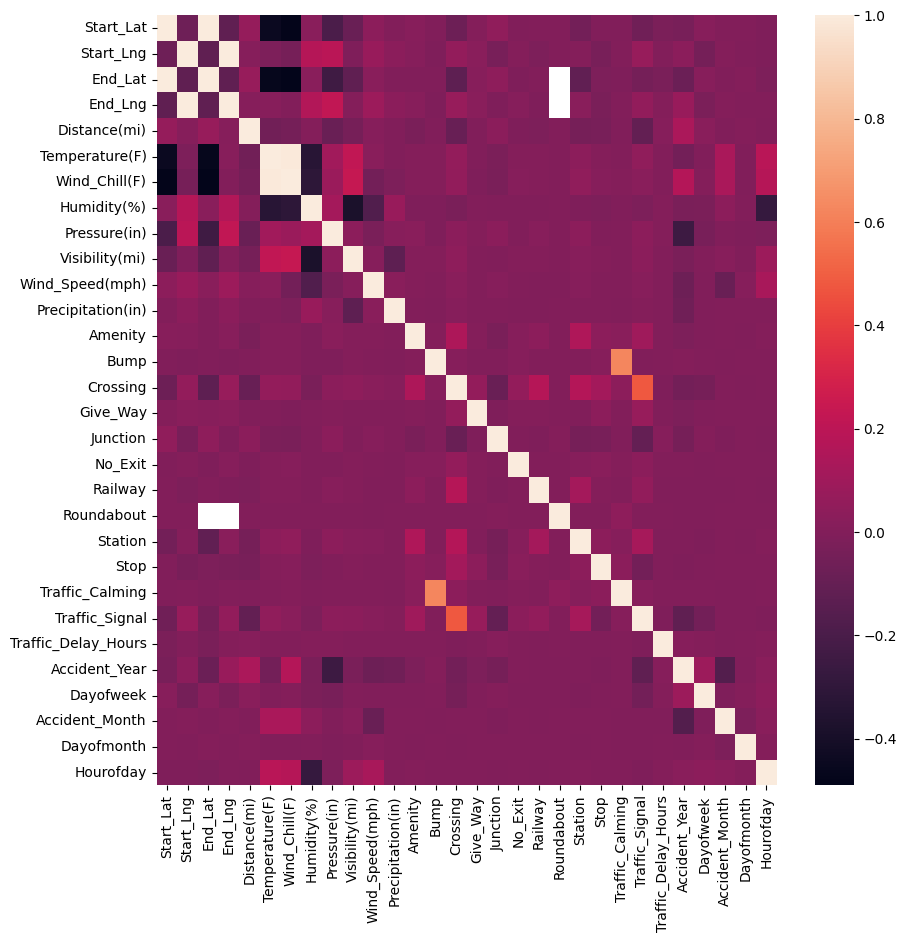

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix)
plt.show()

**Interpretation:**

1. From the above heatmap we can see that the temprature and wind chill are highly correlated so droping wind chill feature.
2. Other variables that are highly correlated are "Bump & Traffic_calming" and "Crossing & Traffic_signal"

In [ ]:
df_US_Accidents.drop(["Wind_Chill(F)"],axis=1,inplace=True)

##### Discriptive Statistics

**Catagorical features**

In [ ]:
df_US_Accidents.describe(include=[object]).T

count  unique         top    freq
ID                     231851  231851   A-7513016       1
Source                 231851       3     Source1  130045
Severity               231851       2           0  186730
State                  231851      16          CA   52000
Timezone               231616       4  US/Eastern  107503
Wind_Direction         226491      18        CALM   39543
Weather_Condition      231851       6        Fair   77156
Sunrise_Sunset         231125       2         Day  159834
Civil_Twilight         231125       2         Day  170737
Nautical_Twilight      231125       2         Day  182141
Astronomical_Twilight  231125       2         Day  191223

**Numerical features**

In [ ]:
df_US_Accidents.describe(include=[np.number]).T

count        mean        std         min  \
Start_Lat           231851.000000   36.204695   5.076479   24.560688   
Start_Lng           231851.000000  -94.678188  17.377271 -124.497585   
End_Lat             130045.000000   36.268988   5.263898   24.569978   
End_Lng             130045.000000  -95.669029  18.096940 -124.497421   
Distance(mi)        231851.000000    0.561086   1.712537    0.000000   
Temperature(F)      226835.000000   61.623353  18.999066  -38.000000   
Humidity(%)         226521.000000   64.771659  22.811259    1.000000   
Pressure(in)        227535.000000   29.536819   1.005339   19.310000   
Visibility(mi)      226493.000000    9.095608   2.688088    0.000000   
Wind_Speed(mph)     214824.000000    7.703065   5.304834    0.000000   
Precipitation(in)   165984.000000    0.008313   0.108821    0.000000   
Amenity             231851.000000    0.012370   0.110531    0.000000   
Bump                231851.000000    0.000414   0.020344    0.000000   
Crossing            231851.000000    0.112395   0.315853    0.000000   
Give_Way            231851.000000    0.004844   0.069428    0.000000   
Junction            231851.000000    0.073595   0.261111    0.000000   
No_Exit             231851.000000    0.002355   0.048471    0.000000   
Railway             231851.000000    0.008544   0.092040    0.000000   
Roundabout          231851.000000    0.000009   0.002937    0.000000   
Station             231851.000000    0.026396   0.160311    0.000000   
Stop                231851.000000    0.027720   0.164171    0.000000   
Traffic_Calming     231851.000000    0.001052   0.032424    0.000000   
Traffic_Signal      231851.000000    0.147526   0.354630    0.000000   
Traffic_Delay_Hours 231851.000000    7.258790 217.878872    0.067000   
Accident_Year       231851.000000 2019.913764   1.915700 2016.000000   
Dayofweek           231851.000000    2.593217   1.806845    0.000000   
Accident_Month      231851.000000    6.701041   3.645909    1.000000   
Dayofmonth          231851.000000   15.741209   8.687928    1.000000   
Hourofday           231851.000000   12.324519   5.465898    0.000000   

                            25%         50%         75%          max  
Start_Lat             33.401602   35.819729   40.086892    48.999901  
Start_Lng           -117.207698  -87.745956  -80.351639   -67.113167  
End_Lat               33.462150   36.183804   40.198280    48.963795  
End_Lng             -117.749937  -87.983537  -80.243043   -67.109242  
Distance(mi)           0.000000    0.030000    0.465000   138.910004  
Temperature(F)        49.000000   64.000000   76.000000   136.000000  
Humidity(%)           48.000000   67.000000   84.000000   100.000000  
Pressure(in)          29.370000   29.860000   30.030000    39.450000  
Visibility(mi)        10.000000   10.000000   10.000000    80.000000  
Wind_Speed(mph)        4.600000    7.000000   10.400000   131.000000  
Precipitation(in)      0.000000    0.000000    0.000000    10.020000  
Amenity                0.000000    0.000000    0.000000     1.000000  
Bump                   0.000000    0.000000    0.000000     1.000000  
Crossing               0.000000    0.000000    0.000000     1.000000  
Give_Way               0.000000    0.000000    0.000000     1.000000  
Junction               0.000000    0.000000    0.000000     1.000000  
No_Exit                0.000000    0.000000    0.000000     1.000000  
Railway                0.000000    0.000000    0.000000     1.000000  
Roundabout             0.000000    0.000000    0.000000     1.000000  
Station                0.000000    0.000000    0.000000     1.000000  
Stop                   0.000000    0.000000    0.000000     1.000000  
Traffic_Calming        0.000000    0.000000    0.000000     1.000000  
Traffic_Signal         0.000000    0.000000    0.000000     1.000000  
Traffic_Delay_Hours    0.525000    1.250000    2.091000 17889.758000  
Accident_Year       2018.000000 2020.000000 2022.000000  2023.000000  
Dayofweek            

8) how many categorical columns are there and find whether they are ordinal or nominal.

Severity, Weather_Condition, Wind_Direction these 3 are the only columns to have a ordinal categorical column all other are just nominal columns

##### Scatter plot

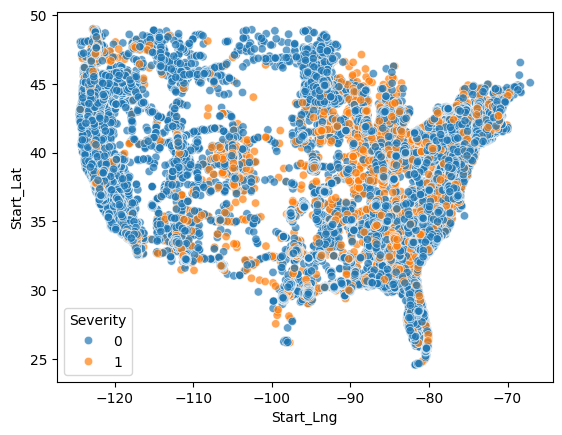

In [ ]:
sns.scatterplot(data=df_US_Accidents, x='Start_Lng', y='Start_Lat',hue = 'Severity', alpha=0.7)
plt.show()

##### Univariate Analysis

**Continues Numeric Variables**

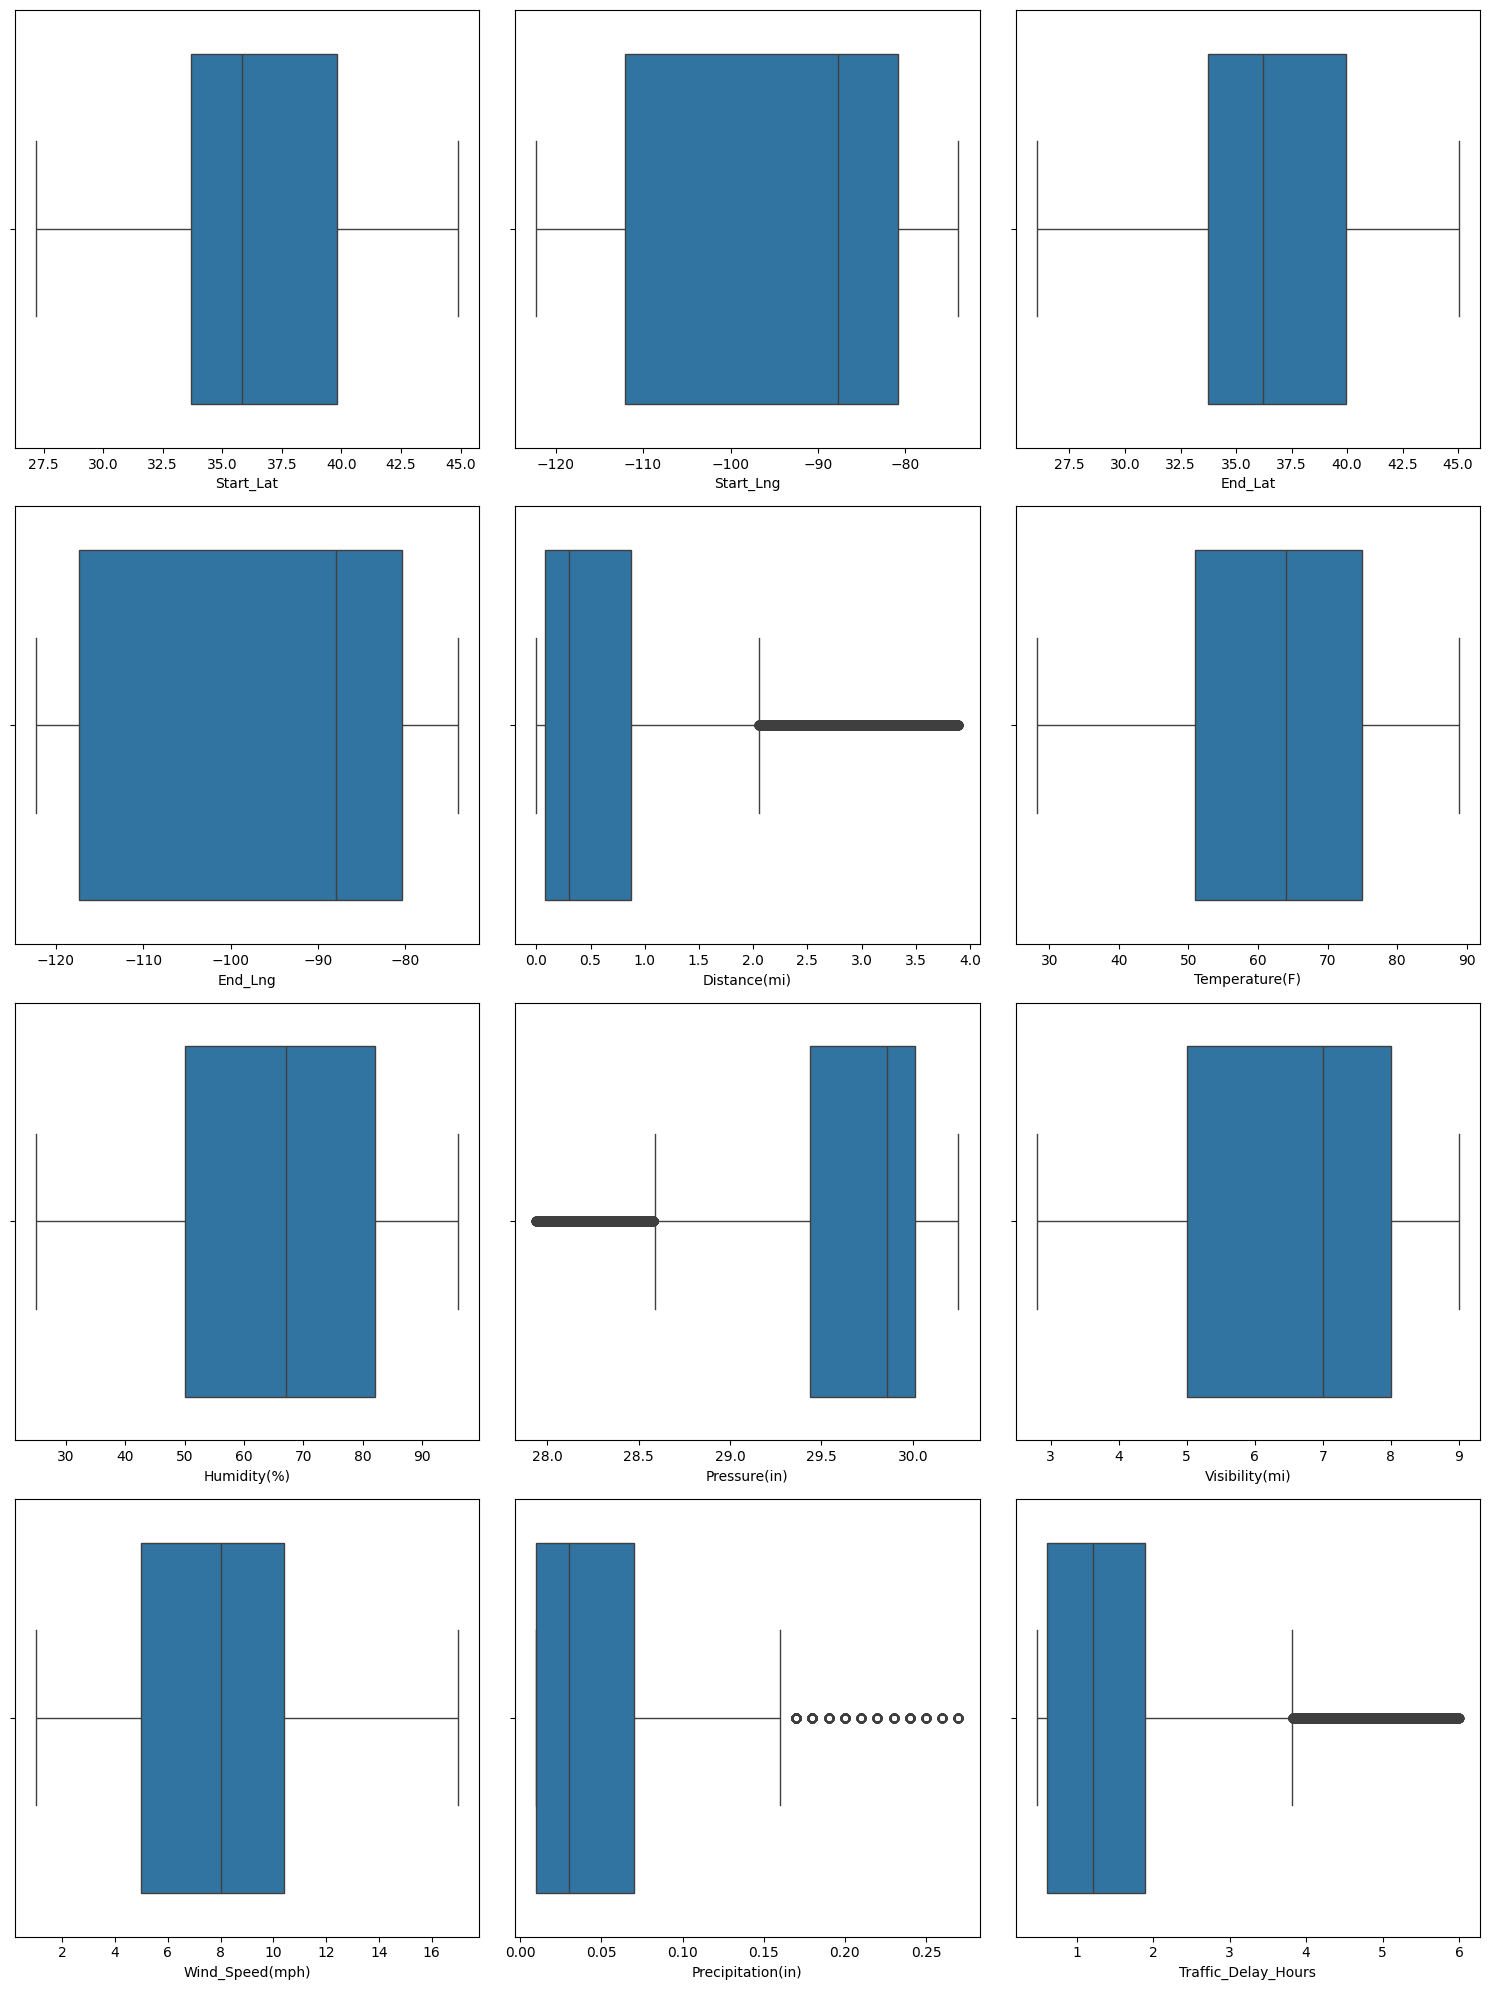

In [ ]:
df_numeric = df_US_Accidents.select_dtypes(include=['float'])

# Calculate number of rows needed based on number of columns
rows = (len(df_numeric.columns) - 1) // 3 + 1

# Create the figure and axes
fig, ax = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows * 5))

# Loop through each column in df_numeric and create a boxplot
for i, col in enumerate(df_numeric.columns):
    row, col_index = divmod(i, 3)  # Get row and column index for the subplot
    df_numeric[col] = df_numeric[col][df_numeric[col] > df_numeric[col].quantile(0.05)]
    df_numeric[col] = df_numeric[col][df_numeric[col] < df_numeric[col].quantile(0.95)]
    sns.boxplot(data=df_numeric, x=col, ax=ax[row, col_index])

# Remove any unused subplots
for j in range(len(df_numeric.columns), rows * 3):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.show()

**Interpretation:**

1. **Visibility:**
   - Most accidents occur in clear visibility conditions. This suggests that other factors such as speeding or obstacles might have contributed to the accidents.

2. **Wind Speed:**
   - **Light Winds (0-15 mph):** These are prevalent during accidents, indicating minimal impact on driving.
   - **Moderate Winds (15-30 mph):** These winds might start to affect high-profile vehicles and cause minor steering issues.
   - **Strong Winds (30-45 mph):** These can significantly affect vehicle stability, especially high-profile vehicles, and may contribute to accidents.
   - **Very Strong Winds (45+ mph):** These conditions can create severe driving difficulties and are less common during accidents in your dataset.
   - **Finding:** Wind speed is Light winds during accidents most of the time

3. **Precipitation:**
   - **0 inches to 0.1 inches (Drizzle to Light Rain):** Most accidents occur during light precipitation.
   - **0.1 to 0.5 inches (Moderate Precipitation):** Some accidents occur under moderate precipitation conditions.
   - **0.5 inches to 2.0 inches (Significant to Heavy Precipitation):** Heavy precipitation is less common but still a factor.
   - **Finding:** From the average precipitaion me see most of the precipitation are in a drizzle to significant

4. **Pressure:**
   - **High Pressure (Above 29.92 inHg):** Most accidents occur during high-pressure conditions, which are generally associated with clearer skies.
   - **Low Pressure (Below 29.92 inHg):** Low-pressure systems, often linked with stormy weather, are less common during accidents in your dataset.
   - **Finding:** Most of the Air pressure are beyond 29.5 which tells us most of the accident happen in clear sky

5. **Temperature:**
   - **Cold Temperatures (Below 32°F):** These can lead to icy conditions and higher accident risks, but such conditions are less common.
   - **Moderate Temperatures (32°F to 50°F):** Still somewhat risky, especially with moisture present, but more favorable than very cold conditions.
   - **Warm Temperatures (Above 50°F):** Most accidents occur in these conditions, which generally provide better driving conditions.
   - **Finding:** Most of the accident happens only on better driving conditions

6. **Humidity:**
   - **High Humidity (Above 70-80%):** This can lead to fog or dew, reducing visibility and creating slippery surfaces, which might contribute to accidents.
   - **Low Humidity (Below 30%):** Dry air might lead to other issues like dust, but it's less impactful compared to high humidity.
   - **Finding:** most of the accidents happened during relative and high




**Discrete Numeric Variables**

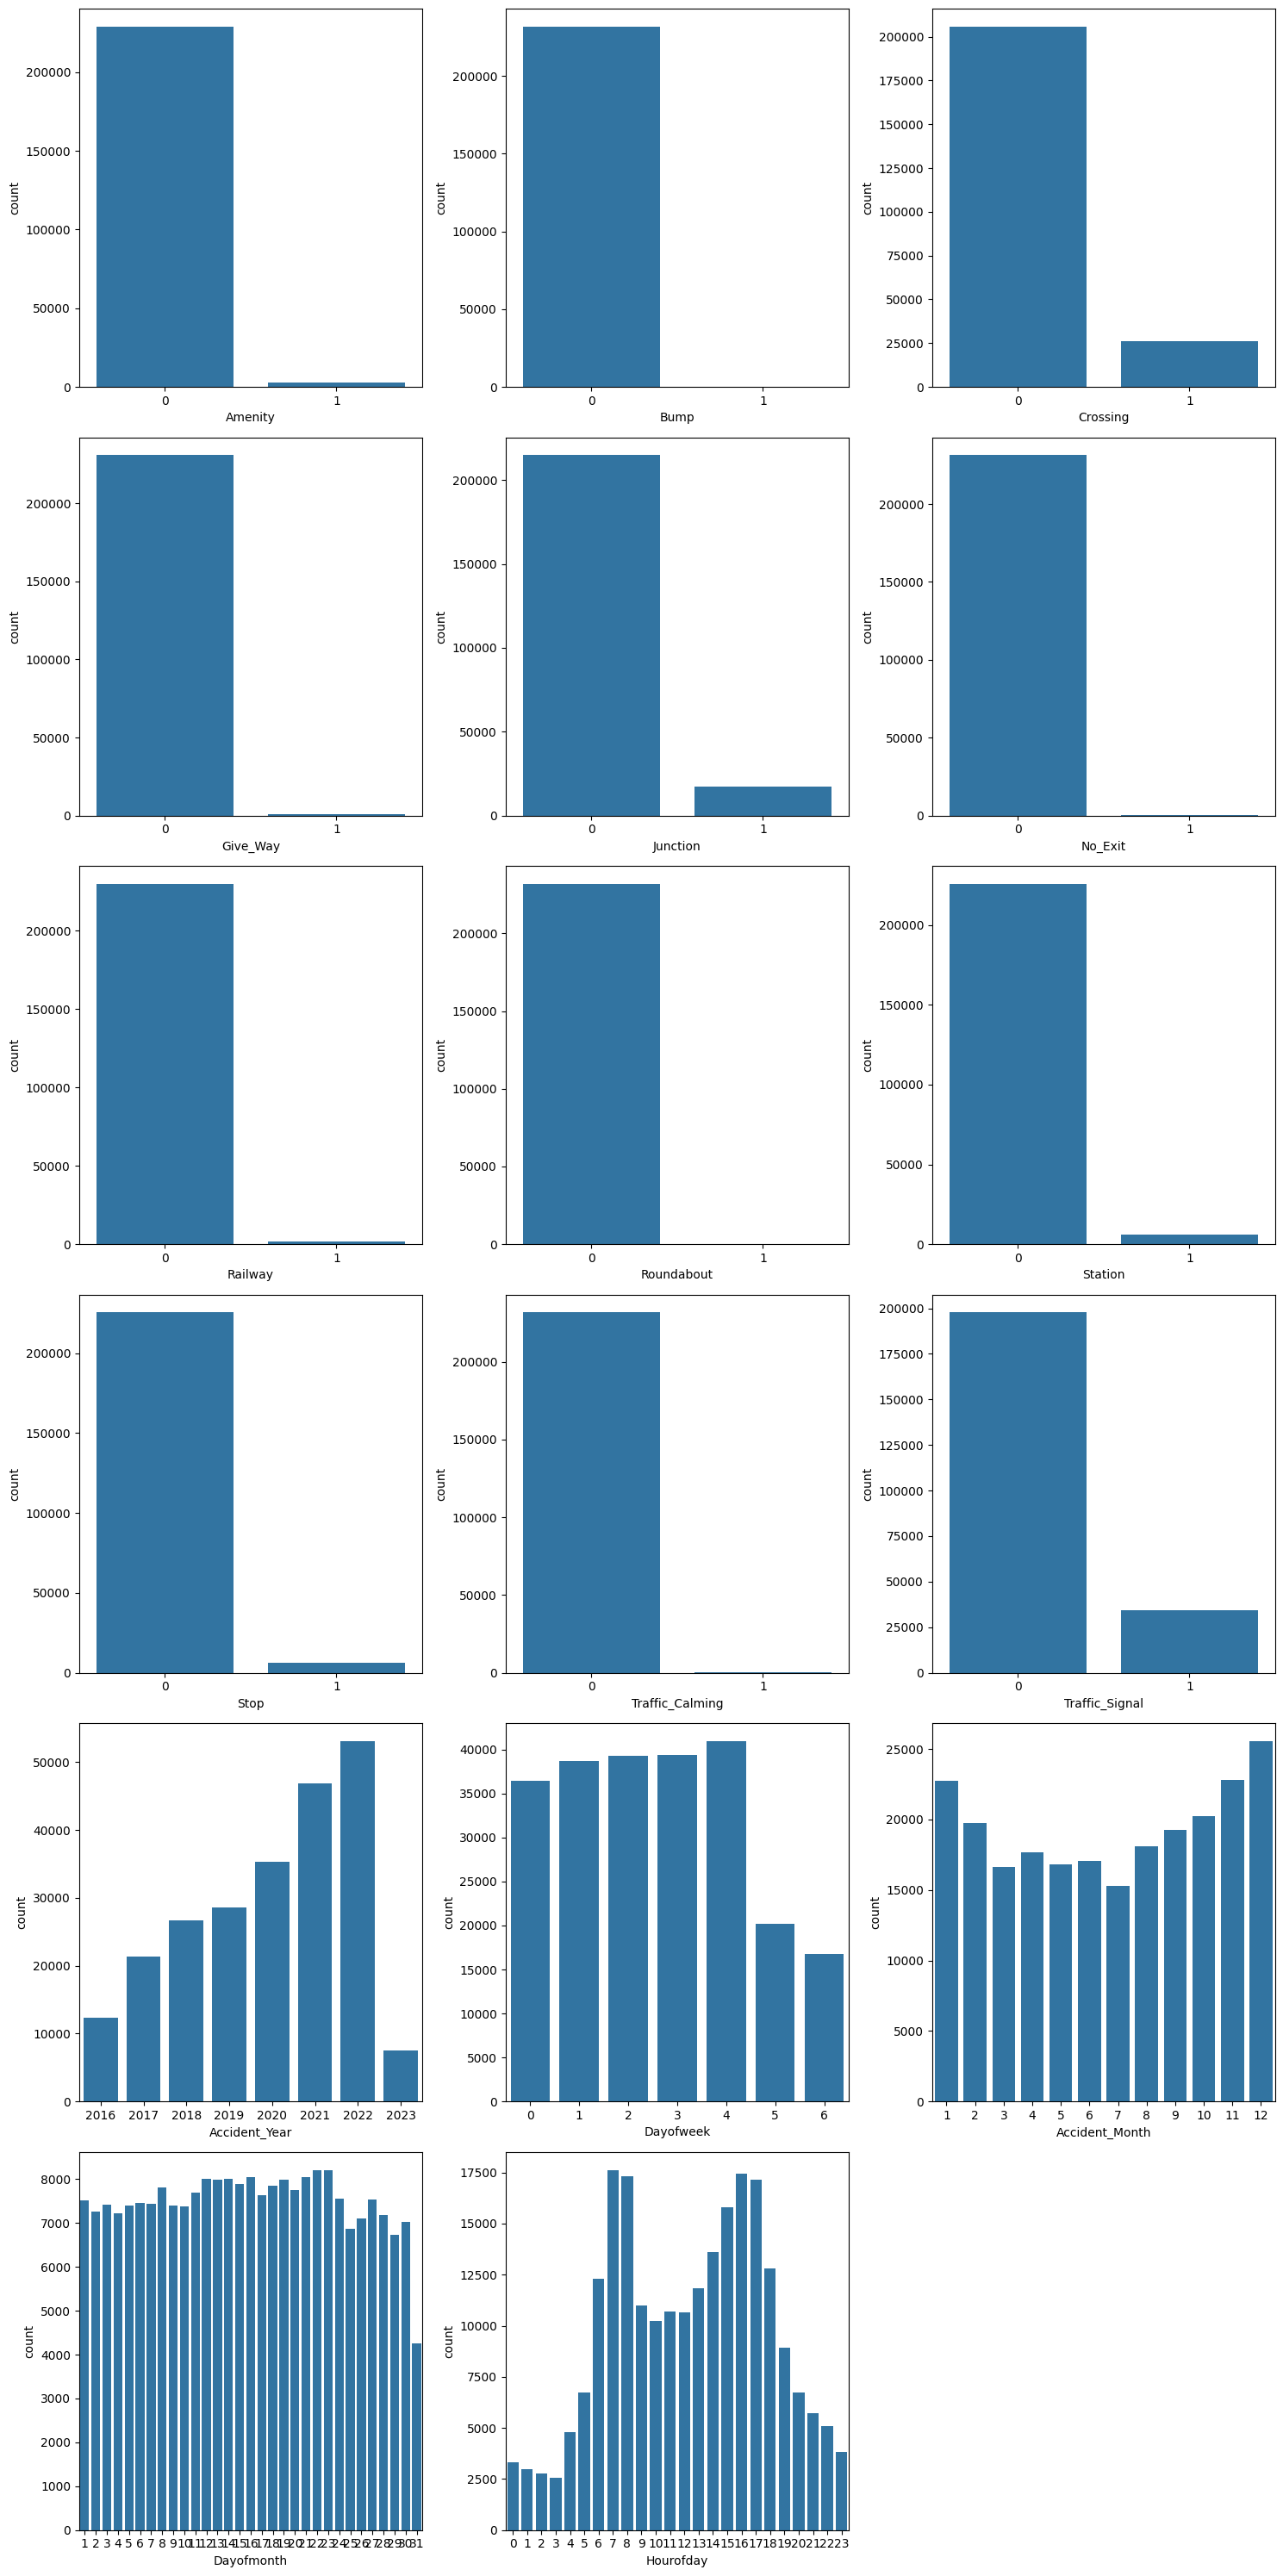

In [ ]:
df_numeric = df_US_Accidents.select_dtypes(include=['int'])

# Calculate number of rows needed based on number of columns
rows = (len(df_numeric.columns) - 1) // 3 + 1

# Create the figure and axes
fig, ax = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows * 5))

# Loop through each column in df_numeric and create a boxplot
for i, col in enumerate(df_numeric.columns):
    row, col_index = divmod(i, 3)  # Get row and column index for the subplot
    sns.countplot(data=df_numeric, x=col, ax=ax[row, col_index])

# Remove any unused subplots
for j in range(len(df_numeric.columns), rows * 3):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.show()

**Interpretation:**

1.	From the initial analysis, we can see that almost all binary columns are skewed towards false.
2.	Accident Year: 2022 is the year when the maximum number of accidents occurred.
3.	Day of the Week: The most accidents happen on Fridays, but the difference compared to Mondays is not significant. Interestingly, Saturdays and Sundays have the least number of accidents, possibly because fewer people go out or there is less pressure to be on time.
4.	Accident Month: December has the highest number of accidents, possibly due to low visibility or slippery roads, while July has the least.
5.	Day of the Month: The 31st day of the month has the least number of accidents, which is surprising because many businesses pay salaries on that day, and one might expect higher excitement levels that could lead to more accidents.
6.	Hours of the Day: It is very clear that the hours corresponding to office commutes (in and out) mark the most accidents.

**Categorical variable**

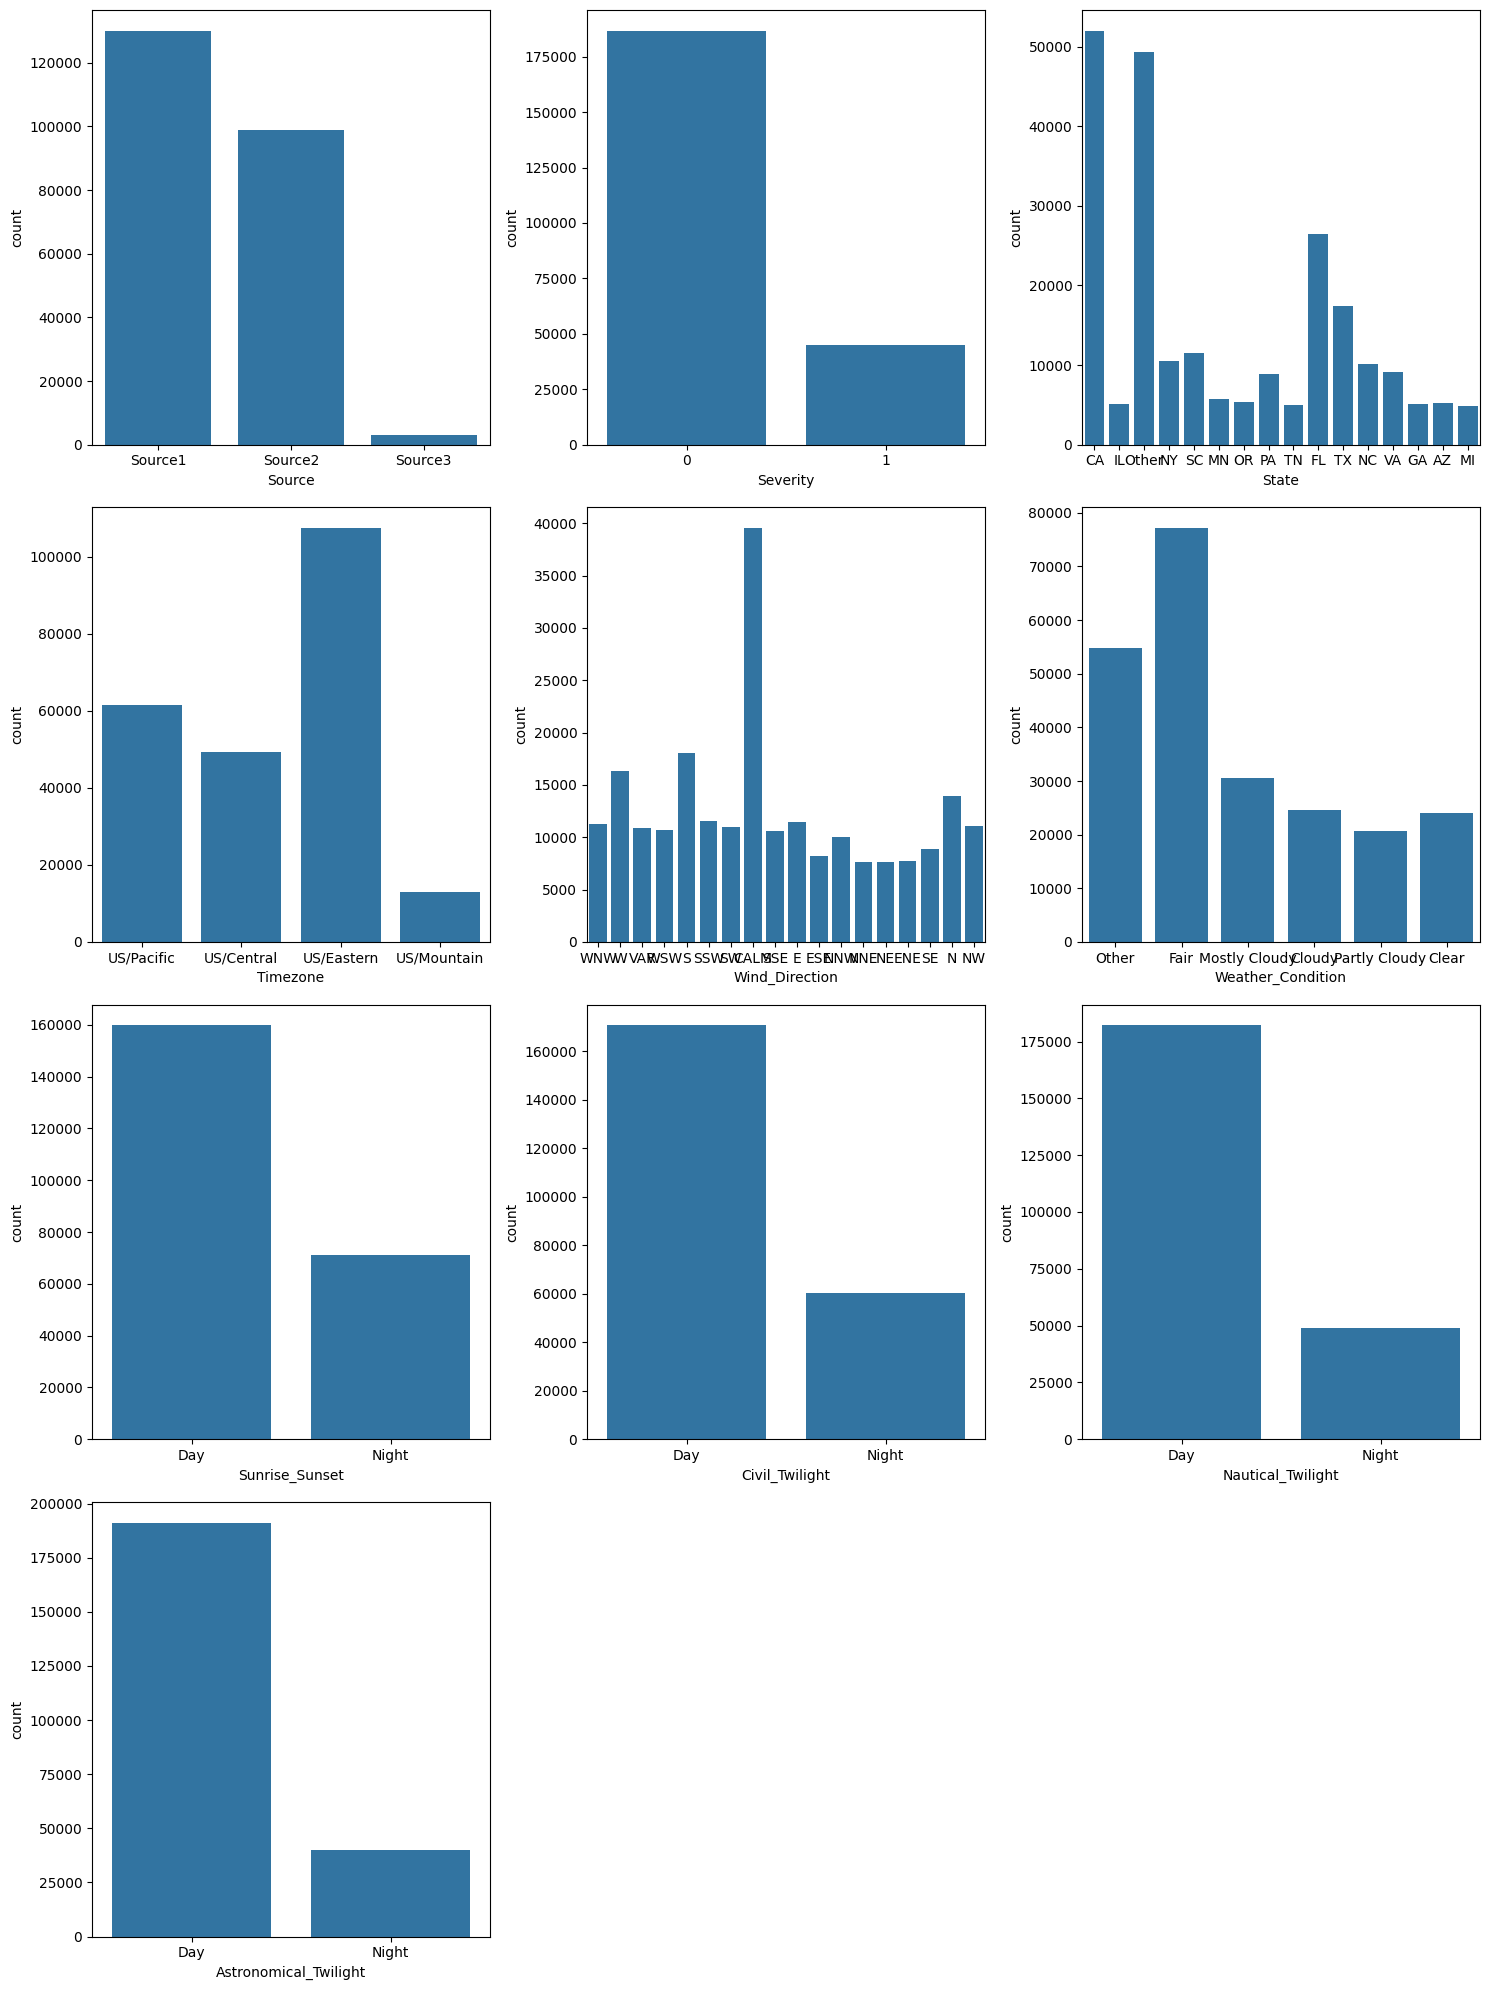

In [ ]:
df_object = df_US_Accidents.select_dtypes(include=['object']).iloc[:,1:]
# Calculate number of rows needed based on number of columns
rows = (len(df_object.columns) - 1) // 3 + 1

# Create the figure and axes
fig, ax = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows * 5))

# Loop through each column in df_numeric and create a boxplot
for i, col in enumerate(df_object.columns):
    row, col_index = divmod(i, 3)  # Get row and column index for the subplot
    sns.countplot(data=df_object, x=col, ax=ax[row, col_index])

# Remove any unused subplots
for j in range(len(df_object.columns), rows * 3):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.show()

**Interpretation:**

1.	The US/Eastern region accounts for the maximum number of accidents.
2.	Surprisingly, the maximum number of accidents happened when the wind direction was calm.
3.	Most accidents occurred in fair weather conditions.
4.	We have more data for severity 2, which needs to be checked for potential bias.
5.	The maximum number of accidents happened during daytime.

##### Bivariate Analysis

###### Target vs Continuous Numerical

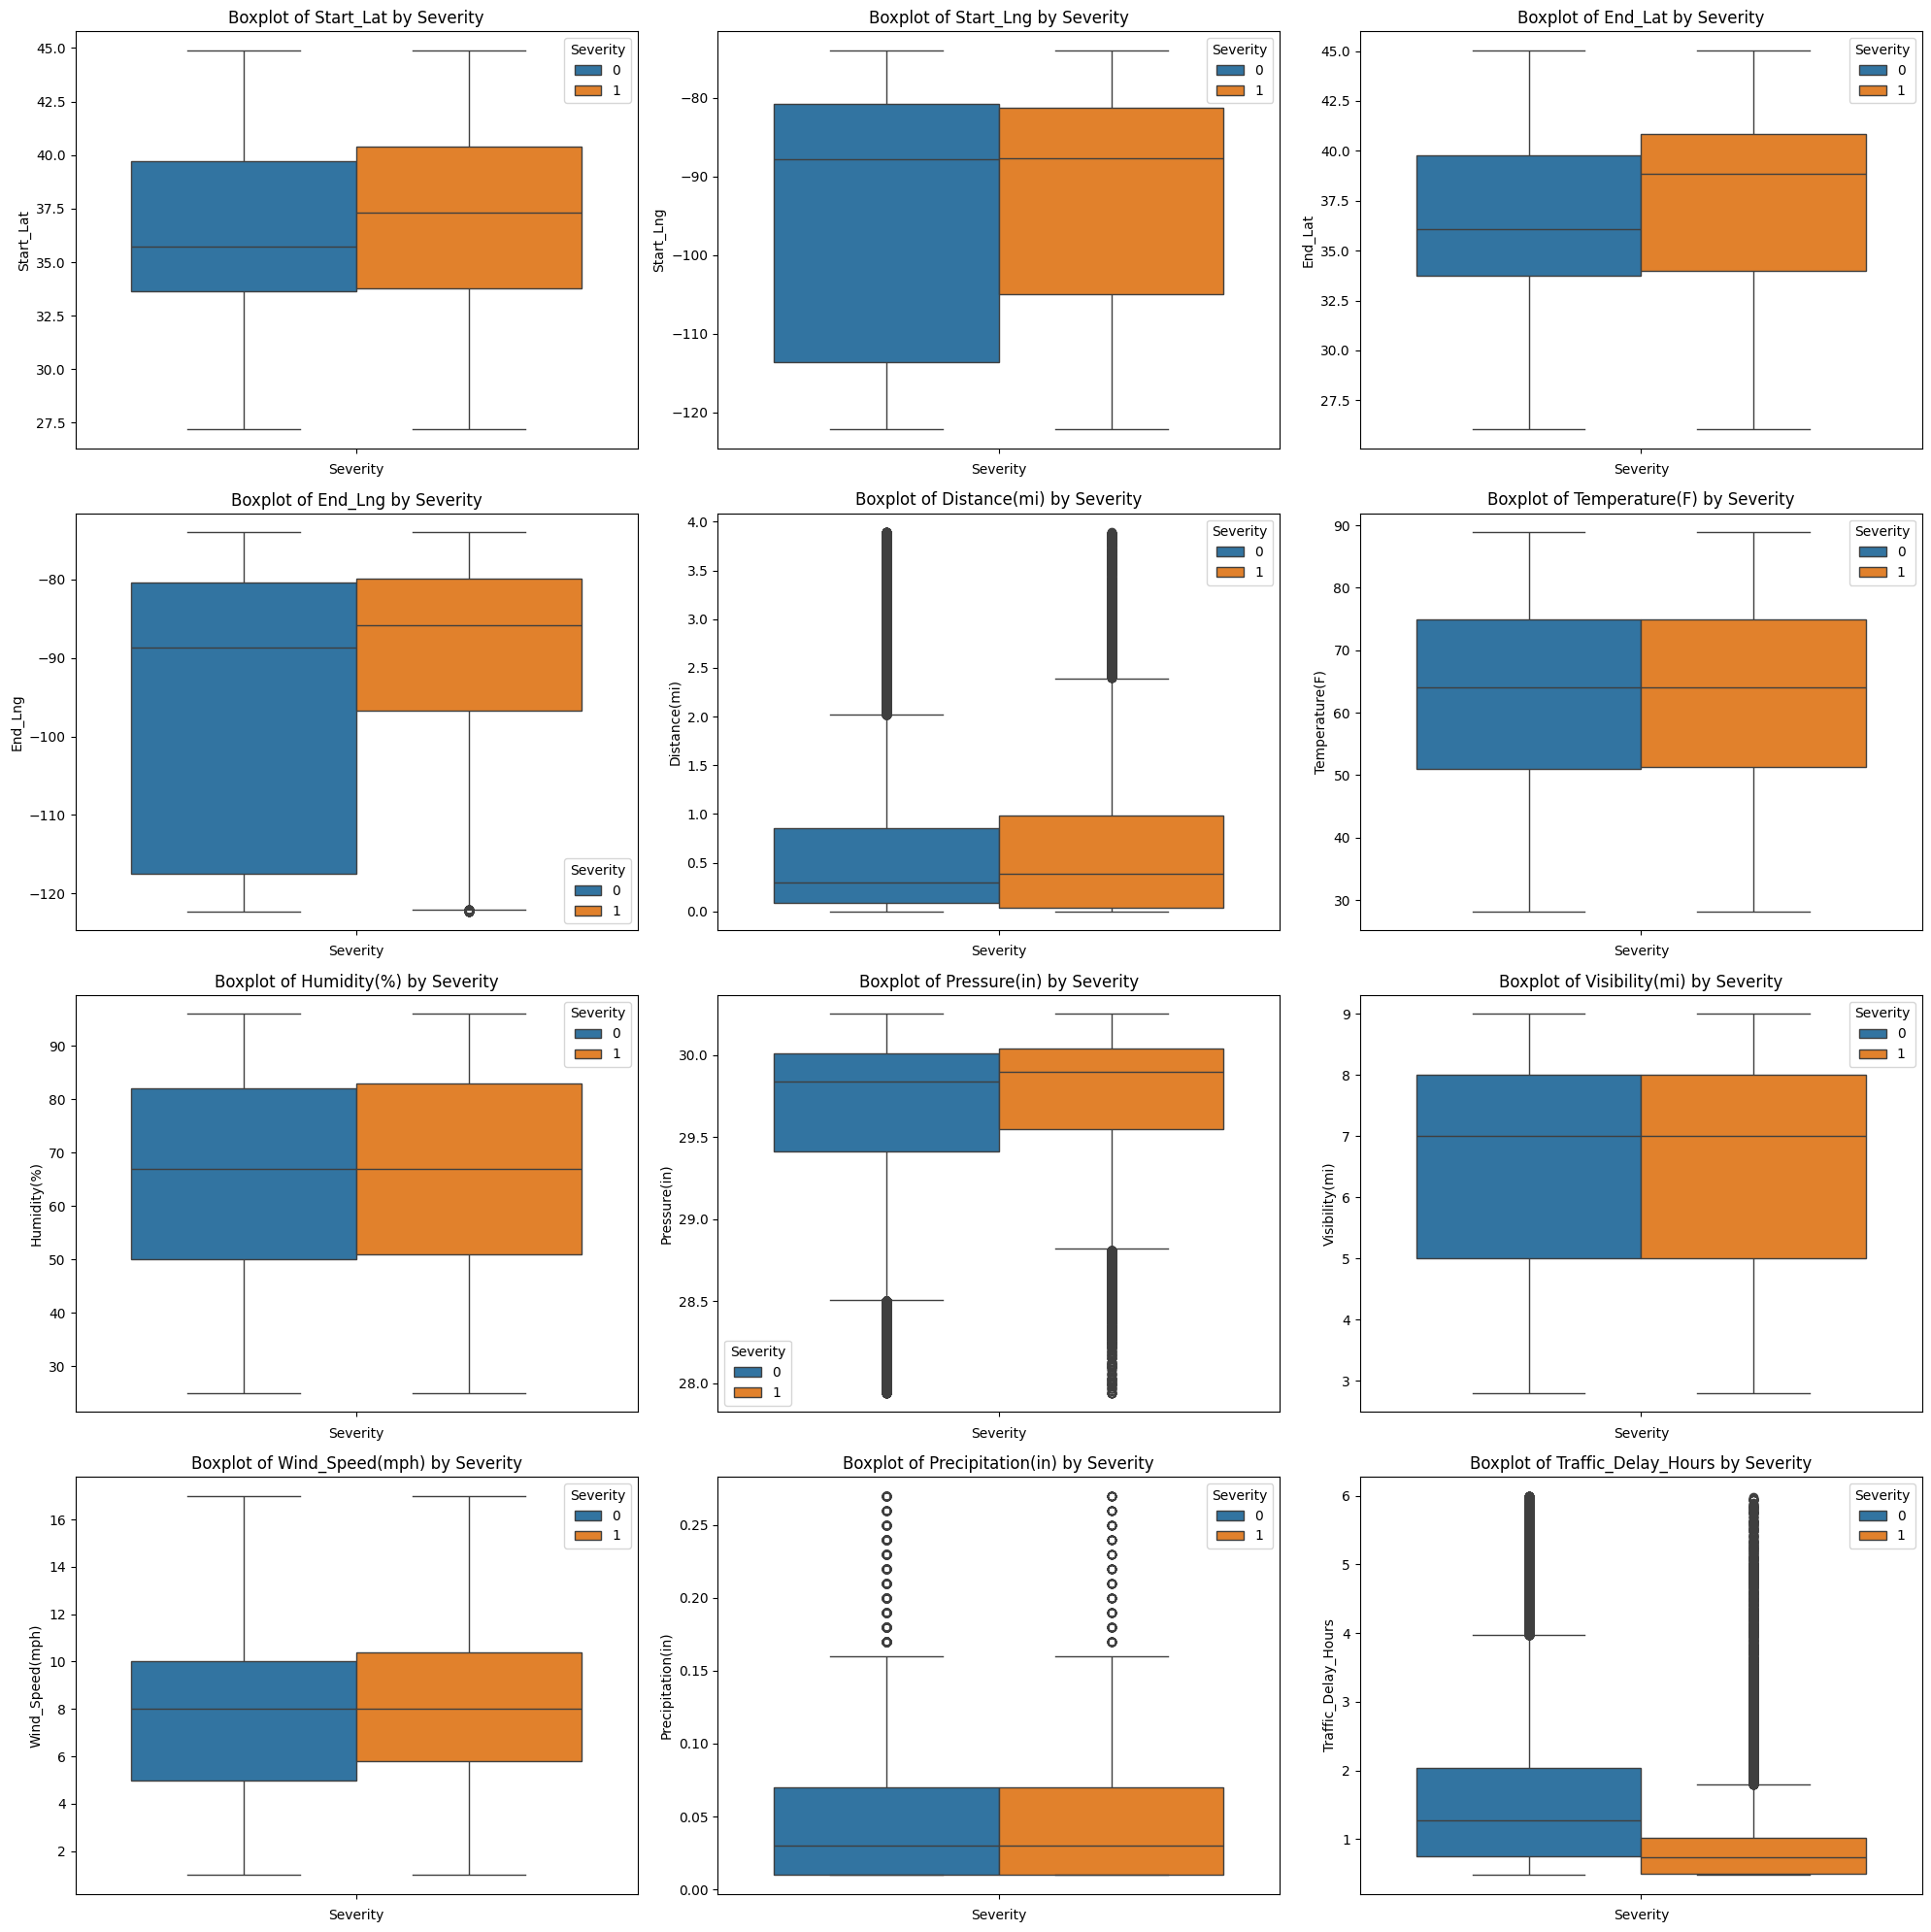

In [ ]:
df_numeric = df_US_Accidents.select_dtypes(include=['float'])
df = df_US_Accidents.copy()
# Calculate number of rows needed based on number of columns
rows = (len(df_numeric.columns) - 1) // 3 + 1

# Create the figure and axes
fig, ax = plt.subplots(nrows=rows, ncols=3, figsize=(20, rows * 5))

# Loop through each column in df_numeric and create a boxplot
for i, col in enumerate(df_numeric.columns):
    row, col_index = divmod(i, 3)  # Get row and column index for the subplot
    df[col] = df[col][df[col] > df[col].quantile(0.05)]
    df[col] = df[col][df[col] < df[col].quantile(0.95)]
    sns.boxplot(data=df,hue='Severity',y=col, ax=ax[row, col_index])
    ax[row, col_index].set_xlabel('Severity')  # Set the x-axis label
    ax[row, col_index].set_ylabel(col)  # Set the y-axis label
    ax[row, col_index].set_title(f'Boxplot of {col} by Severity')  # Set the title
# Remove any unused subplots
for j in range(len(df_numeric.columns), rows * 3):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.show()

Interpretation:

1. Most variables do not show significant differences across severity levels, indicating that these factors might not be strong predictors of severity.
2. There are some outliers in each variable that might be worth investigating further to understand their impact on severity.
3. Variables like distance and traffic delay hours show more variation with severity, suggesting they might have a stronger relationship with incident severity compared to other factors.

**Hypothesis testing Target vs Continuous Numerical**

In [ ]:
columns_to_test = ['Distance(mi)','Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)', 'Traffic_Delay_Hours']

# Initialize a list to store results
results = []

# Loop through each column and perform the Kruskal-Wallis test
for column in columns_to_test:
  # Drop rows with NaN values in the current column
    df_clean = df_US_Accidents.dropna(subset=[column, 'Severity'])

    # Ensure there is sufficient data for each severity level
    valid_categories = [df_clean[df_clean['Severity'] == cat][column] for cat in df_clean['Severity'].unique() if len(df_clean[df_clean['Severity'] == cat]) > 0]
    # categories = [df_US_Accidents[df_US_Accidents['Severity'] == cat][column] for cat in df_US_Accidents['Severity'].unique()]
    h_stat, p_val = kruskal(*valid_categories)

    # Interpret the results
    if p_val < 0.05:
        result = f"Reject the null hypothesis: There is a significant difference in the median {column} across different severity levels."
    else:
        result = f"Fail to reject the null hypothesis: There is no significant difference in the median {column} across different severity levels."

    # Append the results to the list
    results.append({
        'Title': f"Severity vs {column}",
        'P-value': p_val,
        'H-statistic': h_stat,
        'Result': result
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

In [ ]:
results_df

Title  P-value  H-statistic  \
0         Severity vs Distance(mi) 0.000000  7034.795888   
1       Severity vs Temperature(F) 0.098221     2.734201   
2          Severity vs Humidity(%) 0.000000    36.088546   
3         Severity vs Pressure(in) 0.000000  1741.172558   
4       Severity vs Visibility(mi) 0.132409     2.264035   
5      Severity vs Wind_Speed(mph) 0.000000   622.012461   
6    Severity vs Precipitation(in) 0.000000   929.178806   
7  Severity vs Traffic_Delay_Hours 0.000000 10209.594776   

                                                                                                                                  Result  
0             Reject the null hypothesis: There is a significant difference in the median Distance(mi) across different severity levels.  
1  Fail to reject the null hypothesis: There is no significant difference in the median Temperature(F) across different severity levels.  
2              Reject the null hypothesis: There is a significant difference in the median Humidity(%) across different severity levels.  
3             Reject the null hypothesis: There is a significant difference in the median Pressure(in) across different severity levels.  
4  Fail to reject the null hypothesis: There is no significant difference in the median Visibility(mi) across different severity levels.  
5          Reject the null hypothesis: There is a significant difference in the median Wind_Speed(mph) across different severity levels.  
6        Reject the null hypothesis: There is a significant difference in the median Precipitation(in) across different severity levels.  
7      Reject the null hypothesis: There is a significant difference in the median Traffic_Delay_Hours across different severity levels.

###### Target vs Discrete numerical

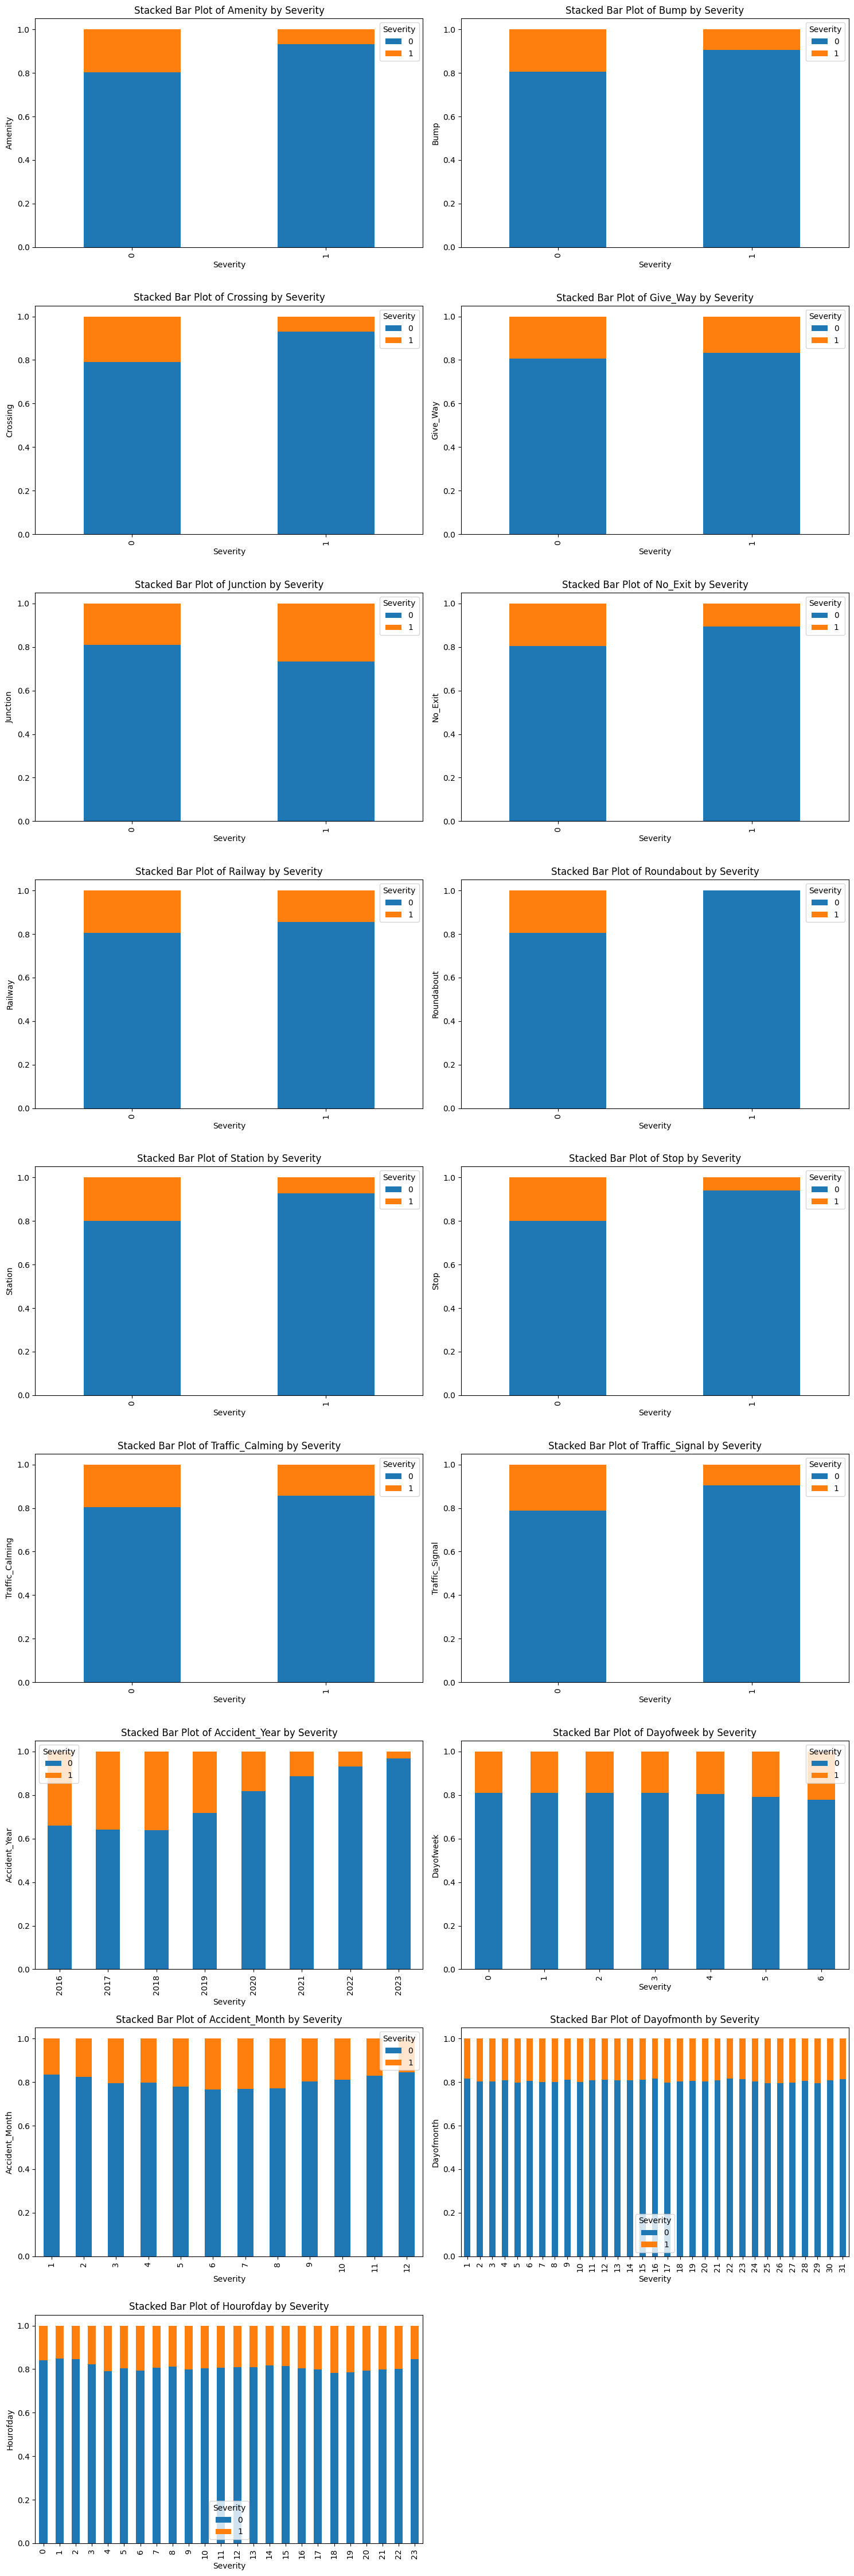

In [ ]:
# Select only integer columns
df_numeric = df_US_Accidents.select_dtypes(include=['int'])

# Calculate number of rows needed based on number of columns, assuming 2 columns per row
rows = (len(df_numeric.columns) - 1) // 2 + 1

# Create the figure and axes
fig, ax = plt.subplots(nrows=rows, ncols=2, figsize=(15, rows * 5))

# Flatten the axes array to make indexing easier
ax = ax.flatten()

# Loop through each column in df_numeric and create a stacked bar plot
for i, col in enumerate(df_numeric.columns):
    # Create the crosstab plot with normalized counts
    crosstab_data = pd.crosstab(df_US_Accidents[col], df_US_Accidents['Severity'], normalize='index')
    crosstab_data.plot(kind='bar', stacked=True, ax=ax[i])
    ax[i].set_xlabel('Severity')  # Set the x-axis label
    ax[i].set_ylabel(col)  # Set the y-axis label
    ax[i].set_title(f'Stacked Bar Plot of {col} by Severity')  # Set the title

# Remove any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

1. Across all features, Severity 2 (orange) is the most common, indicating that the majority of accidents have a medium level of severity.
2. Severity 1 (blue) and Severity 4 (red) are relatively rare, suggesting that very mild and very severe accidents are less common.
3. Severity 3 (green) is the second most common severity level in most features.
4. The pattern is consistent across different features, implying that the severity distribution is fairly uniform regardless of the specific feature.

In [ ]:
# Define numerical columns
numerical_columns = df_US_Accidents.select_dtypes(include=['int']).columns

# Results storage
results = []

# Loop through numerical columns, bin the data, and perform Chi-Square Test
for col in numerical_columns:
    if col == 'Severity':  # Skip the Severity column
        continue

    # Create a contingency table
    contingency_table = pd.crosstab(df_US_Accidents['Severity'], df_US_Accidents[col])

    # Perform Chi-Square Test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Store results
    result = {
        'Title': f'Severity vs {col}',
        'Chi-Square Statistic': chi2_stat,
        'P-Value': p_val,
        'Degrees of Freedom': dof,
        'Result': f'Reject the null hypothesis: There is a significant association between severity and {col}.' if p_val < 0.05 else f'Fail to reject the null hypothesis: There is no significant association between severity and {col}.'
    }
    results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("Chi-Square Test Results:")
results_df

Chi-Square Test Results:


Title  Chi-Square Statistic  P-Value  \
0           Severity vs Amenity            302.795132 0.000000   
1              Severity vs Bump              5.606347 0.017896   
2          Severity vs Crossing           2931.266157 0.000000   
3          Severity vs Give_Way              5.503751 0.018976   
4          Severity vs Junction            621.435993 0.000000   
5           Severity vs No_Exit             26.714807 0.000000   
6           Severity vs Railway             32.501047 0.000000   
7        Severity vs Roundabout              0.000000 1.000000   
8           Severity vs Station            596.734447 0.000000   
9              Severity vs Stop            769.727383 0.000000   
10  Severity vs Traffic_Calming              3.760049 0.052491   
11   Severity vs Traffic_Signal           2532.435288 0.000000   
12    Severity vs Accident_Year          20060.169339 0.000000   
13        Severity vs Dayofweek            130.373423 0.000000   
14   Severity vs Accident_Month           1011.624164 0.000000   
15       Severity vs Dayofmonth             55.892805 0.002809   
16        Severity vs Hourofday            259.727992 0.000000   

    Degrees of Freedom  \
0                    1   
1                    1   
2                    1   
3                    1   
4                    1   
5                    1   
6                    1   
7                    1   
8                    1   
9                    1   
10                   1   
11                   1   
12                   7   
13                   6   
14                  11   
15                  30   
16                  23   

                                                                                                           Result  
0                    Reject the null hypothesis: There is a significant association between severity and Amenity.  
1                       Reject the null hypothesis: There is a significant association between severity and Bump.  
2                   Reject the null hypothesis: There is a significant association between severity and Crossing.  
3                   Reject the null hypothesis: There is a significant association between severity and Give_Way.  
4                   Reject the null hypothesis: There is a significant association between severity and Junction.  
5                    Reject the null hypothesis: There is a significant association between severity and No_Exit.  
6                    Reject the null hypothesis: There is a significant association between severity and Railway.  
7        Fail to reject the null hypothesis: There is no significant association between severity and Roundabout.  
8                    Reject the null hypothesis: There is a significant association between severity and Station.  
9                       Reject the null hypothesis: There is a significant association between severity and Stop.  
10  Fail to reject the null hypothesis: There is no significant association between severity and Traffic_Calming.  
11            Reject the null hypothesis: There is a significant association between severity and Traffic_Signal.  
12             Reject the null hypothesis: There is a significant association between severity and Accident_Year.  
13                 Reject the null hypothesis: There is a significant association between severity and Dayofweek.  
14            Reject the null hypothesis: There is a significant association between severity and Accident_Month.  
15                Reject the null hypothesis: There is a significant association between severity and Dayofmonth.  
16                 Reject the null hypothesis: There is a significant association between severity and Hourofday.

###### Target vs categorical feature

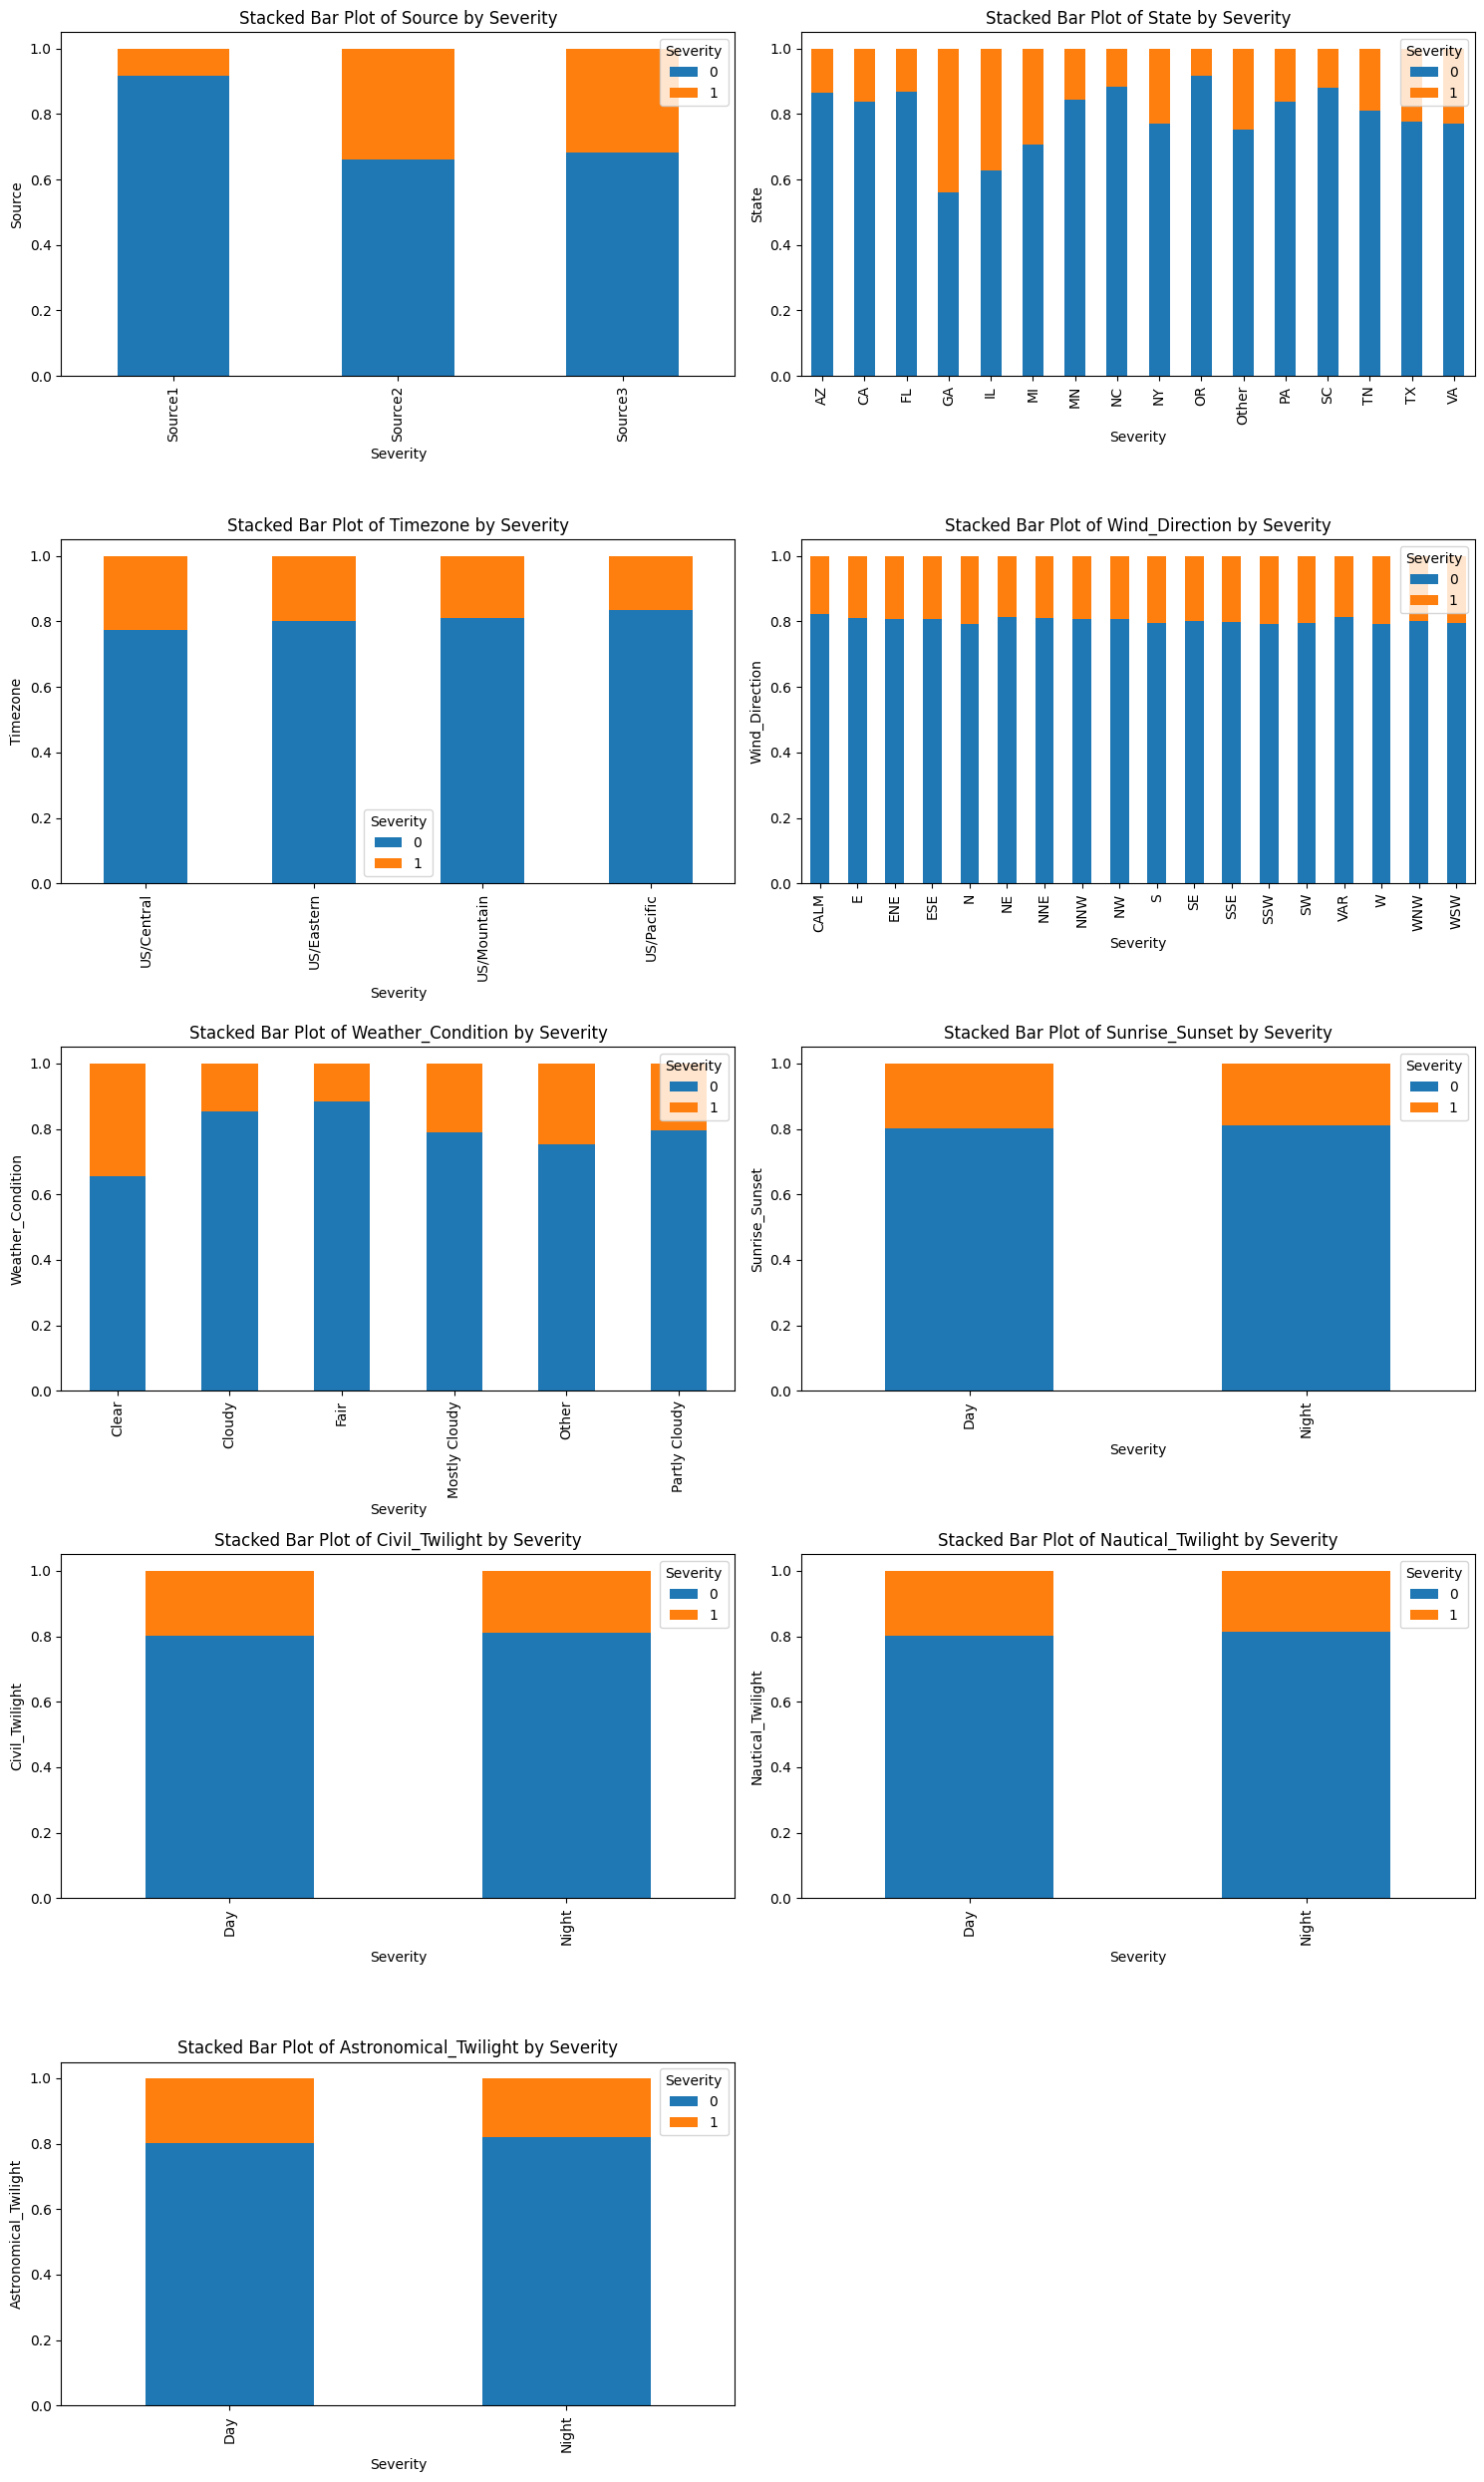

In [ ]:
# Select only integer columns
df_object = df_US_Accidents.select_dtypes(include=['object']).drop(["Severity","ID"],axis=1)

# Calculate number of rows needed based on number of columns, assuming 2 columns per row
rows = (len(df_object.columns) - 1) // 2 + 1

# Create the figure and axes
fig, ax = plt.subplots(nrows=rows, ncols=2, figsize=(15, rows * 5))

# Flatten the axes array to make indexing easier
ax = ax.flatten()

# Loop through each column in df_numeric and create a stacked bar plot
for i, col in enumerate(df_object.columns):
    # Create the crosstab plot with normalized counts
    crosstab_data = pd.crosstab(df_US_Accidents[col], df_US_Accidents['Severity'], normalize='index')
    crosstab_data.plot(kind='bar', stacked=True, ax=ax[i])
    ax[i].set_xlabel('Severity')  # Set the x-axis label
    ax[i].set_ylabel(col)  # Set the y-axis label
    ax[i].set_title(f'Stacked Bar Plot of {col} by Severity')  # Set the title

# Remove any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

**Interpretation:**

1. Stacked Bar Plot of Source by Severity
Interpretation: The majority of accident data across all sources (Source1, Source2, and Source3) are classified under severity level 2, indicating moderate impact on traffic flow. Severity levels 3 and 4, which signify higher traffic impacts, are less frequent but present in all sources.

2. Stacked Bar Plot of State by Severity
Interpretation: Most states show a similar pattern where severity level 2 is the most common. Severity levels 3 and 4 have a noticeable presence in states like FL, GA and TX, indicating that these states experience a higher proportion of more severe accidents. Some states like AZ and NC show a higher proportion of severity level 1, indicating minor impacts on traffic.

3. Stacked Bar Plot of Timezone by Severity
Interpretation: Across different time zones (US/Eastern, US/Central, US/Mountain, US/Pacific), the majority of accidents fall under severity level 2. This indicates a consistent pattern of accident severity across the country, irrespective of the timezone.

4. Stacked Bar Plot of Wind Direction by Severity
Interpretation: Accidents occur under a wide range of wind directions, with severity level 2 being the most common across all directions. There is no significant variation in accident severity based on wind direction, suggesting that wind direction might not be a strong factor in determining accident severity.

5. Stacked Bar Plot of Weather Condition by Severity
Interpretation: Clear weather conditions see the highest proportion of severity level 2 accidents, followed by Cloudy, Fair, and Partly Cloudy conditions. Severity level 3 and 4 accidents are more frequent under adverse weather conditions (like Rain), highlighting the impact of weather on accident severity.

6. Stacked Bar Plot of Sunrise_Sunset by Severity
Interpretation: Both day and night periods show that severity level 2 is the most common. However, there is a slightly higher proportion of severity level 3 and 4 accidents during night time, indicating that night conditions may contribute to more severe accidents.

7. Stacked Bar Plot of Civil_Twilight by Severity
Interpretation: Similar to Sunrise_Sunset, both day and night periods under civil twilight show that severity level 2 is the most prevalent. There is no significant difference in the distribution of severity levels between day and night periods under civil twilight.

8. Stacked Bar Plot of Nautical_Twilight by Severity
Interpretation: The pattern remains consistent with the previous plots, where severity level 2 is the most frequent during both day and night periods under nautical twilight. Night time has a slightly higher proportion of severity level 3 and 4 accidents.

9. Stacked Bar Plot of Astronomical_Twilight by Severity
Interpretation: Both day and night periods under astronomical twilight show a higher prevalence of severity level 2 accidents. As with other twilight conditions, there is a marginal increase in the proportion of severity level 3 and 4 accidents during night time.

**Overall Insights**

Consistency in Severity Level 2: Across various factors such as source, state, timezone, wind direction, weather conditions, and different times of the day, severity level 2 remains the most common. This indicates that most accidents have a moderate impact on traffic flow.

Higher Severity at Night: There is a consistent observation that night time conditions (irrespective of the type of twilight) have a slightly higher proportion of more severe accidents (levels 3 and 4). This suggests that driving conditions at night may contribute to more severe accidents.

Impact of Adverse Weather: Adverse weather conditions, such as rain, contribute to a higher proportion of severe accidents, highlighting the importance of weather conditions in traffic safety.
These insights can help in formulating better traffic management strategies and safety measures, especially focusing on night time driving and adverse weather conditions.

In [ ]:
# Define categorical columns
categorical_columns = df_US_Accidents.select_dtypes(include=['object']).drop(["Severity","ID"],axis=1).columns

# Results storage
results = []

# Loop through categorical columns and perform Chi-Square Test with 'Severity'
for col in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df_US_Accidents['Severity'], df_US_Accidents[col])

    # Perform Chi-Square Test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Store results
    result = {
        'Title': f'Severity vs {col}',
        'Chi-Square Statistic': chi2_stat,
        'P-Value': p_val,
        'Degrees of Freedom': dof,
        'Result': f'Reject the null hypothesis: There is a significant association between Severity and {col}.' if p_val < 0.05 else f'Fail to reject the null hypothesis: There is no significant association between Severity and {col}.'
    }
    results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("Chi-Square Test Results:")
results_df

Chi-Square Test Results:


Title  Chi-Square Statistic  P-Value  \
0                 Severity vs Source          23972.943726 0.000000   
1                  Severity vs State           6908.406367 0.000000   
2               Severity vs Timezone            677.321810 0.000000   
3         Severity vs Wind_Direction            159.062351 0.000000   
4      Severity vs Weather_Condition           7746.267782 0.000000   
5         Severity vs Sunrise_Sunset             25.346203 0.000000   
6         Severity vs Civil_Twilight             21.184754 0.000004   
7      Severity vs Nautical_Twilight             37.849146 0.000000   
8  Severity vs Astronomical_Twilight             63.342283 0.000000   

   Degrees of Freedom  \
0                   2   
1                  15   
2                   3   
3                  17   
4                   5   
5                   1   
6                   1   
7                   1   
8                   1   

                                                                                                       Result  
0                 Reject the null hypothesis: There is a significant association between Severity and Source.  
1                  Reject the null hypothesis: There is a significant association between Severity and State.  
2               Reject the null hypothesis: There is a significant association between Severity and Timezone.  
3         Reject the null hypothesis: There is a significant association between Severity and Wind_Direction.  
4      Reject the null hypothesis: There is a significant association between Severity and Weather_Condition.  
5         Reject the null hypothesis: There is a significant association between Severity and Sunrise_Sunset.  
6         Reject the null hypothesis: There is a significant association between Severity and Civil_Twilight.  
7      Reject the null hypothesis: There is a significant association between Severity and Nautical_Twilight.  
8  Reject the null hypothesis: There is a significant association between Severity and Astronomical_Twilight.

**Removing Negative Values**

In [ ]:
df_US_Accidents = df_US_Accidents[df_US_Accidents["Temperature(F)"] > 0]

In [ ]:
df_US_Accidents.shape

(226152, 40)

**Removing Garbage values from distance column**

In [ ]:
df_US_Accidents.loc[df_US_Accidents["End_Lat"].isna(), "Distance(mi)"] = df_US_Accidents.loc[df_US_Accidents["End_Lat"].isna(), "Distance(mi)"].replace(0.0, np.nan)

In [ ]:
df_US_Accidents.drop(["Start_Lat","End_Lat","Start_Lng","End_Lng"],axis=1,inplace=True)

In [ ]:
df_US_Accidents.shape

(226152, 36)

#### Train Test Split

In [ ]:
X = df_US_Accidents.drop(["Severity"],axis=1)
y = df_US_Accidents["Severity"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [ ]:
df_US_Accidents_Train = pd.concat([X_train,y_train],axis=1)
df_US_Accidents_Test = pd.concat([X_test,y_test],axis=1)

#### Outliers Treatment

**Interpretation:** Wherever the End_Lat have NAN the distance column value is zero, it states that it is a garbage value.

**Checking presence of outlier for numeric variables keeping 95% as upper whisker and 5% as lower whisker.**

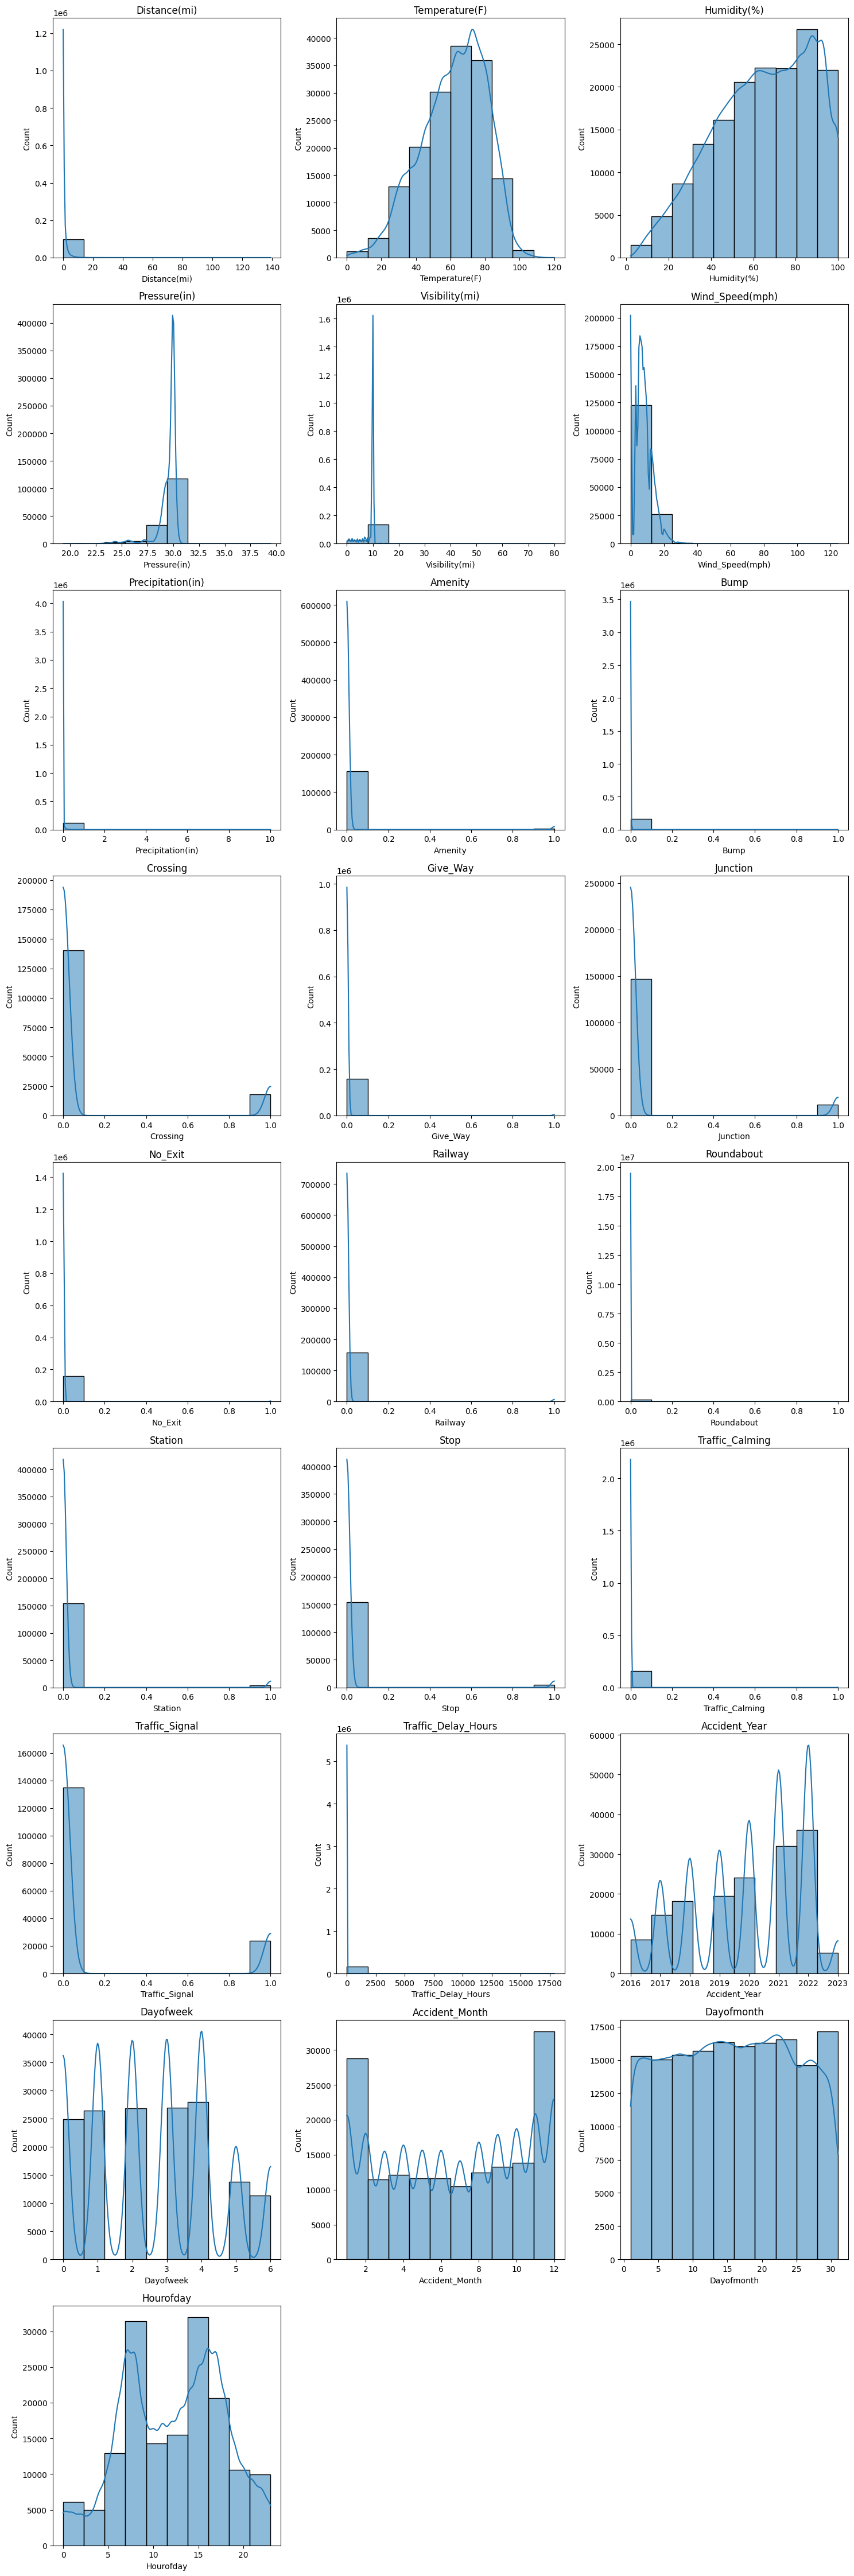

In [ ]:
# Select only numerical columns
num_columns = df_US_Accidents_Train.select_dtypes(include='number').columns

# Determine the number of plots
num_plots = len(num_columns)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot histograms using Seaborn
for i, col in enumerate(num_columns):
    sns.histplot(df_US_Accidents_Train[col], ax=axes[i], bins=10, kde=True)
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**Interpretation:** From above histograms we can say that we need to perform outlier analsys to only few records like 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)','Precipitation(in)','Traffic_Delay_Hours' because other represent a boolean column or date,time columns which defined between certian values.

In [ ]:
for col in df_US_Accidents_Train[['Distance(mi)', 'Temperature(F)', 'Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)','Precipitation(in)','Traffic_Delay_Hours']].columns:
    lower_whisker = df_US_Accidents_Train[col].quantile(.05)
    upper_whisker = df_US_Accidents_Train[col].quantile(.95)
    count = df_US_Accidents_Train[col][(df_US_Accidents_Train[col] < lower_whisker) | (df_US_Accidents_Train[col] > upper_whisker)].count()
    print(f"{col} has {count} outliner")

Distance(mi) has 4928 outliner
Temperature(F) has 15139 outliner
Humidity(%) has 14163 outliner
Pressure(in) has 15639 outliner
Visibility(mi) has 8265 outliner
Wind_Speed(mph) has 6765 outliner
Precipitation(in) has 5375 outliner
Traffic_Delay_Hours has 12864 outliner


**Interpretation:** 5-10% outliers are present in a column, to scale it we are using RobustScaler.

RobustScaler is used for scaling because it utilizes percentiles, which makes it effective for handling numerical input variables that contain outliers, reducing their impact.

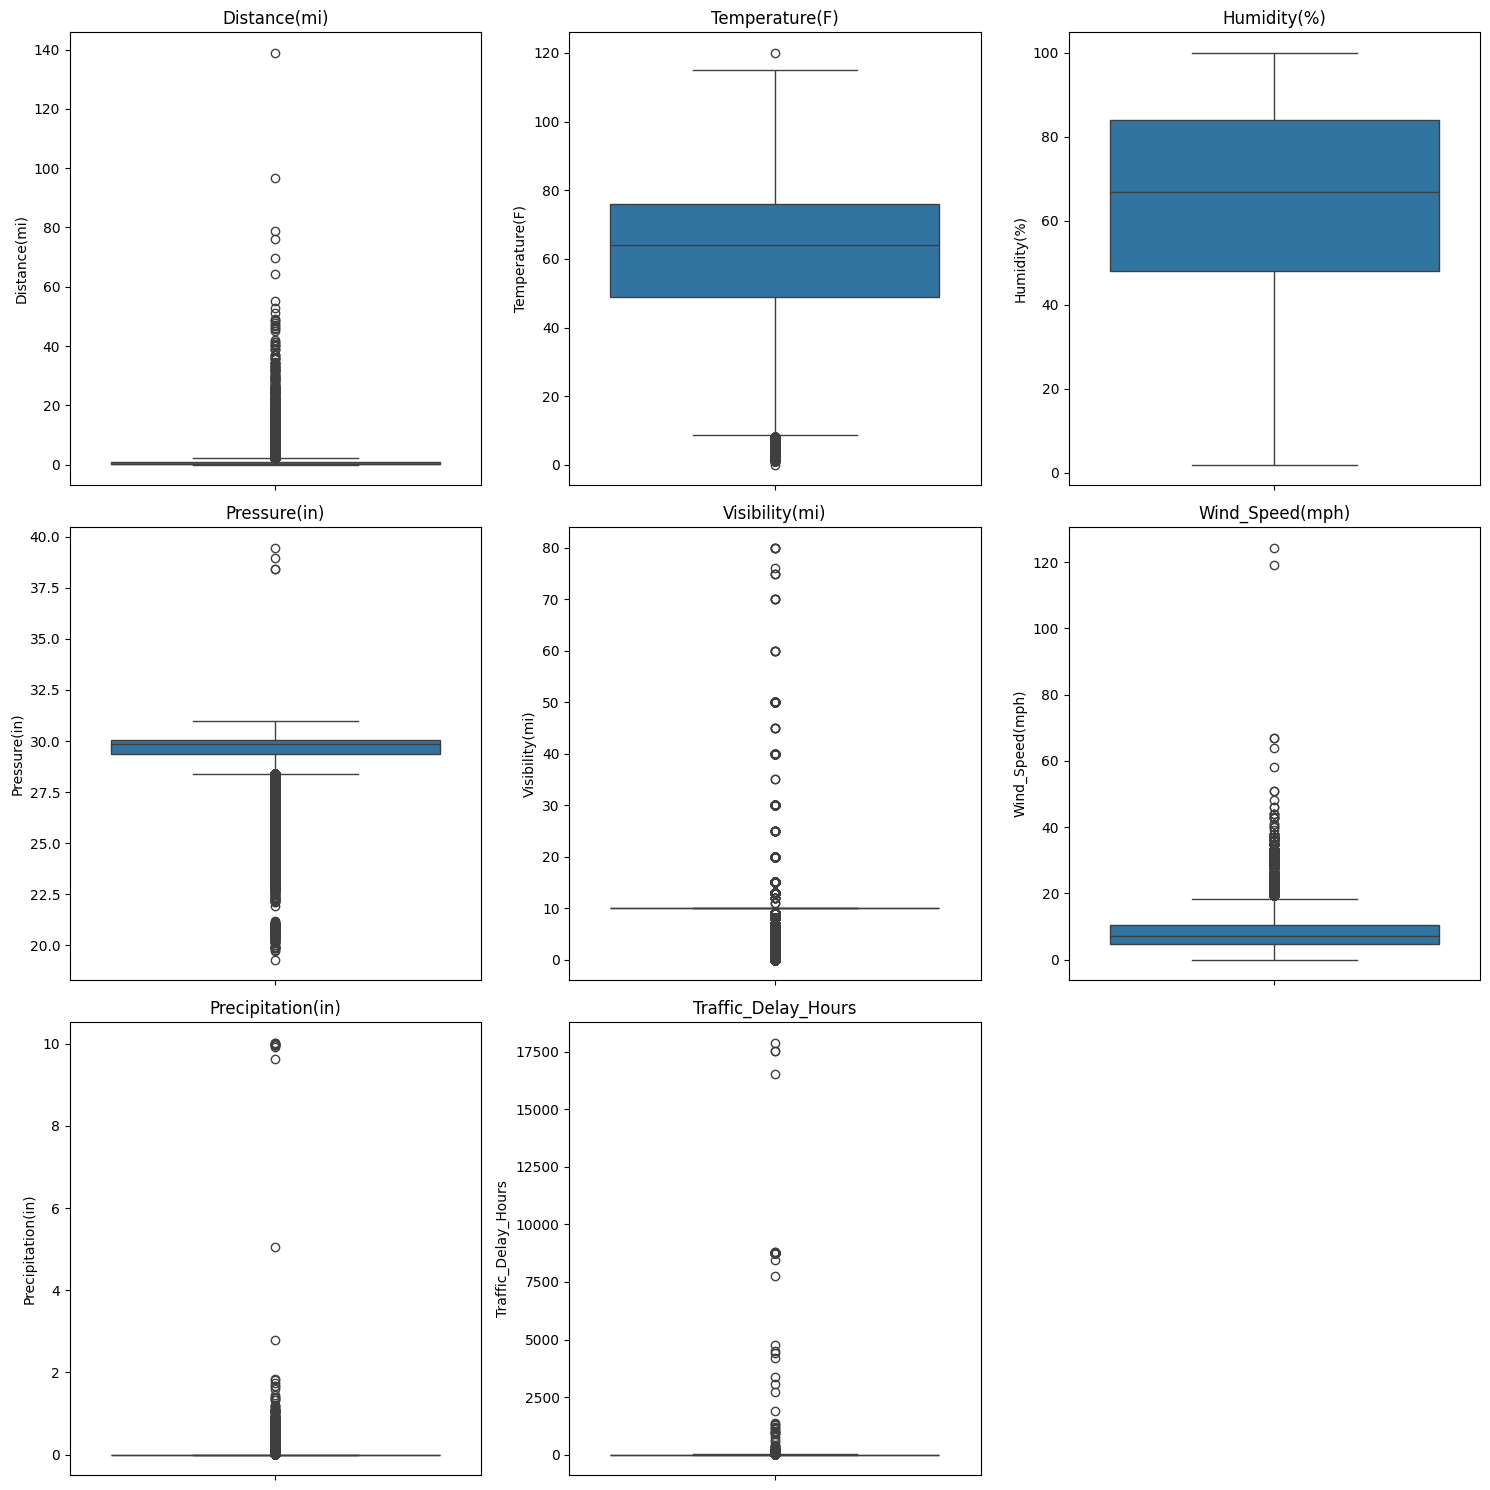

In [ ]:
# Select the desired columns
df = df_US_Accidents_Train[['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Traffic_Delay_Hours']]
num_columns = df.columns

# Determine the number of plots
num_plots = len(num_columns)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot boxplots using Seaborn
for i, col in enumerate(num_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Create copies of the DataFrames
df_train = df_US_Accidents_Train.copy()
df_test = df_US_Accidents_Test.copy()

# Select only numerical columns
num_columns_train = df_train.select_dtypes(include='float').columns
num_columns_test = df_test.select_dtypes(include='float').columns


# Create an instance of RobustScaler
scaler = RobustScaler(quantile_range=(5, 95))

# Fit the scaler and transform the training data
for col in num_columns_train:
    # Isolate the column
    col_data_train = df_train[col].values.reshape(-1, 1)

    # Identify the non-NaN indices
    non_nan_indices_train = ~np.isnan(col_data_train).flatten()

    # Fit the scaler on non-NaN values of the training data
    scaler.fit(col_data_train[non_nan_indices_train])

    # Transform the non-NaN values of the training data
    col_data_train[non_nan_indices_train] = scaler.transform(col_data_train[non_nan_indices_train])

    # Update the DataFrame with the scaled values
    df_train[col] = col_data_train

# Transform the test data using the scaler fitted on the training data
for col in num_columns_test:
    # Isolate the column
    col_data_test = df_test[col].values.reshape(-1, 1)

    # Identify the non-NaN indices
    non_nan_indices_test = ~np.isnan(col_data_test).flatten()

    # Transform the non-NaN values of the test data
    col_data_test[non_nan_indices_test] = scaler.transform(col_data_test[non_nan_indices_test])

    # Update the DataFrame with the scaled values
    df_test[col] = col_data_test

# Assign the scaled DataFrames back to the original DataFrames
df_US_Accidents_Train.update(df_train)
df_US_Accidents_Test.update(df_test)

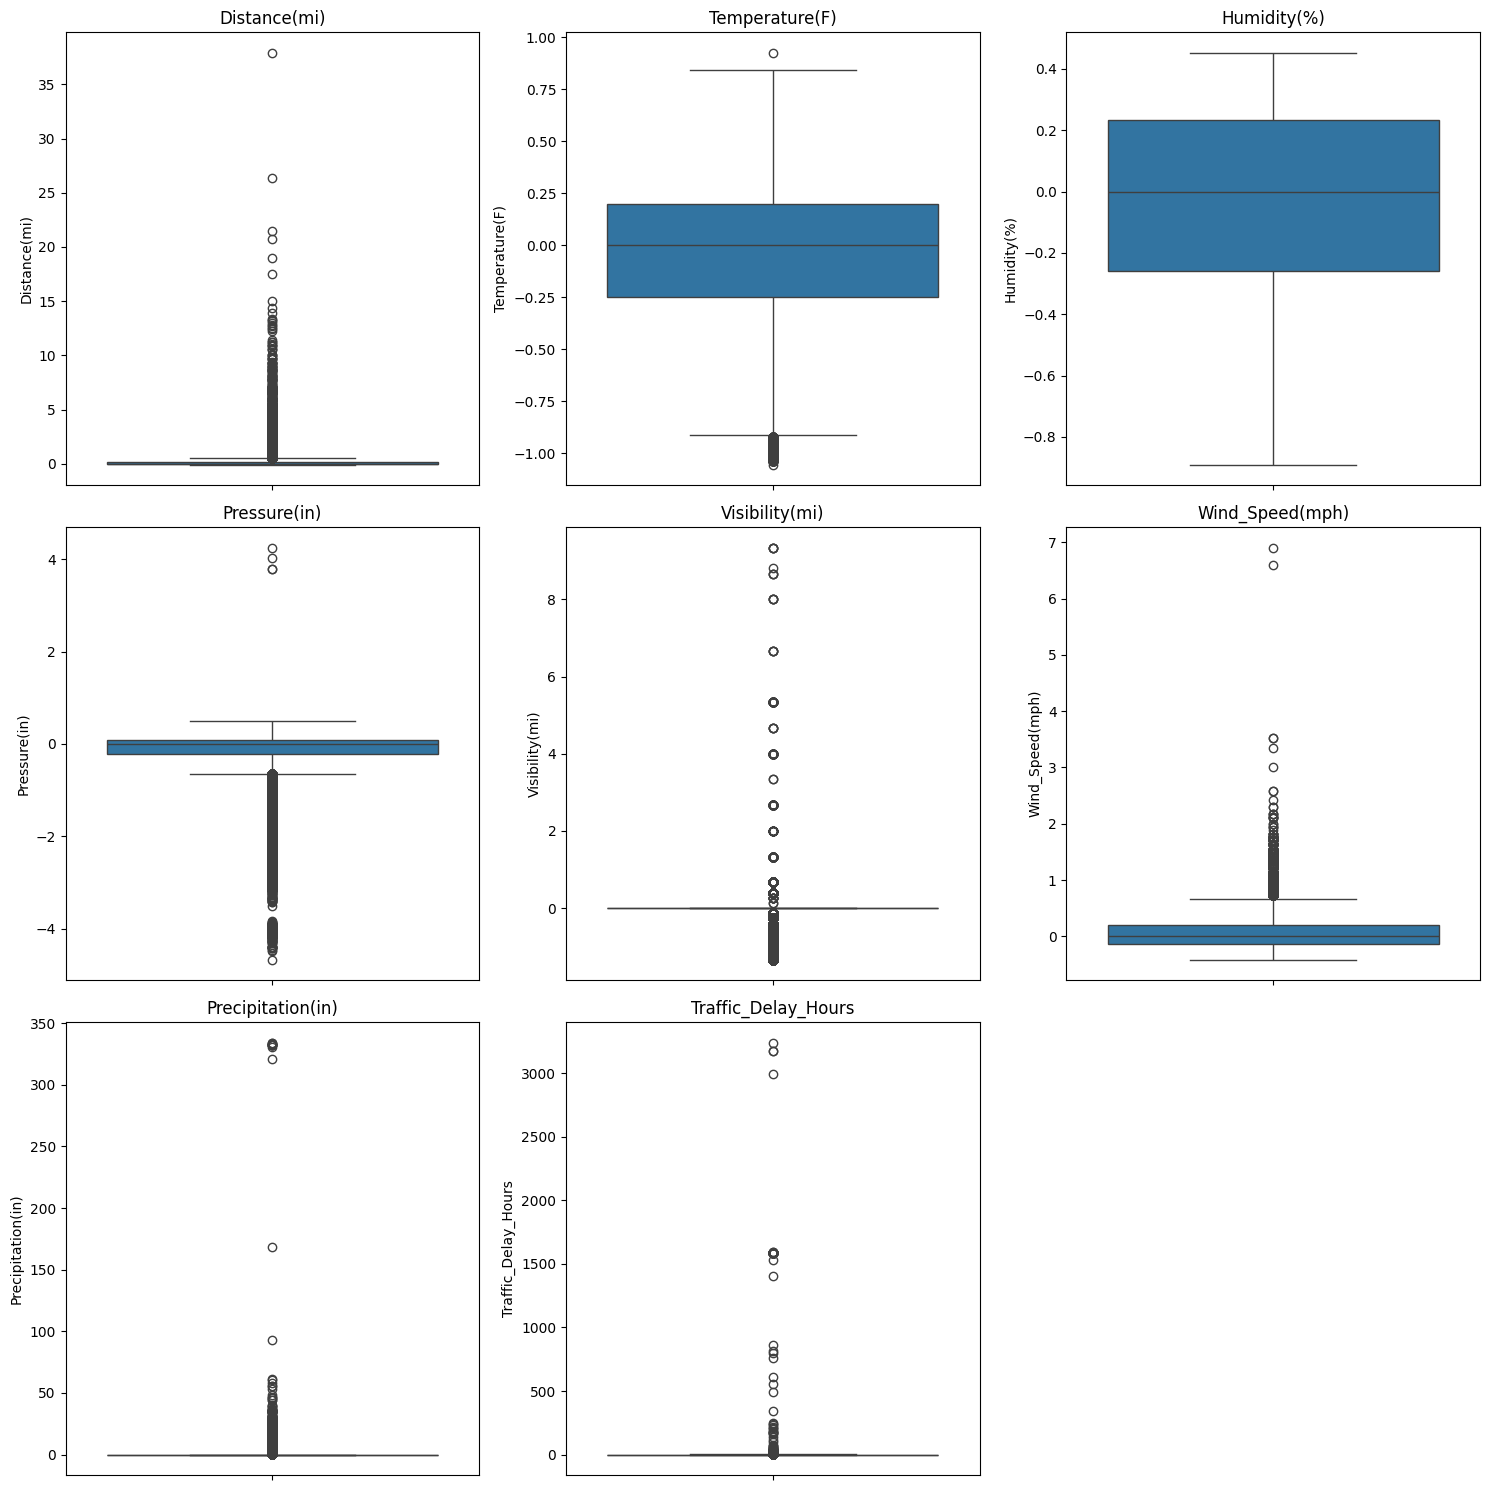

In [ ]:
# Select the desired columns
df = df_US_Accidents_Train[['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Traffic_Delay_Hours']]
num_columns = df.columns

# Determine the number of plots
num_plots = len(num_columns)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot boxplots using Seaborn
for i, col in enumerate(num_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**Interpretation:** From the 2 box plot ploted we can see the there has been a robusr scalar has scaled the data to a significant level

#### Missing Value Imputation

2. Check the presence of missing values and garbage values.

In [ ]:
df_US_Accidents_Train.isna().mean() * 100

ID                       0.000000
Source                   0.000000
Distance(mi)            37.743358
State                    0.000000
Timezone                 0.000000
Temperature(F)           0.000000
Humidity(%)              0.128864
Pressure(in)             0.098543
Visibility(mi)           0.526828
Wind_Direction           0.565992
Wind_Speed(mph)          5.591070
Precipitation(in)       27.186588
Weather_Condition        0.000000
Amenity                  0.000000
Bump                     0.000000
Crossing                 0.000000
Give_Way                 0.000000
Junction                 0.000000
No_Exit                  0.000000
Railway                  0.000000
Roundabout               0.000000
Station                  0.000000
Stop                     0.000000
Traffic_Calming          0.000000
Traffic_Signal           0.000000
Sunrise_Sunset           0.282996
Civil_Twilight           0.282996
Nautical_Twilight        0.282996
Astronomical_Twilight    0.282996
Traffic_Delay_Hours      0.000000
Accident_Year            0.000000
Dayofweek                0.000000
Accident_Month           0.000000
Dayofmonth               0.000000
Hourofday                0.000000
Severity                 0.000000
dtype: float64

**For categorical columns, replacing mode for missing values**

In [ ]:
missing_categorical = ["Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight","Wind_Direction","Timezone"]
for col in missing_categorical:
    df_US_Accidents_Train[col].fillna(df_US_Accidents_Train[col].mode()[0], inplace=True)

In [ ]:
missing_categorical = ["Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight","Wind_Direction","Timezone"]
for col in missing_categorical:
    df_US_Accidents_Test[col].fillna(df_US_Accidents_Test[col].mode()[0], inplace=True)

In [ ]:
df_US_Accidents_Train.isna().mean() * 100

ID                       0.000000
Source                   0.000000
Distance(mi)            37.743358
State                    0.000000
Timezone                 0.000000
Temperature(F)           0.000000
Humidity(%)              0.128864
Pressure(in)             0.098543
Visibility(mi)           0.526828
Wind_Direction           0.000000
Wind_Speed(mph)          5.591070
Precipitation(in)       27.186588
Weather_Condition        0.000000
Amenity                  0.000000
Bump                     0.000000
Crossing                 0.000000
Give_Way                 0.000000
Junction                 0.000000
No_Exit                  0.000000
Railway                  0.000000
Roundabout               0.000000
Station                  0.000000
Stop                     0.000000
Traffic_Calming          0.000000
Traffic_Signal           0.000000
Sunrise_Sunset           0.000000
Civil_Twilight           0.000000
Nautical_Twilight        0.000000
Astronomical_Twilight    0.000000
Traffic_Delay_Hours      0.000000
Accident_Year            0.000000
Dayofweek                0.000000
Accident_Month           0.000000
Dayofmonth               0.000000
Hourofday                0.000000
Severity                 0.000000
dtype: float64

**Checking for outliers using box plot for missing value columns**

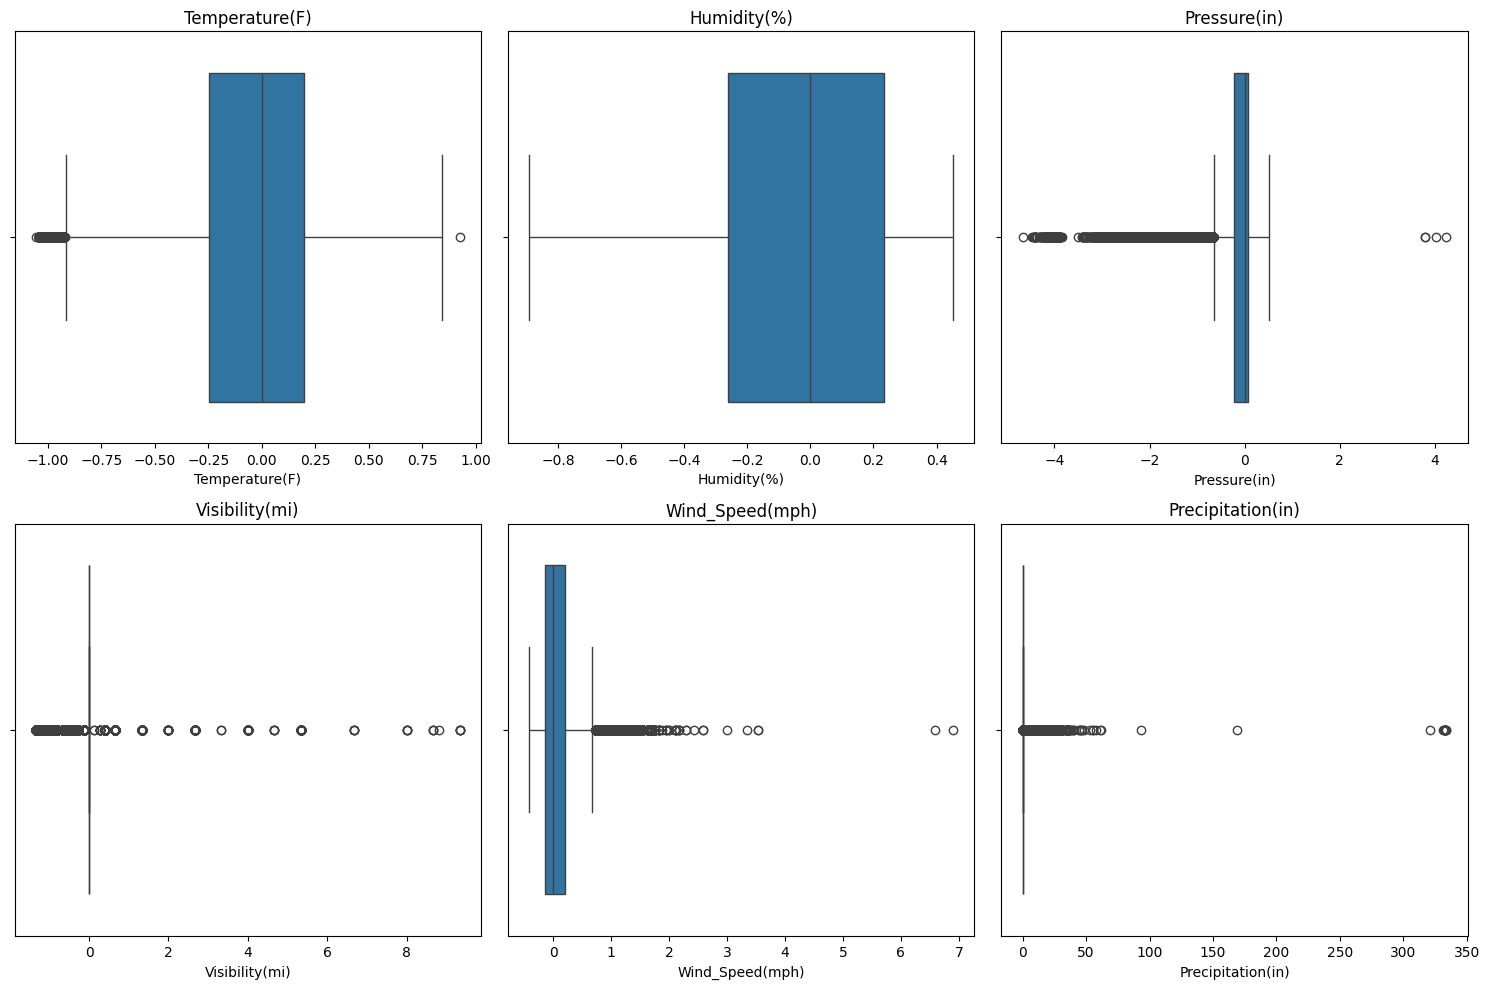

In [ ]:
# List of numerical columns with missing values
missing_numerical = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)',
                     'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Calculate number of rows needed for subplots
rows = (len(missing_numerical) + 2) // 3  # Equivalent to math.ceil(len(missing_numerical) / 3)

# Create subplots
fig, ax = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows * 5))

# Iterate through columns and plot box plots
for i, col in enumerate(missing_numerical):
    row, col_index = divmod(i, 3)  # Get row and column index for the subplot
    sns.boxplot(data=df_US_Accidents_Train, x=col, ax=ax[row, col_index])
    ax[row, col_index].set_title(col)  # Set title for each subplot

# Hide empty subplots if any
for i in range(len(missing_numerical), rows * 3):
    row, col_index = divmod(i, 3)
    ax[row, col_index].axis('off')

plt.tight_layout()
plt.show()


**Interpretation:** From the above box plot we can see that there are outliers present in almost all feature so to replacing the nan value with median.

In [ ]:
# Create copies of the DataFrames
df_train = df_US_Accidents_Train.copy()
df_test = df_US_Accidents_Test.copy()

# Fill missing values with median for both training and test data
for col in df_train.select_dtypes(include="number").columns:
    df_train[col].fillna(df_train[col].median(), inplace=True)

for col in df_test.select_dtypes(include="number").columns:
    df_test[col].fillna(df_test[col].median(), inplace=True)

# Create an instance of KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the training data
knn_imputer.fit(df_train.select_dtypes(include="number"))

# Transform the training data
df_train_imputed = knn_imputer.transform(df_train.select_dtypes(include="number"))

# Convert the result back to a DataFrame
df_train_imputed = pd.DataFrame(df_train_imputed,
                                columns=df_train.select_dtypes(include="number").columns,
                                index=df_train.index)

# Assign the imputed DataFrame back to the original DataFrame
for col in df_train_imputed.columns:
    df_train[col] = df_train_imputed[col]

# Transform the test data
df_test_imputed = knn_imputer.transform(df_test.select_dtypes(include="number"))

# Convert the result back to a DataFrame
df_test_imputed = pd.DataFrame(df_test_imputed,
                               columns=df_test.select_dtypes(include="number").columns,
                               index=df_test.index)

# Assign the imputed DataFrame back to the original DataFrame
for col in df_test_imputed.columns:
    df_test[col] = df_test_imputed[col]

# If you need to update the original DataFrames
df_US_Accidents_Train.update(df_train)
df_US_Accidents_Test.update(df_test)

In [ ]:
df_US_Accidents_Train.head()

ID   Source  Distance(mi) State    Timezone  Temperature(F)  \
85630    A-400343  Source2     -0.071634    CA  US/Pacific       -0.260726   
162981    A-83568  Source2     -0.071634    CA  US/Pacific        0.047855   
16889   A-5519438  Source1     -0.025701    FL  US/Eastern        0.330033   
103862   A-915978  Source2      0.000000    CA  US/Pacific        0.033003   
170834  A-4409189  Source1      0.483117    CA  US/Pacific       -0.412541   

        Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
85630      0.273973      0.092920        0.000000            VAR   
162981    -0.013699      0.088496        0.000000           CALM   
16889     -0.164384      0.106195        0.000000              E   
103862    -0.150685     -0.176991        0.000000             SE   
170834     0.123288     -0.137168       -0.400000             SE   

        Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity  Bump  \
85630         -0.070588           0.000000     Partly Cloudy        0     0   
162981         0.000000           0.000000     Partly Cloudy        0     0   
16889          0.294118           0.000000              Fair        0     0   
103862        -0.235294           0.000000             Other        0     0   
170834        -0.117647           0.000000              Fair        0     0   

        Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station  \
85630          0         0         0        0        0           0        0   
162981         0         0         0        0        0           0        0   
16889          0         0         0        0        0           0        0   
103862         0         0         0        0        0           0        0   
170834         0         0         0        0        0           0        0   

        Stop  Traffic_Calming  Traffic_Signal Sunrise_Sunset Civil_Twilight  \
85630      0                0               0          Night          Night   
162981     0                0               0            Day            Day   
16889      0                0               0            Day            Day   
103862     0                0               0            Day            Day   
170834     0                0               0          Night          Night   

       Nautical_Twilight Astronomical_Twilight  Traffic_Delay_Hours  \
85630              Night                   Day            -0.091469   
162981               Day                   Day            -0.118095   
16889                Day                   Day             0.181670   
103862               Day                   Day            -0.137475   
170834               Day                   Day             0.911067   

        Accident_Year  Dayofweek  Accident_Month  Dayofmonth  Hourofday  \
85630            2017          4               4          28          4   
162981           2016          3              10          13         10   
16889            2021          3               5          27         13   
103862           2021          2               9           1          8   
170834           2022          2               2           2          6   

       Severity  
85630         0  
162981        1  
16889         0  
103862        0  
170834        0

**Droping Start and end lat,long as they don't provide meaningfull information to model**

In [ ]:
df_US_Accidents_Train.drop(["ID","Source","Roundabout","Give_Way","Timezone","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"],axis=1,inplace=True)
df_US_Accidents_Test.drop(["ID","Source","Roundabout","Give_Way","Timezone","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"],axis=1,inplace=True)

**Interpretation:** All the missing values are handled

In [ ]:
X_train = df_US_Accidents_Train.drop(["Severity"],axis=1)
y_train = df_US_Accidents_Train["Severity"]
X_test = df_US_Accidents_Test.drop(["Severity"],axis=1)
y_test = df_US_Accidents_Test["Severity"]

In [ ]:
df_cat = X_train.select_dtypes(include="object")
df_num = X_train.select_dtypes(include="number")
df_dummies = pd.get_dummies(df_cat,drop_first=True,dtype=int)
X_train = pd.concat([df_num,df_dummies],axis=1)

In [ ]:
df_cat = X_test.select_dtypes(include="object")
df_num = X_test.select_dtypes(include="number")
df_dummies = pd.get_dummies(df_cat,drop_first=True,dtype=int)
X_test = pd.concat([df_num,df_dummies],axis=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(158306, 60)
(158306,)
(67846, 60)
(67846,)


In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

#### ADASAN

In [ ]:
# Step 3: Initialize ADASYN and optionally RandomUnderSampler for better balance
adasyn = ADASYN(sampling_strategy='minority', random_state=100)

# Optional: Combine with RandomUnderSampler to achieve a more balanced dataset
# This step helps if the dataset is very imbalanced after ADASYN.
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=100)
pipeline = Pipeline(steps=[('adasyn', adasyn), ('under', undersample)])

# Step 4: Fit ADASYN on the training data
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(254866, 60)
(254866,)


In [ ]:
X_train = X_resampled
y_train = y_resampled

#### Modeling Functions

In [ ]:
df_result_Test = pd.DataFrame(columns=['Model Name','Recall 0','Recall 1','Precision 0','Precision 1','F1-Score 0','F1-Score 1'])
df_result_Train = pd.DataFrame(columns=['Model Name','Recall 0','Recall 1','Precision 0','Precision 1','F1-Score 0','F1-Score 1'])

In [ ]:
df_result_Test

Empty DataFrame
Columns: [Model Name, Recall 0, Recall 1, Precision 0, Precision 1, F1-Score 0, F1-Score 1]
Index: []

In [ ]:
df_result_Train

Empty DataFrame
Columns: [Model Name, Recall 0, Recall 1, Precision 0, Precision 1, F1-Score 0, F1-Score 1]
Index: []

**Classification Report**

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

def get_test_report(model, test_data, target_data):
    # Predict the probabilities for the positive class
    y_proba = model.predict_proba(test_data)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(target_data, y_proba)

    # Compute Youden's J statistic
    j_scores = tpr - fpr
    best_index = np.argmax(j_scores)
    best_threshold = thresholds[best_index]

    print(f'Best threshold according to Youden\'s J statistic: {best_threshold}')
    print("\n")

    # Predict classes based on a specific threshold
    y_pred = (y_proba >= best_threshold).astype(int)  # Using best_threshold for prediction

    # Generate classification report
    report = classification_report(target_data, y_pred)
    print(report)

    # Return the classification report for test data
    return classification_report(target_data, y_pred, output_dict=True)

**Confusion Matrix**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from matplotlib.colors import ListedColormap

def plot_confusion_matrix(model, test_data, target_data):
    # Predict the probabilities for the positive class
    y_proba = model.predict_proba(test_data)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(target_data, y_proba)

    # Compute Youden's J statistic
    j_scores = tpr - fpr
    best_index = np.argmax(j_scores)
    best_threshold = thresholds[best_index]

    # Predict classes based on the best threshold
    y_pred = (y_proba >= best_threshold).astype(int)

    # Create a confusion matrix
    cm = confusion_matrix(target_data, y_pred)

    # Label the confusion matrix
    conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

    # Plot a heatmap to visualize the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
                linewidths=0.1, annot_kws={'size': 12})

    # Set the font size of x-axis and y-axis ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Display the plot
    plt.show()


**ROC AUC Curve**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

def plot_roc(model, X_test, y_test):
    """
    Plots the ROC curve for a binary classification model and calculates the ROC-AUC score.

    Parameters:
    - model: Trained machine learning model with `predict_proba` method
    - X_test: Features of the test set
    - y_test: True target values of the test set
    """
    # Predict the probability of the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')

    # Plot the diagonal line representing a random classifier
    plt.plot([0, 1], [0, 1], 'r--')

    # Set the limits for the x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # Add plot and axes labels
    plt.title('ROC Curve for Binary Classification', fontsize=15)
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=15)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)

    # Add a legend to the plot
    plt.legend(loc='lower right')

    # Add grid lines for better readability
    plt.grid(True)

    # Display the plot
    plt.show()


#### K nearest Neighbor

**Initial complete modeling**

In [ ]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier()

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

###### Base Model

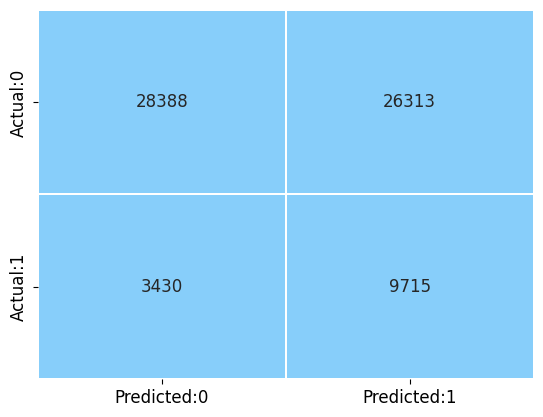

In [ ]:
plot_confusion_matrix(knn_model,X_test,y_test)

In [ ]:
report = get_test_report(knn_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.4


              precision    recall  f1-score   support

           0       0.89      0.52      0.66     54701
           1       0.27      0.74      0.40     13145

    accuracy                           0.56     67846
   macro avg       0.58      0.63      0.53     67846
weighted avg       0.77      0.56      0.61     67846



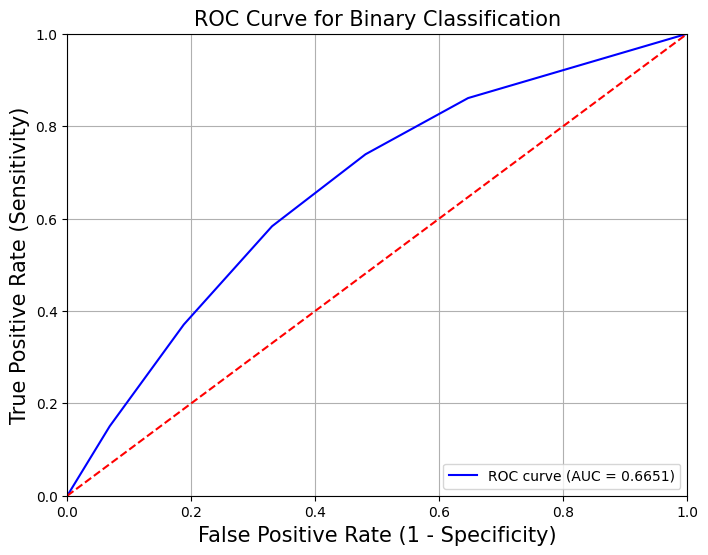

In [ ]:
plot_roc(knn_model,X_test,y_test)

In [ ]:
df_result_Test.loc[0] = ['KNN Classification Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  Precision 0  \
0  KNN Classification Base Model  0.519000  0.739100     0.892200   

   Precision 1  F1-Score 0  F1-Score 1  
0     0.269700    0.656200    0.395100

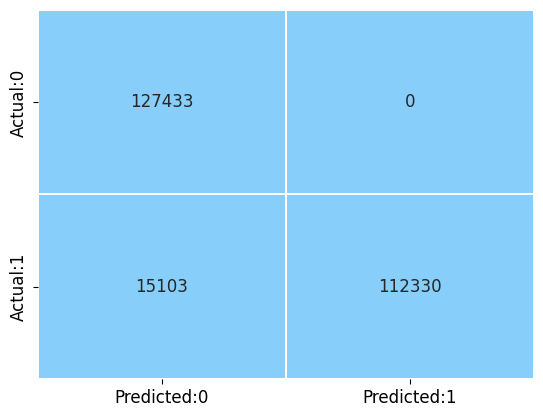

In [ ]:
plot_confusion_matrix(knn_model,X_train,y_train)

In [ ]:
report = get_test_report(knn_model,X_train,y_train)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 1.0


              precision    recall  f1-score   support

           0       0.89      1.00      0.94    127433
           1       1.00      0.88      0.94    127433

    accuracy                           0.94    254866
   macro avg       0.95      0.94      0.94    254866
weighted avg       0.95      0.94      0.94    254866



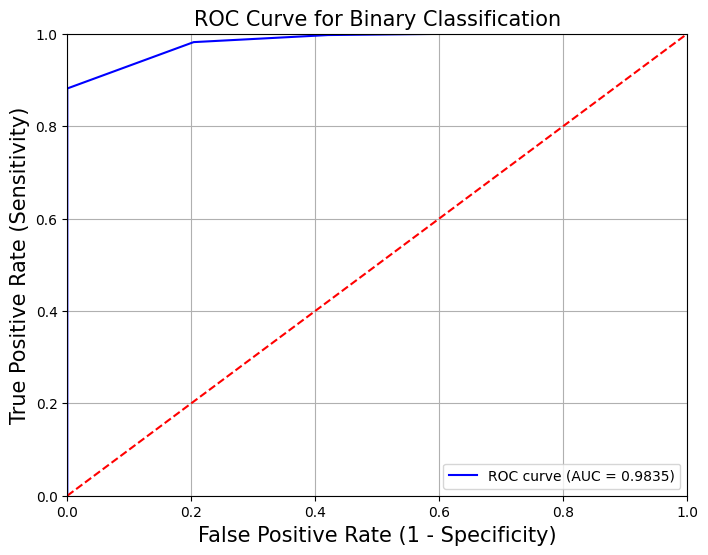

In [ ]:
plot_roc(knn_model,X_train,y_train)

In [ ]:
df_result_Train.loc[0] = ['KNN Classification Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Train

Model Name  Recall 0  Recall 1  Precision 0  \
0  KNN Classification Base Model  1.000000  0.881500     0.894000   

   Precision 1  F1-Score 0  F1-Score 1  
0     1.000000    0.944100    0.937000

###### HyperOpt Model

In [ ]:
X = X_train
y = y_train

# Split data into train and test sets
X_train_hype, X_test_hype, y_train_hype, y_test_hype = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(params):
    n_neighbors = int(params['n_neighbors'])
    metric = params['metric']

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, n_jobs=-1)
    knn.fit(X_train_hype, y_train_hype)
    y_pred_hype = knn.predict(X_test_hype)
    recall = recall_score(y_test_hype, y_pred_hype)

    return -recall  # Hyperopt minimizes the objective, so negate the recall to maximize it

space = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 20, 1),
    'metric': hp.choice('metric', ['euclidean', 'manhattan'])
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

print('Best parameters: ', best)


100%|██████████| 10/10 [1:28:03<00:00, 528.33s/trial, best loss: -0.9922259551527463]
Best parameters:  {'metric': 1, 'n_neighbors': 11.0}


In [ ]:
knn_classification = KNeighborsClassifier(n_neighbors = int(best['n_neighbors']),metric = ['euclidean', 'manhattan'][best['metric']])
knn_model = knn_classification.fit(X_train, y_train)

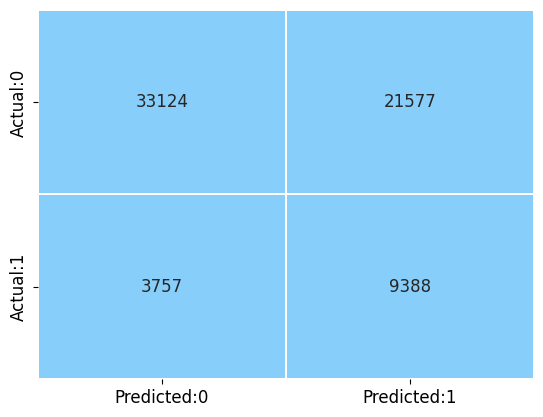

In [ ]:
plot_confusion_matrix(knn_model,X_test,y_test)

In [ ]:
report = get_test_report(knn_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.7272727272727273


              precision    recall  f1-score   support

           0       0.90      0.61      0.72     54701
           1       0.30      0.71      0.43     13145

    accuracy                           0.63     67846
   macro avg       0.60      0.66      0.57     67846
weighted avg       0.78      0.63      0.67     67846



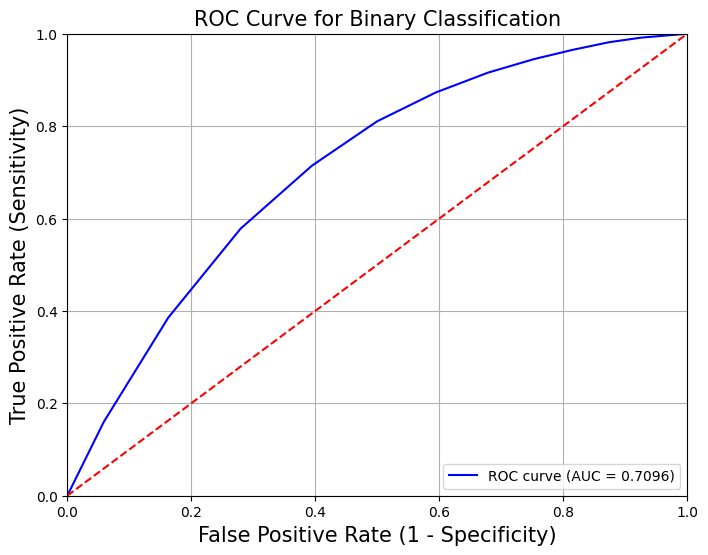

In [ ]:
plot_roc(knn_model,X_test,y_test)

In [ ]:
df_result_Test.loc[1] = ['KNN Classification Hypertuned Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  Precision 0  \
0        KNN Classification Base Model  0.519000  0.739100     0.892200   
1  KNN Classification Hypertuned Model  0.605500  0.714200     0.898100   

   Precision 1  F1-Score 0  F1-Score 1  
0     0.269700    0.656200    0.395100  
1     0.303200    0.723400    0.425700

#### Naive Bayes Algorithm

###### Base Model

In [ ]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

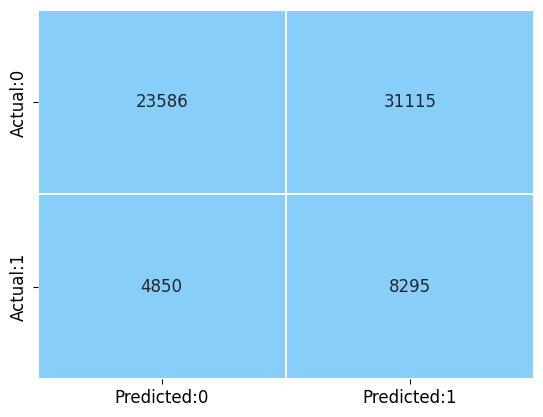

In [ ]:
plot_confusion_matrix(gnb_model,X_test,y_test)

In [ ]:
report = get_test_report(gnb_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 5.046890015486499e-150


              precision    recall  f1-score   support

           0       0.83      0.43      0.57     54701
           1       0.21      0.63      0.32     13145

    accuracy                           0.47     67846
   macro avg       0.52      0.53      0.44     67846
weighted avg       0.71      0.47      0.52     67846



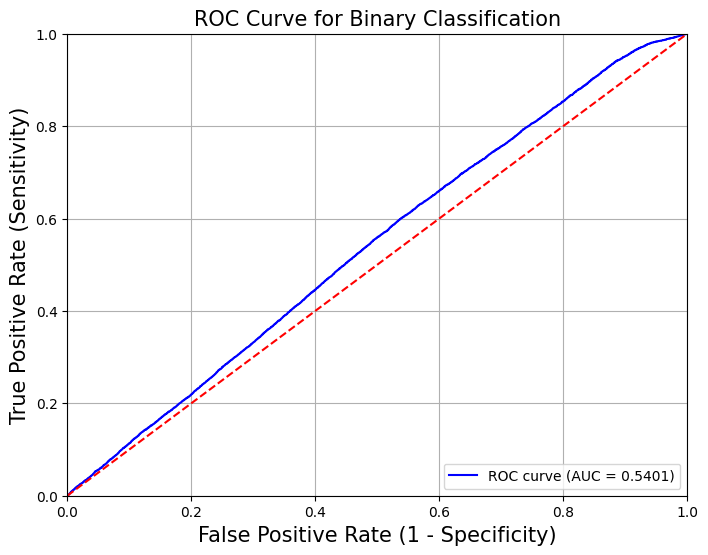

In [ ]:
plot_roc(gnb_model,X_test,y_test)

In [ ]:
df_result_Test.loc[2] = ['Naive Bayes Algorithm Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  Precision 0  \
0        KNN Classification Base Model  0.519000  0.739100     0.892200   
1  KNN Classification Hypertuned Model  0.605500  0.714200     0.898100   
2     Naive Bayes Algorithm Base Model  0.431200  0.631000     0.829400   

   Precision 1  F1-Score 0  F1-Score 1  
0     0.269700    0.656200    0.395100  
1     0.303200    0.723400    0.425700  
2     0.210500    0.567400    0.315700

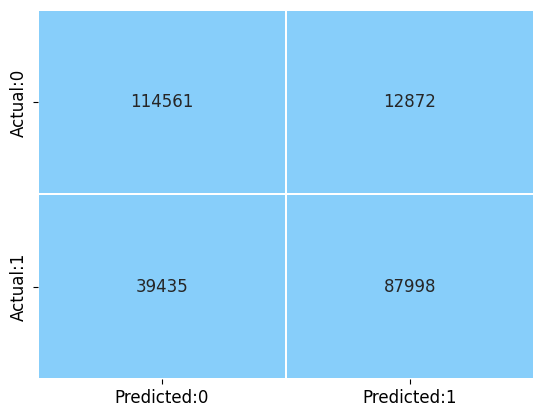

In [ ]:
plot_confusion_matrix(gnb_model,X_train,y_train)

In [ ]:
report = get_test_report(gnb_model,X_train,y_train)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.999999990542566


              precision    recall  f1-score   support

           0       0.74      0.90      0.81    127433
           1       0.87      0.69      0.77    127433

    accuracy                           0.79    254866
   macro avg       0.81      0.79      0.79    254866
weighted avg       0.81      0.79      0.79    254866



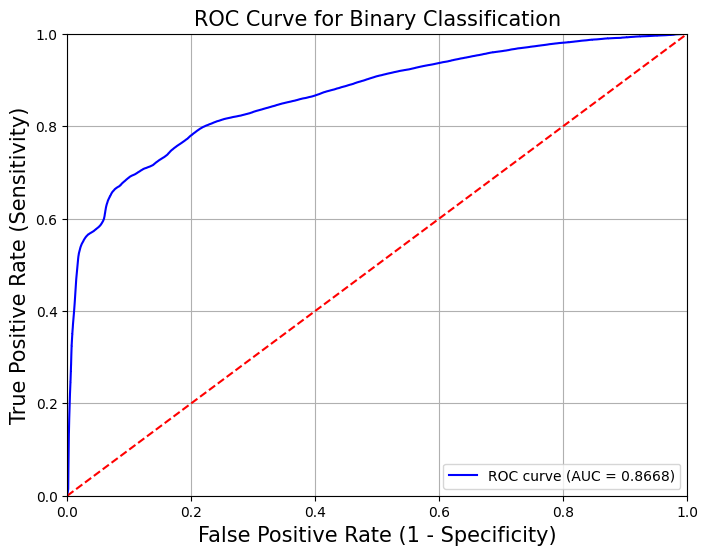

In [ ]:
plot_roc(gnb_model,X_train,y_train)

In [ ]:
df_result_Train.loc[1] = ['Naive Bayes Algorithm Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Train

Model Name  Recall 0  Recall 1  Precision 0  \
0     KNN Classification Base Model  1.000000  0.881500     0.894000   
1  Naive Bayes Algorithm Base Model  0.899000  0.690500     0.743900   

   Precision 1  F1-Score 0  F1-Score 1  
0     1.000000    0.944100    0.937000  
1     0.872400    0.814100    0.770900

###### HyperOpt Model

In [ ]:
# Sample data
X = X_train  # Your feature matrix
y = y_train  # Your target variable

# Split data into train and test sets
X_train_hype, X_test_hype, y_train_hype, y_test_hype = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function
def objective(params):
    # Create the Gaussian Naive Bayes classifier
    gnb = GaussianNB(var_smoothing=params['var_smoothing'])

    # Fit the model
    gnb.fit(X_train_hype, y_train_hype)

    # Make predictions
    y_pred_hype = gnb.predict(X_test_hype)

    # Calculate recall score
    recall = recall_score(y_test_hype, y_pred_hype, average='binary')  # Change 'average' if multi-class

    return -recall  # Hyperopt minimizes the objective, so negate the recall to maximize it

# Define the search space
space = {
    'var_smoothing': hp.loguniform('var_smoothing', np.log(1e-9), np.log(1e+0))  # Positive values only
}

# Set up Trials object
trials = Trials()

# Run hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

print('Best parameters: ', best)


100%|██████████| 10/10 [00:03<00:00,  2.80trial/s, best loss: -0.9995702789280413]
Best parameters:  {'var_smoothing': 0.6642006410887862}


In [ ]:
# instantiate the 'GaussianNB'
gnb = GaussianNB(var_smoothing=float(best['var_smoothing']))

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

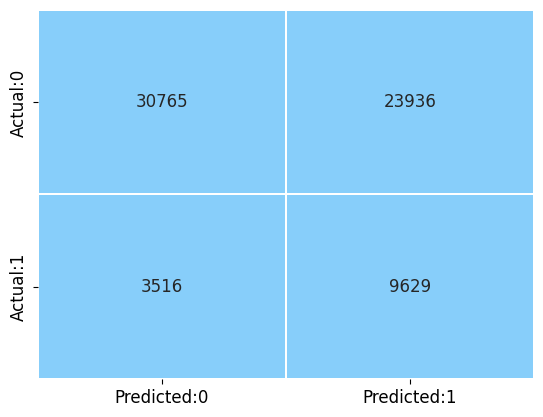

In [ ]:
plot_confusion_matrix(gnb_model,X_test,y_test)

In [ ]:
report = get_test_report(gnb_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.6476825593947318


              precision    recall  f1-score   support

           0       0.90      0.56      0.69     54701
           1       0.29      0.73      0.41     13145

    accuracy                           0.60     67846
   macro avg       0.59      0.65      0.55     67846
weighted avg       0.78      0.60      0.64     67846



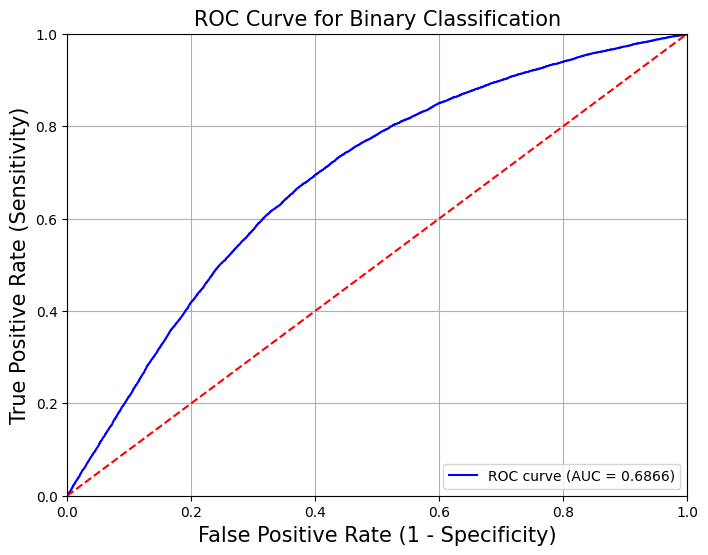

In [ ]:
plot_roc(gnb_model,X_test,y_test)

In [ ]:
df_result_Test.loc[3] = ['Naive Bayes Algorithm Hypertuned Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  Precision 0  \
0           KNN Classification Base Model  0.519000  0.739100     0.892200   
1     KNN Classification Hypertuned Model  0.605500  0.714200     0.898100   
2        Naive Bayes Algorithm Base Model  0.431200  0.631000     0.829400   
3  Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500     0.897400   

   Precision 1  F1-Score 0  F1-Score 1  
0     0.269700    0.656200    0.395100  
1     0.303200    0.723400    0.425700  
2     0.210500    0.567400    0.315700  
3     0.286900    0.691500    0.412300

#### Multinomial Naive Bayes

###### Base model

In [ ]:
MultiNB = MultinomialNB()
X_train_sc = MinMaxScaler().fit_transform(X_train)
X_test_sc = MinMaxScaler().fit_transform(X_test)
MultiNB.fit(X_train_sc, y_train)

MultinomialNB()

In [ ]:
y_pred = MultiNB.predict(X_test_sc)

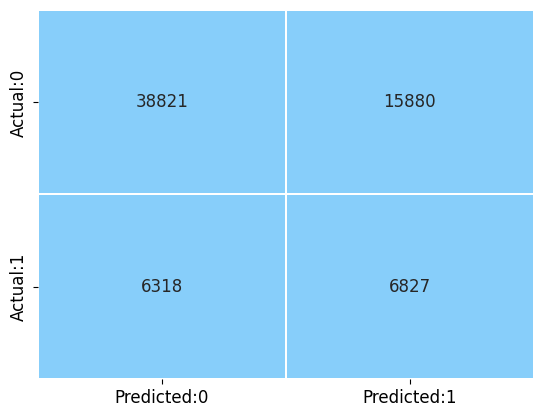

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

# Plot the heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
            linewidths=0.1, annot_kws={'size':12})

# Set the font size of x-axis and y-axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78     54701
           1       0.30      0.52      0.38     13145

    accuracy                           0.67     67846
   macro avg       0.58      0.61      0.58     67846
weighted avg       0.75      0.67      0.70     67846



In [ ]:
report = classification_report(y_test, y_pred,output_dict=True)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

In [ ]:
df_result_Test.loc[4] = ['Multinomial Naive Bayes Classifier Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                  KNN Classification Base Model  0.519000  0.739100   
1            KNN Classification Hypertuned Model  0.605500  0.714200   
2               Naive Bayes Algorithm Base Model  0.431200  0.631000   
3         Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4  Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   

   Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0     0.892200     0.269700    0.656200    0.395100  
1     0.898100     0.303200    0.723400    0.425700  
2     0.829400     0.210500    0.567400    0.315700  
3     0.897400     0.286900    0.691500    0.412300  
4     0.860000     0.300700    0.777700    0.380800

###### HyperOpt Model

In [ ]:
X = X_train_sc
y = y_train

# Split data into train and test sets
X_train_hype, X_test_hype, y_train_hype, y_test_hype = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(params):
    alpha = params['alpha']

    # Initialize and fit the model
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train_hype, y_train_hype)
    y_pred_hype = model.predict(X_test_hype)

    # Compute recall score
    recall = recall_score(y_test_hype, y_pred_hype)

    # Return the negative recall score since Hyperopt minimizes the objective
    return -recall

# Define the parameter space for `alpha`
space = {
    'alpha': hp.uniform('alpha', 0.01, 2.0)  # Uniform distribution for alpha
}

# Initialize Trials object
trials = Trials()

# Perform hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

print('Best parameters: ', best)

100%|██████████| 10/10 [00:02<00:00,  4.09trial/s, best loss: -0.8299476521603251]
Best parameters:  {'alpha': 1.9982657539670505}


In [ ]:
MultiNB = MultinomialNB(alpha=float(best['alpha']))
MultiNB.fit(X_train_sc, y_train)

MultinomialNB(alpha=1.9982657539670505)

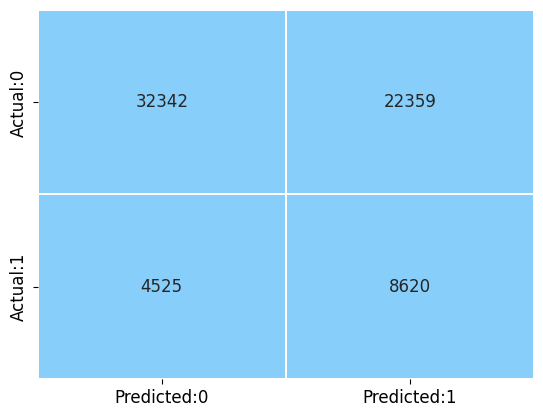

In [ ]:
plot_confusion_matrix(MultiNB,X_test_sc,y_test)

In [ ]:
report = get_test_report(MultiNB,X_test_sc,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.4248142250470152


              precision    recall  f1-score   support

           0       0.88      0.59      0.71     54701
           1       0.28      0.66      0.39     13145

    accuracy                           0.60     67846
   macro avg       0.58      0.62      0.55     67846
weighted avg       0.76      0.60      0.65     67846



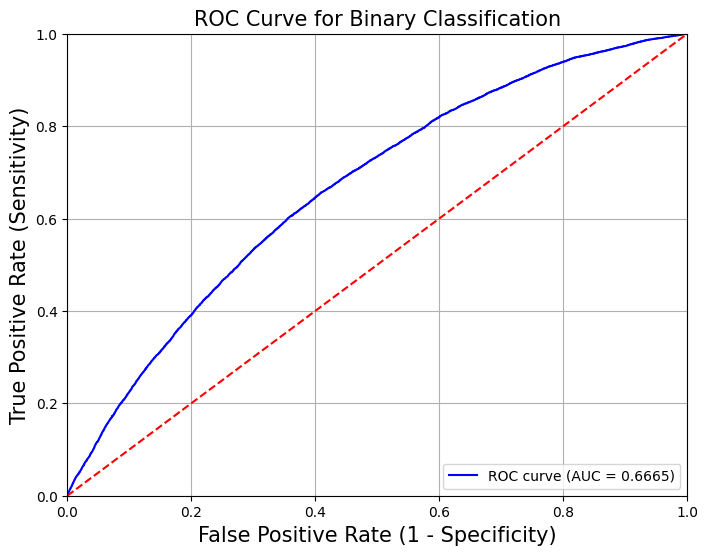

In [ ]:
plot_roc(MultiNB,X_test_sc,y_test)

In [ ]:
df_result_Test.loc[5] = ['Multinomial Naive Bayes Classifier Hypertuned Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                        KNN Classification Base Model  0.519000  0.739100   
1                  KNN Classification Hypertuned Model  0.605500  0.714200   
2                     Naive Bayes Algorithm Base Model  0.431200  0.631000   
3               Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4        Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
5  Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   

   Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0     0.892200     0.269700    0.656200    0.395100  
1     0.898100     0.303200    0.723400    0.425700  
2     0.829400     0.210500    0.567400    0.315700  
3     0.897400     0.286900    0.691500    0.412300  
4     0.860000     0.300700    0.777700    0.380800  
5     0.877300     0.278300    0.706400    0.390700

#### Decision tree

###### Base Model

In [ ]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier()

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

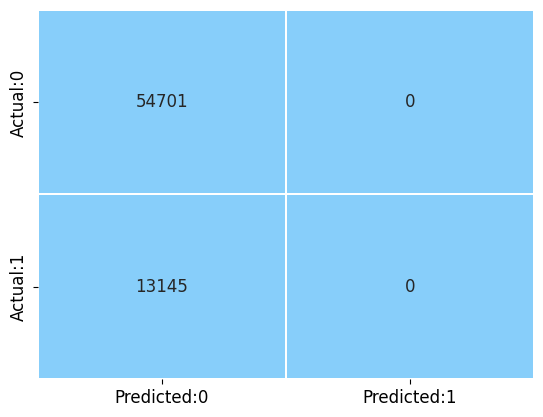

In [ ]:
plot_confusion_matrix(decision_tree,X_test,y_test)

In [ ]:
report = get_test_report(decision_tree,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: inf


              precision    recall  f1-score   support

           0       0.81      1.00      0.89     54701
           1       0.00      0.00      0.00     13145

    accuracy                           0.81     67846
   macro avg       0.40      0.50      0.45     67846
weighted avg       0.65      0.81      0.72     67846



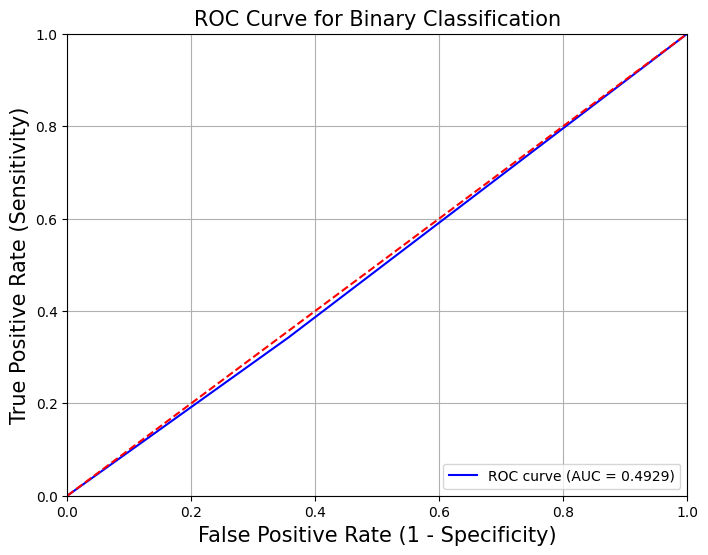

In [ ]:
plot_roc(decision_tree,X_test,y_test)

In [ ]:
df_result_Test.loc[6] = ['Decision Tree Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                        KNN Classification Base Model  0.519000  0.739100   
1                  KNN Classification Hypertuned Model  0.605500  0.714200   
2                     Naive Bayes Algorithm Base Model  0.431200  0.631000   
3               Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4        Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
5  Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   
6                             Decision Tree Base Model  1.000000  0.000000   

   Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0     0.892200     0.269700    0.656200    0.395100  
1     0.898100     0.303200    0.723400    0.425700  
2     0.829400     0.210500    0.567400    0.315700  
3     0.897400     0.286900    0.691500    0.412300  
4     0.860000     0.300700    0.777700    0.380800  
5     0.877300     0.278300    0.706400    0.390700  
6     0.806300     0.000000    0.892700    0.000000

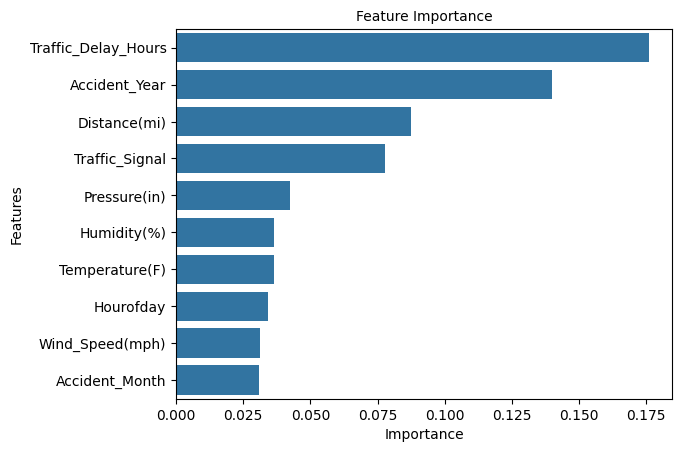

In [ ]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': decision_tree.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features[:10])

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 10)
plt.xlabel('Importance', fontsize = 10)
plt.ylabel('Features', fontsize = 10)
# display the plot
plt.show()

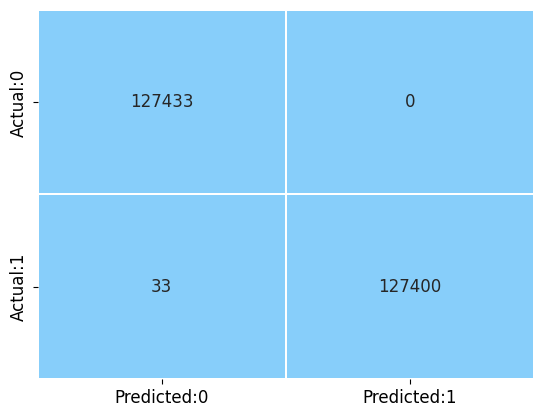

In [ ]:
plot_confusion_matrix(decision_tree,X_train,y_train)

In [ ]:
report = get_test_report(decision_tree,X_train,y_train)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127433
           1       1.00      1.00      1.00    127433

    accuracy                           1.00    254866
   macro avg       1.00      1.00      1.00    254866
weighted avg       1.00      1.00      1.00    254866



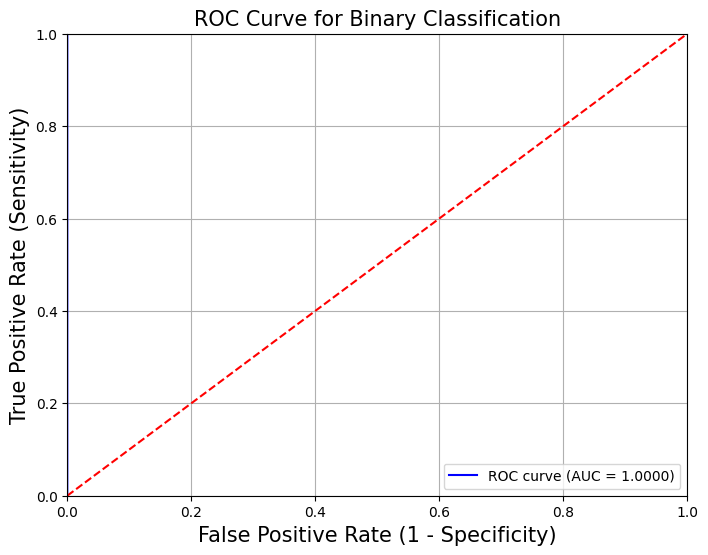

In [ ]:
plot_roc(decision_tree,X_train,y_train)

In [ ]:
df_result_Train.loc[2] = ['Decision Tree Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Train

Model Name  Recall 0  Recall 1  Precision 0  \
0     KNN Classification Base Model  1.000000  0.881500     0.894000   
1  Naive Bayes Algorithm Base Model  0.899000  0.690500     0.743900   
2          Decision Tree Base Model  1.000000  0.999700     0.999700   

   Precision 1  F1-Score 0  F1-Score 1  
0     1.000000    0.944100    0.937000  
1     0.872400    0.814100    0.770900  
2     1.000000    0.999900    0.999900

###### HyperOpt Model

In [ ]:
X = X_train
y = y_train

# Split data into train and test sets
X_train_hype, X_test_hype, y_train_hype, y_test_hype = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(params):
    criterion = params['criterion']
    max_depth = int(params['max_depth'])
    min_samples_split = int(params['min_samples_split'])
    min_samples_leaf = int(params['min_samples_leaf'])
    max_features = params['max_features']

    # Initialize and fit the model
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train_hype, y_train_hype)
    y_pred_hype = model.predict(X_test_hype)

    # Compute recall score
    recall = recall_score(y_test_hype, y_pred_hype)

    # Return the negative recall score since Hyperopt minimizes the objective
    return -recall

# Define the parameter space
space = {
    'criterion': hp.choice('criterion', ['gini', 'entropy']),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),  # Integer values between 3 and 10
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),  # Integer values between 2 and 10
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 1),  # Integer values between 1 and 5
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])
}

# Initialize Trials object
trials = Trials()

# Perform hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

print('Best parameters: ', best)


100%|██████████| 10/10 [00:09<00:00,  1.07trial/s, best loss: -0.8747558403000234]
Best parameters:  {'criterion': 1, 'max_depth': 5.0, 'max_features': 2, 'min_samples_leaf': 5.0, 'min_samples_split': 4.0}


In [ ]:
decision_tree_classification = DecisionTreeClassifier(criterion = ['gini','entropy'][best['criterion']], #Use the integer representation from hyperopt to select the correct string.
                                                       max_depth = int(best['max_depth']),
                                                       max_features = ['sqrt', 'log2', None][best['max_features']], # Same issue as criterion
                                                       min_samples_leaf = int(best['min_samples_leaf']),
                                                       min_samples_split = int(best['min_samples_split']))

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

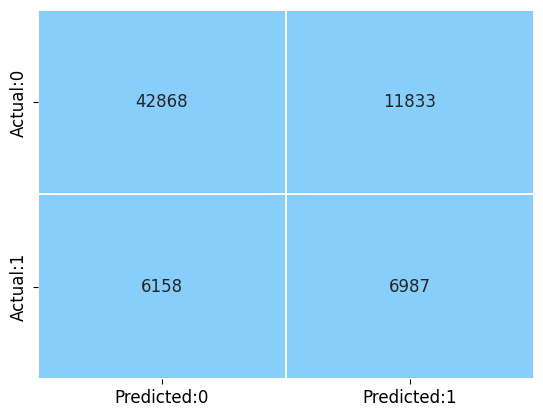

In [ ]:
plot_confusion_matrix(decision_tree,X_test,y_test)

In [ ]:
report = get_test_report(decision_tree,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.38349514563106796


              precision    recall  f1-score   support

           0       0.87      0.78      0.83     54701
           1       0.37      0.53      0.44     13145

    accuracy                           0.73     67846
   macro avg       0.62      0.66      0.63     67846
weighted avg       0.78      0.73      0.75     67846



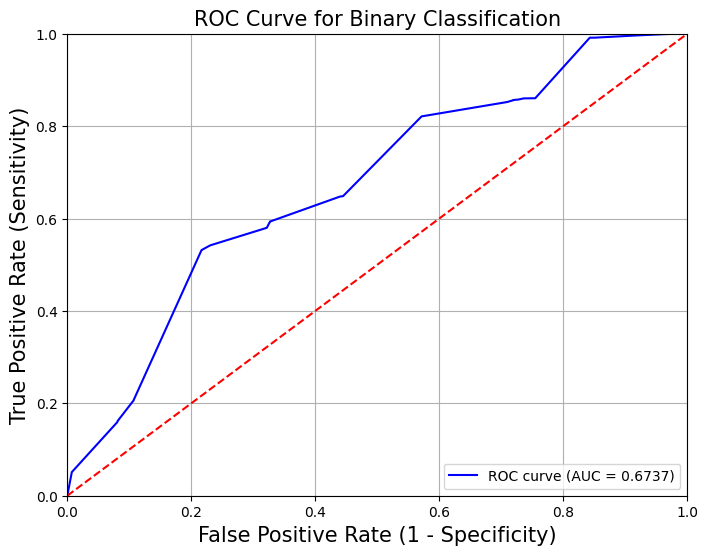

In [ ]:
plot_roc(decision_tree,X_test,y_test)

In [ ]:
df_result_Test.loc[7] = ['Decision Tree Hypertuned Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                        KNN Classification Base Model  0.519000  0.739100   
1                  KNN Classification Hypertuned Model  0.605500  0.714200   
2                     Naive Bayes Algorithm Base Model  0.431200  0.631000   
3               Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4        Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
5  Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   
6                             Decision Tree Base Model  1.000000  0.000000   
7                       Decision Tree Hypertuned Model  0.783700  0.531500   

   Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0     0.892200     0.269700    0.656200    0.395100  
1     0.898100     0.303200    0.723400    0.425700  
2     0.829400     0.210500    0.567400    0.315700  
3     0.897400     0.286900    0.691500    0.412300  
4     0.860000     0.300700    0.777700    0.380800  
5     0.877300     0.278300    0.706400    0.390700  
6     0.806300     0.000000    0.892700    0.000000  
7     0.874400     0.371300    0.826600    0.437200

#### Random Forest

###### Base Model

In [ ]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier()

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

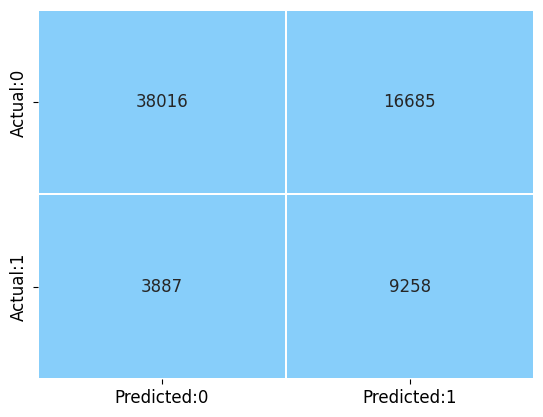

In [ ]:
plot_confusion_matrix(rf_model,X_test,y_test)

In [ ]:
report = get_test_report(rf_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.30333333333333334


              precision    recall  f1-score   support

           0       0.91      0.69      0.79     54701
           1       0.36      0.70      0.47     13145

    accuracy                           0.70     67846
   macro avg       0.63      0.70      0.63     67846
weighted avg       0.80      0.70      0.73     67846



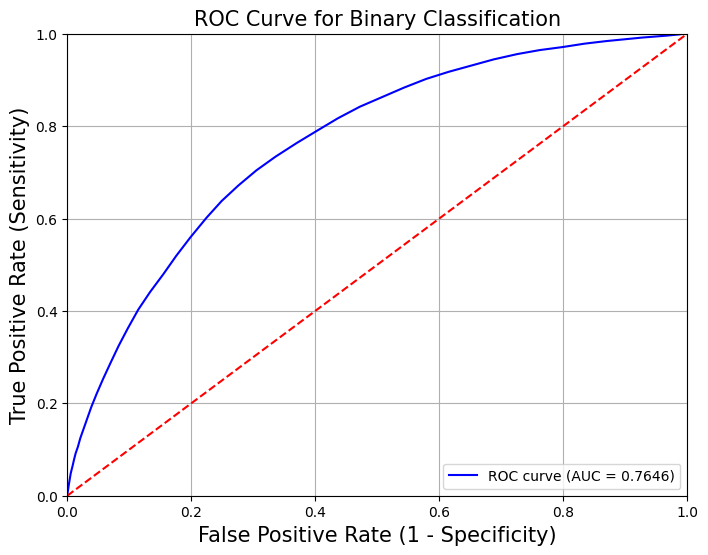

In [ ]:
plot_roc(rf_model,X_test,y_test)

In [ ]:
df_result_Test.loc[8] = ['Random Forest Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                        KNN Classification Base Model  0.519000  0.739100   
1                  KNN Classification Hypertuned Model  0.605500  0.714200   
2                     Naive Bayes Algorithm Base Model  0.431200  0.631000   
3               Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4        Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
5  Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   
6                             Decision Tree Base Model  1.000000  0.000000   
7                       Decision Tree Hypertuned Model  0.783700  0.531500   
8                             Random Forest Base Model  0.695000  0.704300   

   Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0     0.892200     0.269700    0.656200    0.395100  
1     0.898100     0.303200    0.723400    0.425700  
2     0.829400     0.210500    0.567400    0.315700  
3     0.897400     0.286900    0.691500    0.412300  
4     0.860000     0.300700    0.777700    0.380800  
5     0.877300     0.278300    0.706400    0.390700  
6     0.806300     0.000000    0.892700    0.000000  
7     0.874400     0.371300    0.826600    0.437200  
8     0.907200     0.356900    0.787000    0.473700

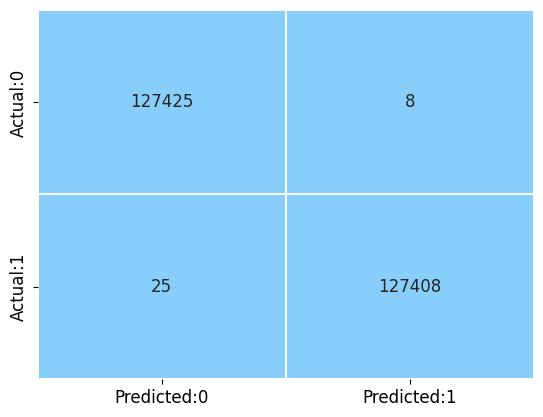

In [ ]:
plot_confusion_matrix(rf_model,X_train,y_train)

In [ ]:
report = get_test_report(rf_model,X_train,y_train)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.5


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127433
           1       1.00      1.00      1.00    127433

    accuracy                           1.00    254866
   macro avg       1.00      1.00      1.00    254866
weighted avg       1.00      1.00      1.00    254866



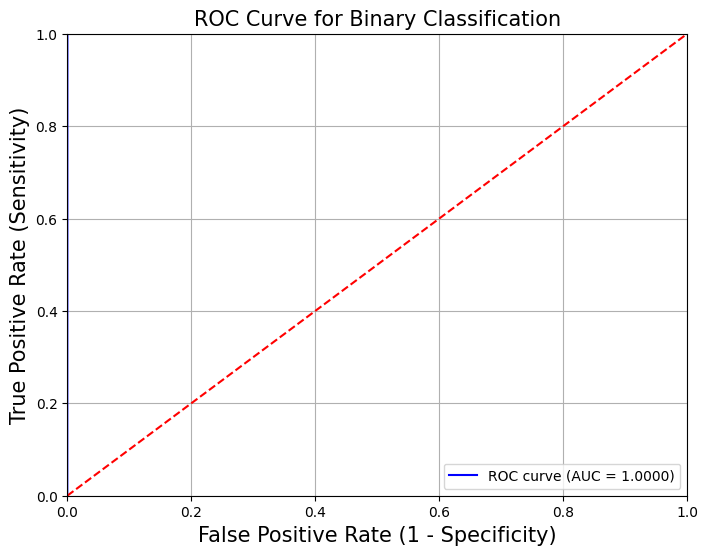

In [ ]:
plot_roc(rf_model,X_train,y_train)

In [ ]:
df_result_Train.loc[3] = ['Random Forest Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Train

Model Name  Recall 0  Recall 1  Precision 0  \
0     KNN Classification Base Model  1.000000  0.881500     0.894000   
1  Naive Bayes Algorithm Base Model  0.899000  0.690500     0.743900   
2          Decision Tree Base Model  1.000000  0.999700     0.999700   
3          Random Forest Base Model  0.999900  0.999800     0.999800   

   Precision 1  F1-Score 0  F1-Score 1  
0     1.000000    0.944100    0.937000  
1     0.872400    0.814100    0.770900  
2     1.000000    0.999900    0.999900  
3     0.999900    0.999900    0.999900

###### HyperOpt Model

In [ ]:
X = X_train  # Your feature matrix
y = y_train  # Your target variable

# Split data into train and test sets
X_train_hype, X_test_hype, y_train_hype, y_test_hype = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function
def objective(params):
    rf = RandomForestClassifier(
        criterion=params['criterion'],
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        max_features=params['max_features'],
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_leaf_nodes=int(params['max_leaf_nodes']),
        random_state=42
    )

    rf.fit(X_train_hype, y_train_hype)
    y_pred_hype = rf.predict(X_test_hype)

    recall = recall_score(y_test_hype, y_pred_hype, average='binary')  # Change 'average' if multi-class

    return -recall  # Hyperopt minimizes the objective, so negate the recall to maximize it

# Define the search space
space = {
    'criterion': hp.choice('criterion', ['gini', 'entropy']),
    'n_estimators': hp.randint('n_estimators', 90) + 10,  # Random integers between 10 and 100
    'max_depth': hp.randint('max_depth', 15) + 5,          # Random integers between 5 and 20
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
    'min_samples_split': hp.randint('min_samples_split', 8) + 2,  # Random integers between 2 and 10
    'min_samples_leaf': hp.randint('min_samples_leaf', 5) + 1,    # Random integers between 1 and 5
    'max_leaf_nodes': hp.randint('max_leaf_nodes', 25) + 5         # Random integers between 5 and 30
}

# Set up Trials object
trials = Trials()

# Run hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

print('Best parameters for Random Forest Classifier:', best)


100%|██████████| 10/10 [07:46<00:00, 46.64s/trial, best loss: -0.8863583092429096]
Best parameters for Random Forest Classifier: {'criterion': 1, 'max_depth': 1, 'max_features': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}


In [ ]:
rf_classification = RandomForestClassifier(criterion = ['gini', 'entropy'][best['criterion']], # Access the correct string value based on the index
                                           n_estimators = best['n_estimators'],
                                           max_depth = best['max_depth'],
                                           max_features = ['sqrt', 'log2', None][best['max_features']],
                                           max_leaf_nodes = best['max_leaf_nodes'],
                                           min_samples_leaf = max(1, best['min_samples_leaf']), # Ensure min_samples_leaf is at least 1
                                           min_samples_split= max(2, best['min_samples_split'])) # Ensure min_samples_split is at least 2
rf_model = rf_classification.fit(X_train, y_train)

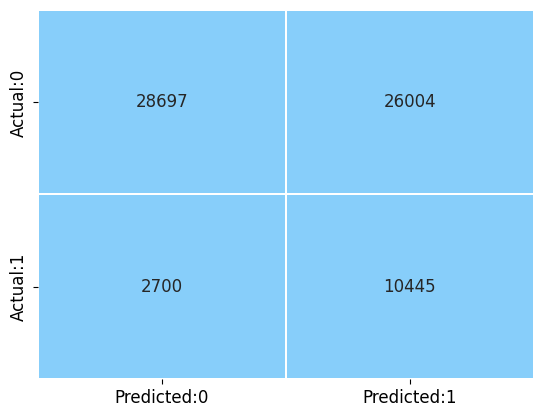

In [ ]:
plot_confusion_matrix(rf_model,X_test,y_test)

In [ ]:
report = get_test_report(rf_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.6254008863608879


              precision    recall  f1-score   support

           0       0.91      0.52      0.67     54701
           1       0.29      0.79      0.42     13145

    accuracy                           0.58     67846
   macro avg       0.60      0.66      0.54     67846
weighted avg       0.79      0.58      0.62     67846



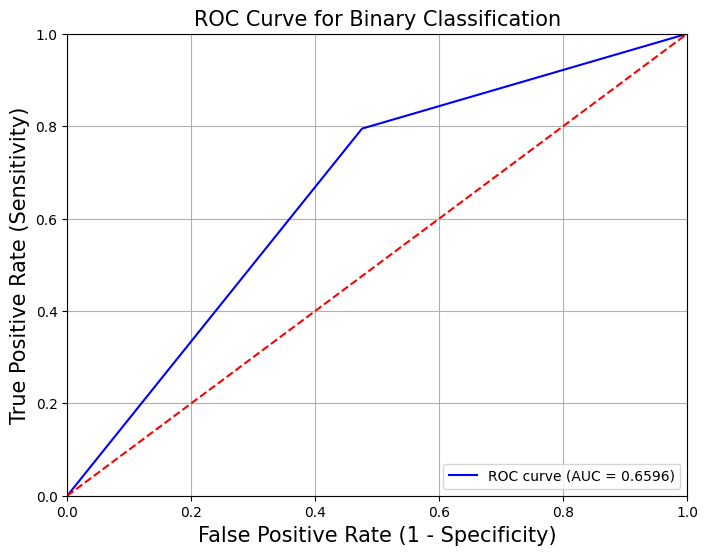

In [ ]:
plot_roc(rf_model,X_test,y_test)

In [ ]:
df_result_Test.loc[9] = ['Random Forest Hypertuned Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                        KNN Classification Base Model  0.519000  0.739100   
1                  KNN Classification Hypertuned Model  0.605500  0.714200   
2                     Naive Bayes Algorithm Base Model  0.431200  0.631000   
3               Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4        Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
5  Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   
6                             Decision Tree Base Model  1.000000  0.000000   
7                       Decision Tree Hypertuned Model  0.783700  0.531500   
8                             Random Forest Base Model  0.695000  0.704300   
9                       Random Forest Hypertuned Model  0.524600  0.794600   

   Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0     0.892200     0.269700    0.656200    0.395100  
1     0.898100     0.303200    0.723400    0.425700  
2     0.829400     0.210500    0.567400    0.315700  
3     0.897400     0.286900    0.691500    0.412300  
4     0.860000     0.300700    0.777700    0.380800  
5     0.877300     0.278300    0.706400    0.390700  
6     0.806300     0.000000    0.892700    0.000000  
7     0.874400     0.371300    0.826600    0.437200  
8     0.907200     0.356900    0.787000    0.473700  
9     0.914000     0.286600    0.666600    0.421200

#### Ensemble Techniques

##### AdaBoosting Classifier

###### Base Model

In [ ]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier()

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

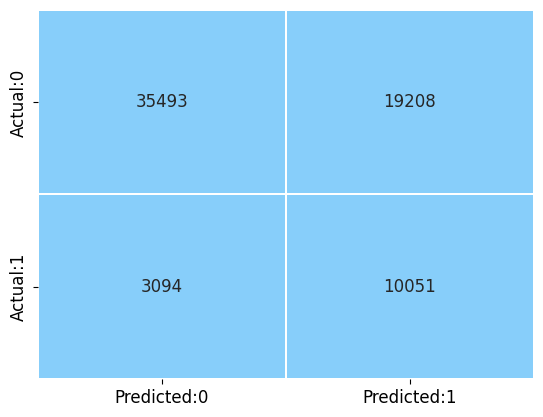

In [ ]:
plot_confusion_matrix(ada_model,X_test,y_test)

In [ ]:
report = get_test_report(ada_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.4904829599934061


              precision    recall  f1-score   support

           0       0.92      0.65      0.76     54701
           1       0.34      0.76      0.47     13145

    accuracy                           0.67     67846
   macro avg       0.63      0.71      0.62     67846
weighted avg       0.81      0.67      0.71     67846



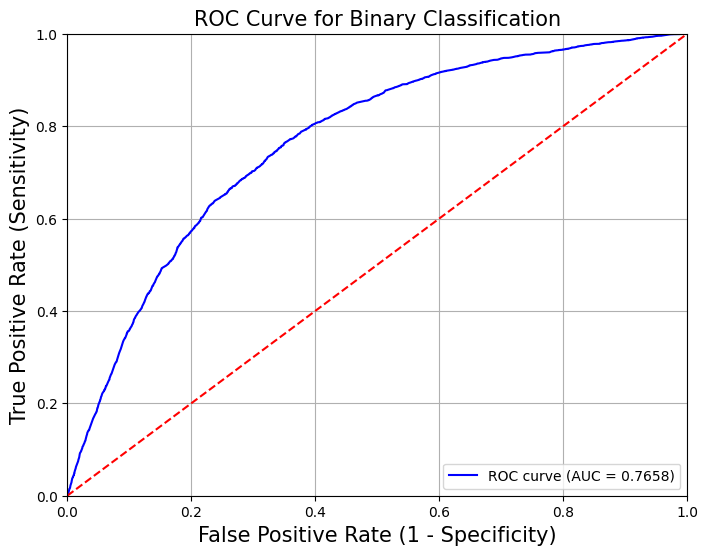

In [ ]:
plot_roc(ada_model,X_test,y_test)

In [ ]:
df_result_Test.loc[10] = ['AdaBoosting Classifier Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                         KNN Classification Base Model  0.519000  0.739100   
1                   KNN Classification Hypertuned Model  0.605500  0.714200   
2                      Naive Bayes Algorithm Base Model  0.431200  0.631000   
3                Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4         Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
5   Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   
6                              Decision Tree Base Model  1.000000  0.000000   
7                        Decision Tree Hypertuned Model  0.783700  0.531500   
8                              Random Forest Base Model  0.695000  0.704300   
9                        Random Forest Hypertuned Model  0.524600  0.794600   
10                    AdaBoosting Classifier Base Model  0.648900  0.764600   

    Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0      0.892200     0.269700    0.656200    0.395100  
1      0.898100     0.303200    0.723400    0.425700  
2      0.829400     0.210500    0.567400    0.315700  
3      0.897400     0.286900    0.691500    0.412300  
4      0.860000     0.300700    0.777700    0.380800  
5      0.877300     0.278300    0.706400    0.390700  
6      0.806300     0.000000    0.892700    0.000000  
7      0.874400     0.371300    0.826600    0.437200  
8      0.907200     0.356900    0.787000    0.473700  
9      0.914000     0.286600    0.666600    0.421200  
10     0.919800     0.343500    0.760900    0.474100

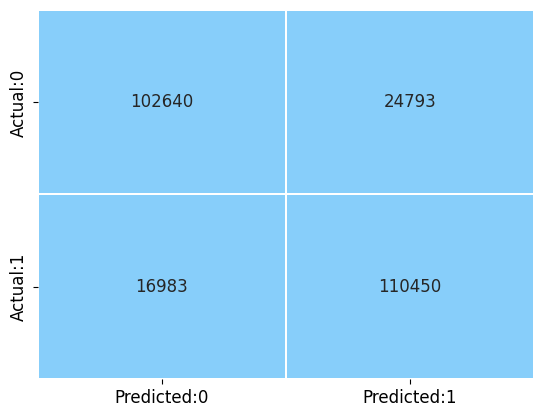

In [ ]:
plot_confusion_matrix(ada_model,X_train,y_train)

In [ ]:
report = get_test_report(ada_model,X_train,y_train)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.4993698198337046


              precision    recall  f1-score   support

           0       0.86      0.81      0.83    127433
           1       0.82      0.87      0.84    127433

    accuracy                           0.84    254866
   macro avg       0.84      0.84      0.84    254866
weighted avg       0.84      0.84      0.84    254866



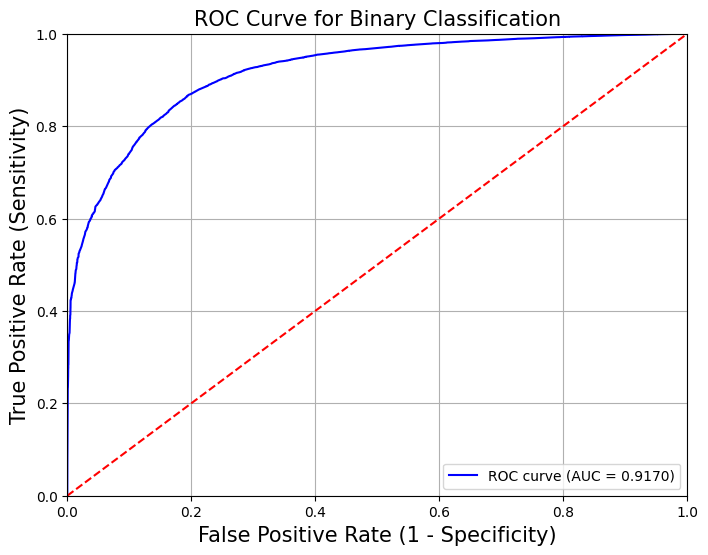

In [ ]:
plot_roc(ada_model,X_train,y_train)

In [ ]:
df_result_Train.loc[4] = ['AdaBoosting Classifier Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Train

Model Name  Recall 0  Recall 1  Precision 0  \
0      KNN Classification Base Model  1.000000  0.881500     0.894000   
1   Naive Bayes Algorithm Base Model  0.899000  0.690500     0.743900   
2           Decision Tree Base Model  1.000000  0.999700     0.999700   
3           Random Forest Base Model  0.999900  0.999800     0.999800   
4  AdaBoosting Classifier Base Model  0.805400  0.866700     0.858000   

   Precision 1  F1-Score 0  F1-Score 1  
0     1.000000    0.944100    0.937000  
1     0.872400    0.814100    0.770900  
2     1.000000    0.999900    0.999900  
3     0.999900    0.999900    0.999900  
4     0.816700    0.830900    0.841000

###### HyperOpt Model

In [ ]:
X = X_train  # Your feature matrix
y = y_train  # Your target variable

# Split data into train and test sets
X_train_hype, X_test_hype, y_train_hype, y_test_hype = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function
def objective(params):
    # Create the base estimator
    # Assign base_estimator to None when params['base_estimator'] == 0

    ada = AdaBoostClassifier(
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        algorithm=params['algorithm'],
        random_state=42
    )

    ada.fit(X_train_hype, y_train_hype)
    y_pred_hype = ada.predict(X_test_hype)

    recall = recall_score(y_test_hype, y_pred_hype, average='binary')  # Change 'average' if multi-class

    return -recall  # Hyperopt minimizes the objective, so negate the recall to maximize it

space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 2.0),  # Uniform distribution between 0.01 and 2.0
    'n_estimators': hp.randint('n_estimators', 41) + 10,  # Random integers between 10 and 50
    'algorithm': hp.choice('algorithm', ['SAMME', 'SAMME.R'])  # Algorithm choices
}

# Set up Trials object
trials = Trials()

# Run hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

print('Best parameters for AdaBoost classifier:', best)

100%|██████████| 10/10 [01:42<00:00, 10.27s/trial, best loss: -0.898156105945777]
Best parameters for AdaBoost classifier: {'algorithm': 0, 'learning_rate': 1.8819765374214255, 'n_estimators': 22}


In [ ]:
ada_model = AdaBoostClassifier(algorithm = 'SAMME' if best['algorithm'] == 0 else 'SAMME.R', # Accessing the algorithm parameter from the best dictionary and converting numerical values into 'SAMME' or 'SAMME.R'
                               learning_rate = best['learning_rate'],
                               n_estimators = int(best['n_estimators'])) # Converting n_estimators to integer
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.8819765374214255,
                   n_estimators=22)

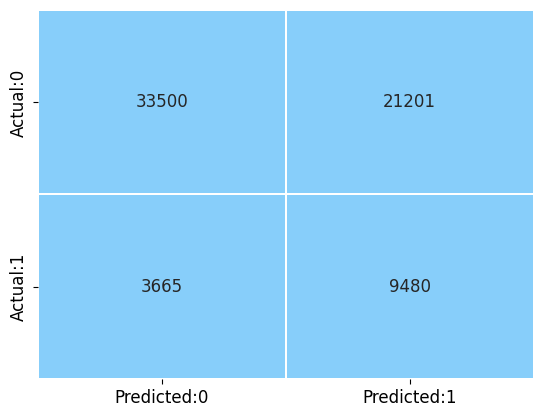

In [ ]:
plot_confusion_matrix(ada_model,X_test,y_test)

In [ ]:
report = get_test_report(ada_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.4648691553481432


              precision    recall  f1-score   support

           0       0.90      0.61      0.73     54701
           1       0.31      0.72      0.43     13145

    accuracy                           0.63     67846
   macro avg       0.61      0.67      0.58     67846
weighted avg       0.79      0.63      0.67     67846



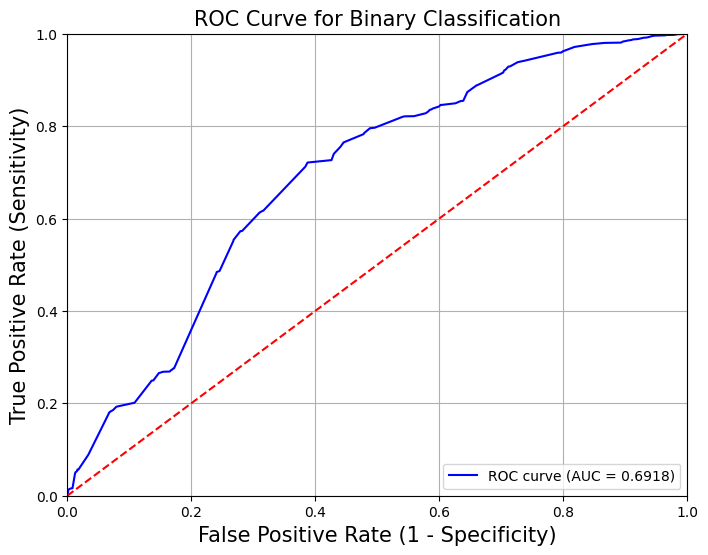

In [ ]:
plot_roc(ada_model,X_test,y_test)

In [ ]:
df_result_Test.loc[11] = ['AdaBoosting Classifier Hypertuned Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                         KNN Classification Base Model  0.519000  0.739100   
1                   KNN Classification Hypertuned Model  0.605500  0.714200   
2                      Naive Bayes Algorithm Base Model  0.431200  0.631000   
3                Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4         Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
5   Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   
6                              Decision Tree Base Model  1.000000  0.000000   
7                        Decision Tree Hypertuned Model  0.783700  0.531500   
8                              Random Forest Base Model  0.695000  0.704300   
9                        Random Forest Hypertuned Model  0.524600  0.794600   
10                    AdaBoosting Classifier Base Model  0.648900  0.764600   
11              AdaBoosting Classifier Hypertuned Model  0.612400  0.721200   

    Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0      0.892200     0.269700    0.656200    0.395100  
1      0.898100     0.303200    0.723400    0.425700  
2      0.829400     0.210500    0.567400    0.315700  
3      0.897400     0.286900    0.691500    0.412300  
4      0.860000     0.300700    0.777700    0.380800  
5      0.877300     0.278300    0.706400    0.390700  
6      0.806300     0.000000    0.892700    0.000000  
7      0.874400     0.371300    0.826600    0.437200  
8      0.907200     0.356900    0.787000    0.473700  
9      0.914000     0.286600    0.666600    0.421200  
10     0.919800     0.343500    0.760900    0.474100  
11     0.901400     0.309000    0.729300    0.432600

##### Gradient Boosting

###### Base Model

In [ ]:
# instantiate the 'GradientBoostingClassifier'
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each code implementation
gboost_model = GradientBoostingClassifier()

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier()

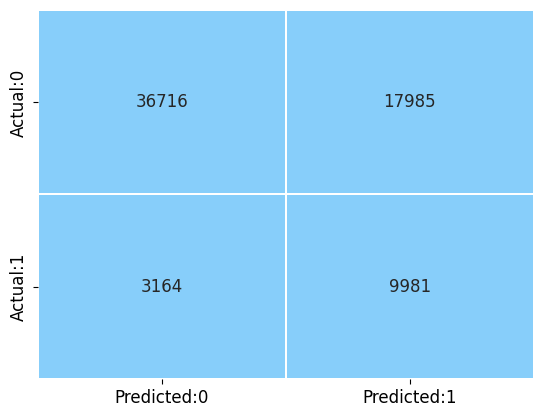

In [ ]:
plot_confusion_matrix(gboost_model,X_test,y_test)

In [ ]:
report = get_test_report(gboost_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.261647351476001


              precision    recall  f1-score   support

           0       0.92      0.67      0.78     54701
           1       0.36      0.76      0.49     13145

    accuracy                           0.69     67846
   macro avg       0.64      0.72      0.63     67846
weighted avg       0.81      0.69      0.72     67846



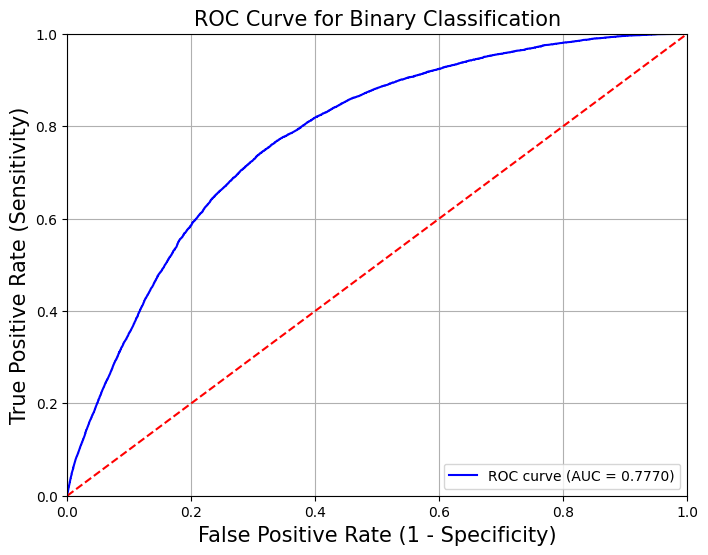

In [ ]:
plot_roc(gboost_model,X_test,y_test)

In [ ]:
df_result_Test.loc[12] = ['Gradient Boosting Classifier Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                         KNN Classification Base Model  0.519000  0.739100   
1                   KNN Classification Hypertuned Model  0.605500  0.714200   
2                      Naive Bayes Algorithm Base Model  0.431200  0.631000   
3                Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4         Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
5   Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   
6                              Decision Tree Base Model  1.000000  0.000000   
7                        Decision Tree Hypertuned Model  0.783700  0.531500   
8                              Random Forest Base Model  0.695000  0.704300   
9                        Random Forest Hypertuned Model  0.524600  0.794600   
10                    AdaBoosting Classifier Base Model  0.648900  0.764600   
11              AdaBoosting Classifier Hypertuned Model  0.612400  0.721200   
12              Gradient Boosting Classifier Base Model  0.671200  0.759300   

    Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0      0.892200     0.269700    0.656200    0.395100  
1      0.898100     0.303200    0.723400    0.425700  
2      0.829400     0.210500    0.567400    0.315700  
3      0.897400     0.286900    0.691500    0.412300  
4      0.860000     0.300700    0.777700    0.380800  
5      0.877300     0.278300    0.706400    0.390700  
6      0.806300     0.000000    0.892700    0.000000  
7      0.874400     0.371300    0.826600    0.437200  
8      0.907200     0.356900    0.787000    0.473700  
9      0.914000     0.286600    0.666600    0.421200  
10     0.919800     0.343500    0.760900    0.474100  
11     0.901400     0.309000    0.729300    0.432600  
12     0.920700     0.356900    0.776400    0.485600

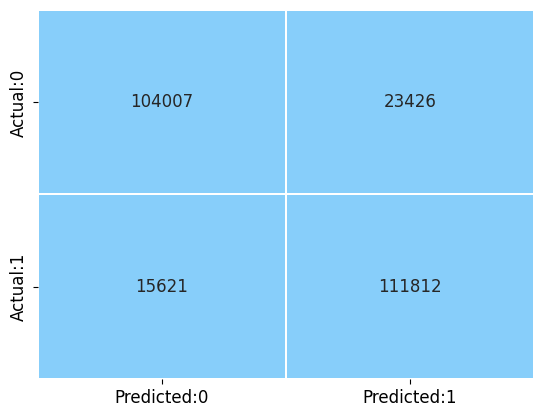

In [ ]:
plot_confusion_matrix(gboost_model,X_train,y_train)

In [ ]:
report = get_test_report(gboost_model,X_train,y_train)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.5015057162795233


              precision    recall  f1-score   support

           0       0.87      0.82      0.84    127433
           1       0.83      0.88      0.85    127433

    accuracy                           0.85    254866
   macro avg       0.85      0.85      0.85    254866
weighted avg       0.85      0.85      0.85    254866



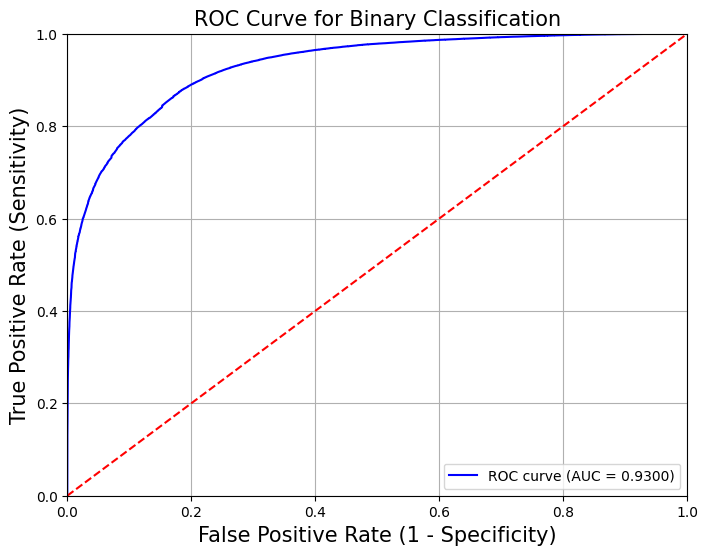

In [ ]:
plot_roc(gboost_model,X_train,y_train)

In [ ]:
df_result_Train.loc[5] = ['Gradient Boosting Classifier Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Train

Model Name  Recall 0  Recall 1  Precision 0  \
0            KNN Classification Base Model  1.000000  0.881500     0.894000   
1         Naive Bayes Algorithm Base Model  0.899000  0.690500     0.743900   
2                 Decision Tree Base Model  1.000000  0.999700     0.999700   
3                 Random Forest Base Model  0.999900  0.999800     0.999800   
4        AdaBoosting Classifier Base Model  0.805400  0.866700     0.858000   
5  Gradient Boosting Classifier Base Model  0.816200  0.877400     0.869400   

   Precision 1  F1-Score 0  F1-Score 1  
0     1.000000    0.944100    0.937000  
1     0.872400    0.814100    0.770900  
2     1.000000    0.999900    0.999900  
3     0.999900    0.999900    0.999900  
4     0.816700    0.830900    0.841000  
5     0.826800    0.842000    0.851300

###### HyperOpt Model

In [ ]:
X = X_train  # Your feature matrix
y = y_train  # Your target variable

# Split data into train and test sets
X_train_hype, X_test_hype, y_train_hype, y_test_hype = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function
def objective(params):
    gboost = GradientBoostingClassifier(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        subsample=params['subsample'],
        random_state=42
    )

    gboost.fit(X_train_hype, y_train_hype)
    y_pred_hype = gboost.predict(X_test_hype)

    recall = recall_score(y_test_hype, y_pred_hype, average='binary')  # Change 'average' if multi-class

    return -recall  # Hyperopt minimizes the objective, so negate the recall to maximize it

# Define the search space
space = {
    'n_estimators': hp.randint('n_estimators', 51) + 50,  # Random integers between 50 and 100
    'learning_rate': hp.uniform('learning_rate', 0.1, 1.0),  # Uniform distribution between 0.1 and 1.0
    'max_depth': hp.randint('max_depth', 3) + 3,            # Random integers between 3 and 5
    'min_samples_split': hp.randint('min_samples_split', 6) + 5,  # Random integers between 5 and 10
    'subsample': hp.uniform('subsample', 0.8, 1.0)           # Uniform distribution between 0.8 and 1.0
}

# Set up Trials object
trials = Trials()

# Run hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

print('Best parameters for Gradient Boosting Classifier:', best)


100%|██████████| 10/10 [13:36<00:00, 81.64s/trial, best loss: -0.8712399406203609]
Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.7235952096029208, 'max_depth': 1, 'min_samples_split': 1, 'n_estimators': 38, 'subsample': 0.9326680903093316}


In [ ]:
gboost_model = GradientBoostingClassifier(learning_rate = best['learning_rate'],
                                          max_depth = int(best['max_depth']), # Ensure max_depth is an integer
                                          min_samples_split = max(2, int(best['min_samples_split'])), # Ensure min_samples_split is an integer and >=2
                                          n_estimators = int(best['n_estimators']), # Ensure n_estimators is an integer
                                          subsample = best['subsample'])
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.7235952096029208, max_depth=1,
                           n_estimators=38, subsample=0.9326680903093316)

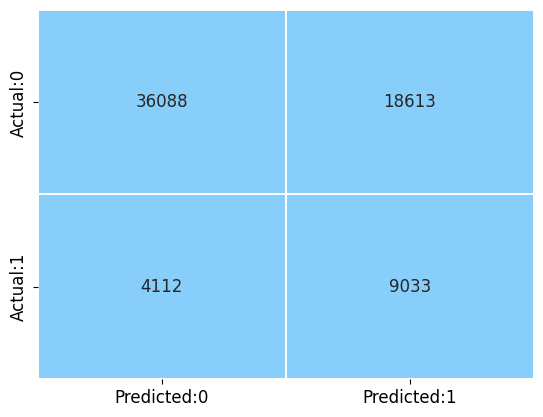

In [ ]:
plot_confusion_matrix(gboost_model,X_test,y_test)

In [ ]:
report = get_test_report(gboost_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.18711946547301167


              precision    recall  f1-score   support

           0       0.90      0.66      0.76     54701
           1       0.33      0.69      0.44     13145

    accuracy                           0.67     67846
   macro avg       0.61      0.67      0.60     67846
weighted avg       0.79      0.67      0.70     67846



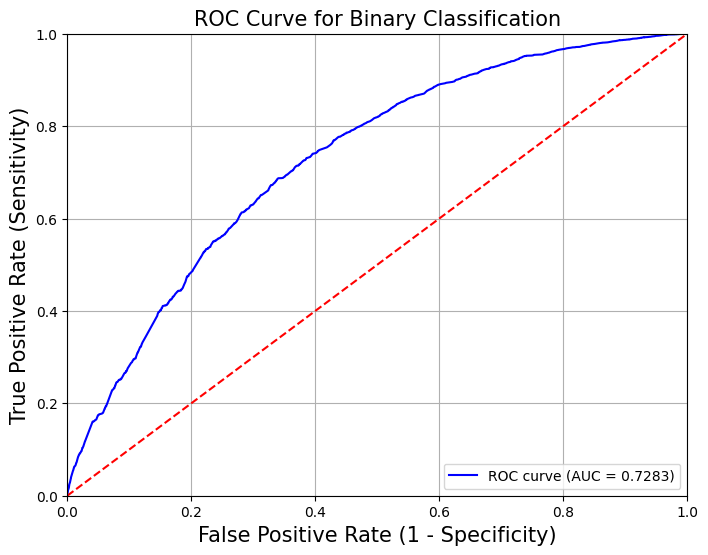

In [ ]:
plot_roc(gboost_model,X_test,y_test)

In [ ]:
df_result_Test.loc[13] = ['Gradient Boosting Classifier Hypertuned Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                         KNN Classification Base Model  0.519000  0.739100   
1                   KNN Classification Hypertuned Model  0.605500  0.714200   
2                      Naive Bayes Algorithm Base Model  0.431200  0.631000   
3                Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4         Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
5   Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   
6                              Decision Tree Base Model  1.000000  0.000000   
7                        Decision Tree Hypertuned Model  0.783700  0.531500   
8                              Random Forest Base Model  0.695000  0.704300   
9                        Random Forest Hypertuned Model  0.524600  0.794600   
10                    AdaBoosting Classifier Base Model  0.648900  0.764600   
11              AdaBoosting Classifier Hypertuned Model  0.612400  0.721200   
12              Gradient Boosting Classifier Base Model  0.671200  0.759300   
13        Gradient Boosting Classifier Hypertuned Model  0.659700  0.687200   

    Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0      0.892200     0.269700    0.656200    0.395100  
1      0.898100     0.303200    0.723400    0.425700  
2      0.829400     0.210500    0.567400    0.315700  
3      0.897400     0.286900    0.691500    0.412300  
4      0.860000     0.300700    0.777700    0.380800  
5      0.877300     0.278300    0.706400    0.390700  
6      0.806300     0.000000    0.892700    0.000000  
7      0.874400     0.371300    0.826600    0.437200  
8      0.907200     0.356900    0.787000    0.473700  
9      0.914000     0.286600    0.666600    0.421200  
10     0.919800     0.343500    0.760900    0.474100  
11     0.901400     0.309000    0.729300    0.432600  
12     0.920700     0.356900    0.776400    0.485600  
13     0.897700     0.326700    0.760500    0.442900

##### XGBoost Classification

###### Base Model

In [ ]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier()

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

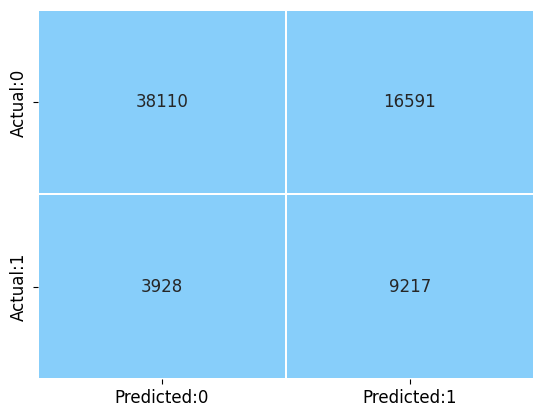

In [ ]:
plot_confusion_matrix(xgb_model,X_test,y_test)

In [ ]:
report = get_test_report(xgb_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.1184510812163353


              precision    recall  f1-score   support

           0       0.91      0.70      0.79     54701
           1       0.36      0.70      0.47     13145

    accuracy                           0.70     67846
   macro avg       0.63      0.70      0.63     67846
weighted avg       0.80      0.70      0.73     67846



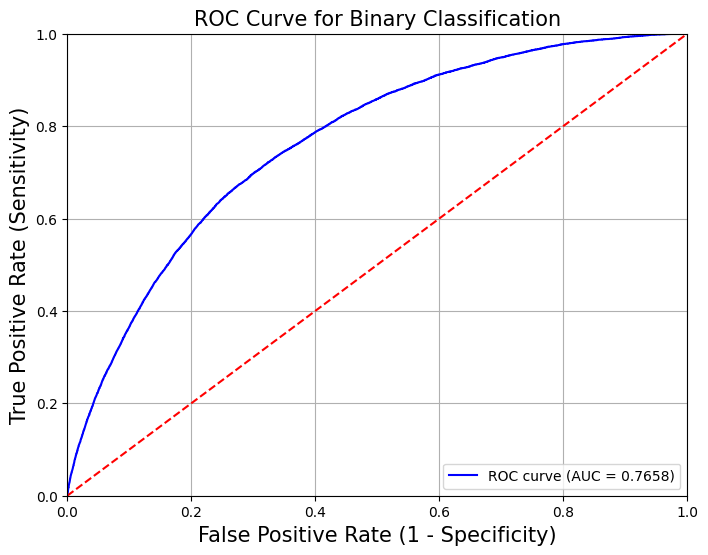

In [ ]:
plot_roc(xgb_model,X_test,y_test)

In [ ]:
df_result_Test.loc[14] = ['XGBoost Classifier Base Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                         KNN Classification Base Model  0.519000  0.739100   
1                   KNN Classification Hypertuned Model  0.605500  0.714200   
2                      Naive Bayes Algorithm Base Model  0.431200  0.631000   
3                Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4         Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
5   Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   
6                              Decision Tree Base Model  1.000000  0.000000   
7                        Decision Tree Hypertuned Model  0.783700  0.531500   
8                              Random Forest Base Model  0.695000  0.704300   
9                        Random Forest Hypertuned Model  0.524600  0.794600   
10                    AdaBoosting Classifier Base Model  0.648900  0.764600   
11              AdaBoosting Classifier Hypertuned Model  0.612400  0.721200   
12              Gradient Boosting Classifier Base Model  0.671200  0.759300   
13        Gradient Boosting Classifier Hypertuned Model  0.659700  0.687200   
14                        XGBoost Classifier Base Model  0.696700  0.701200   

    Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0      0.892200     0.269700    0.656200    0.395100  
1      0.898100     0.303200    0.723400    0.425700  
2      0.829400     0.210500    0.567400    0.315700  
3      0.897400     0.286900    0.691500    0.412300  
4      0.860000     0.300700    0.777700    0.380800  
5      0.877300     0.278300    0.706400    0.390700  
6      0.806300     0.000000    0.892700    0.000000  
7      0.874400     0.371300    0.826600    0.437200  
8      0.907200     0.356900    0.787000    0.473700  
9      0.914000     0.286600    0.666600    0.421200  
10     0.919800     0.343500    0.760900    0.474100  
11     0.901400     0.309000    0.729300    0.432600  
12     0.920700     0.356900    0.776400    0.485600  
13     0.897700     0.326700    0.760500    0.442900  
14     0.906600     0.357100    0.787900    0.473200

###### HyperOpt Model

In [ ]:
X = X_train  # Your feature matrix
y = y_train  # Your target variable

# Split data into train and test sets
X_train_hype, X_test_hype, y_train_hype, y_test_hype = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function
def objective(params):
    xgb_model = XGBClassifier(
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        gamma=int(params['gamma']),
        use_label_encoder=False,
        eval_metric='logloss'
    )

    xgb_model.fit(X_train_hype, y_train_hype)
    y_pred_proba = xgb_model.predict_proba(X_test_hype)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test_hype, y_pred_proba)

    return -roc_auc  # Hyperopt minimizes the objective, so negate the ROC AUC to maximize it

# Define the search space
space = {
    'learning_rate': hp.uniform('learning_rate', 0.1, 0.6),  # Uniform distribution between 0.1 and 0.6
    'max_depth': hp.randint('max_depth', 7) + 3,            # Random integers between 3 and 9
    'gamma': hp.randint('gamma', 5)                          # Random integers between 0 and 4
}

# Set up Trials object
trials = Trials()

# Run hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

print('Best parameters for XGBoost classifier:', best)


100%|██████████| 10/10 [00:56<00:00,  5.70s/trial, best loss: -0.9684860896892363]
Best parameters for XGBoost classifier: {'gamma': 2, 'learning_rate': 0.39032791121323995, 'max_depth': 5}


In [ ]:
xgb_model = XGBClassifier(gamma = best['gamma'],
                          learning_rate = best['learning_rate'],
                          max_depth = best['max_depth'])
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.39032791121323995,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

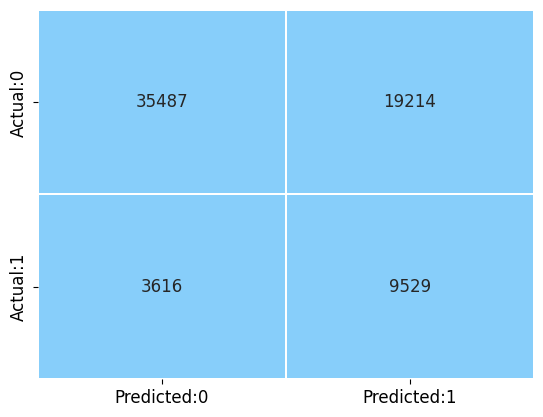

In [ ]:
plot_confusion_matrix(xgb_model,X_test,y_test)

In [ ]:
report = get_test_report(xgb_model,X_test,y_test)

precision_0 = round(report['0']['precision'],4)
recall_0 = round(report['0']['recall'],4)
f1score_0 = round(report['0']['f1-score'],4)

precision_1 = round(report['1']['precision'],4)
recall_1 = round(report['1']['recall'],4)
f1score_1 = round(report['1']['f1-score'],4)

Best threshold according to Youden's J statistic: 0.10221678763628006


              precision    recall  f1-score   support

           0       0.91      0.65      0.76     54701
           1       0.33      0.72      0.45     13145

    accuracy                           0.66     67846
   macro avg       0.62      0.69      0.61     67846
weighted avg       0.80      0.66      0.70     67846



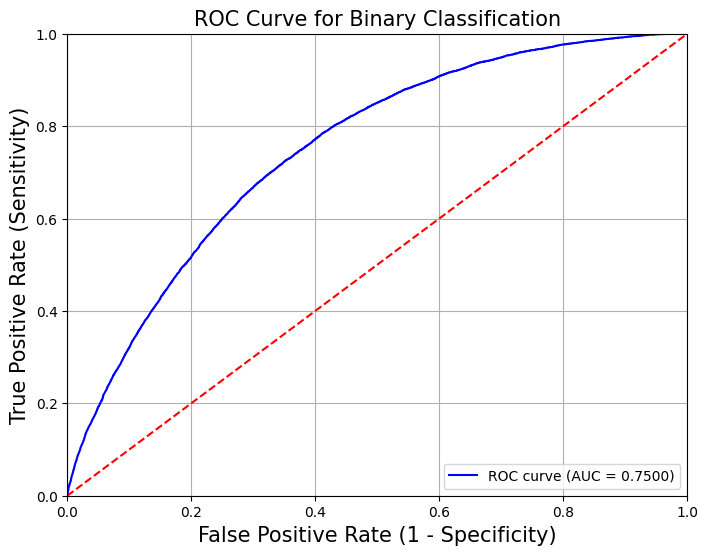

In [ ]:
plot_roc(xgb_model,X_test,y_test)

In [ ]:
df_result_Test.loc[15] = ['XGBoost Classifier Hypertuned Model',recall_0, recall_1,precision_0,precision_1,f1score_0,f1score_1]
df_result_Test

Model Name  Recall 0  Recall 1  \
0                         KNN Classification Base Model  0.519000  0.739100   
1                   KNN Classification Hypertuned Model  0.605500  0.714200   
2                      Naive Bayes Algorithm Base Model  0.431200  0.631000   
3                Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
4         Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
5   Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   
6                              Decision Tree Base Model  1.000000  0.000000   
7                        Decision Tree Hypertuned Model  0.783700  0.531500   
8                              Random Forest Base Model  0.695000  0.704300   
9                        Random Forest Hypertuned Model  0.524600  0.794600   
10                    AdaBoosting Classifier Base Model  0.648900  0.764600   
11              AdaBoosting Classifier Hypertuned Model  0.612400  0.721200   
12              Gradient Boosting Classifier Base Model  0.671200  0.759300   
13        Gradient Boosting Classifier Hypertuned Model  0.659700  0.687200   
14                        XGBoost Classifier Base Model  0.696700  0.701200   
15                  XGBoost Classifier Hypertuned Model  0.648700  0.724900   

    Precision 0  Precision 1  F1-Score 0  F1-Score 1  
0      0.892200     0.269700    0.656200    0.395100  
1      0.898100     0.303200    0.723400    0.425700  
2      0.829400     0.210500    0.567400    0.315700  
3      0.897400     0.286900    0.691500    0.412300  
4      0.860000     0.300700    0.777700    0.380800  
5      0.877300     0.278300    0.706400    0.390700  
6      0.806300     0.000000    0.892700    0.000000  
7      0.874400     0.371300    0.826600    0.437200  
8      0.907200     0.356900    0.787000    0.473700  
9      0.914000     0.286600    0.666600    0.421200  
10     0.919800     0.343500    0.760900    0.474100  
11     0.901400     0.309000    0.729300    0.432600  
12     0.920700     0.356900    0.776400    0.485600  
13     0.897700     0.326700    0.760500    0.442900  
14     0.906600     0.357100    0.787900    0.473200  
15     0.907500     0.331500    0.756600    0.455000

### Result

In [ ]:
df_result_Test.sort_values(by=['Recall 0','Recall 1'],ascending=False)

Model Name  Recall 0  Recall 1  \
6                              Decision Tree Base Model  1.000000  0.000000   
7                        Decision Tree Hypertuned Model  0.783700  0.531500   
4         Multinomial Naive Bayes Classifier Base Model  0.709700  0.519400   
14                        XGBoost Classifier Base Model  0.696700  0.701200   
8                              Random Forest Base Model  0.695000  0.704300   
12              Gradient Boosting Classifier Base Model  0.671200  0.759300   
13        Gradient Boosting Classifier Hypertuned Model  0.659700  0.687200   
10                    AdaBoosting Classifier Base Model  0.648900  0.764600   
15                  XGBoost Classifier Hypertuned Model  0.648700  0.724900   
11              AdaBoosting Classifier Hypertuned Model  0.612400  0.721200   
1                   KNN Classification Hypertuned Model  0.605500  0.714200   
5   Multinomial Naive Bayes Classifier Hypertuned Model  0.591300  0.655800   
3                Naive Bayes Algorithm Hypertuned Model  0.562400  0.732500   
9                        Random Forest Hypertuned Model  0.524600  0.794600   
0                         KNN Classification Base Model  0.519000  0.739100   
2                      Naive Bayes Algorithm Base Model  0.431200  0.631000   

    Precision 0  Precision 1  F1-Score 0  F1-Score 1  
6      0.806300     0.000000    0.892700    0.000000  
7      0.874400     0.371300    0.826600    0.437200  
4      0.860000     0.300700    0.777700    0.380800  
14     0.906600     0.357100    0.787900    0.473200  
8      0.907200     0.356900    0.787000    0.473700  
12     0.920700     0.356900    0.776400    0.485600  
13     0.897700     0.326700    0.760500    0.442900  
10     0.919800     0.343500    0.760900    0.474100  
15     0.907500     0.331500    0.756600    0.455000  
11     0.901400     0.309000    0.729300    0.432600  
1      0.898100     0.303200    0.723400    0.425700  
5      0.877300     0.278300    0.706400    0.390700  
3      0.897400     0.286900    0.691500    0.412300  
9      0.914000     0.286600    0.666600    0.421200  
0      0.892200     0.269700    0.656200    0.395100  
2      0.829400     0.210500    0.567400    0.315700

In [ ]:
df_result_Train.sort_values(by=['Recall 0'],ascending=False)

Model Name  Recall 0  Recall 1  Precision 0  \
0            KNN Classification Base Model  1.000000  0.881500     0.894000   
2                 Decision Tree Base Model  1.000000  0.999700     0.999700   
3                 Random Forest Base Model  0.999900  0.999800     0.999800   
1         Naive Bayes Algorithm Base Model  0.899000  0.690500     0.743900   
5  Gradient Boosting Classifier Base Model  0.816200  0.877400     0.869400   
4        AdaBoosting Classifier Base Model  0.805400  0.866700     0.858000   

   Precision 1  F1-Score 0  F1-Score 1  
0     1.000000    0.944100    0.937000  
2     1.000000    0.999900    0.999900  
3     0.999900    0.999900    0.999900  
1     0.872400    0.814100    0.770900  
5     0.826800    0.842000    0.851300  
4     0.816700    0.830900    0.841000